# **1) Business Understanding**

In this step, we need to clearly define the business problem the bank is facing and the objectives to be achieved through data analysis.

**1. Business Context:**

  - The bank operates in a highly competitive financial-banking industry environment. Retaining existing customers is a key factor for maintaining stability and sustainable growth.

  - The cost of acquiring a new customer is often significantly higher than the cost of retaining an existing one. Therefore, minimizing the customer churn rate is a strategic priority.

  - Reasons for churn may include:

    - High or unreasonable service fees.

    - Poor customer experience, such as delayed support services.

    - Competition from digital banks with more attractive offers.

    - Low service usage, leading to customers lacking motivation to maintain their accounts.

  - Without an effective churn reduction strategy, the bank risks losing customers, impacting revenue and market position.

**2. Business Problem:**

  - The bank is observing a rate of customers deciding to stop using its services and switch to competitors or simply no longer having a need (the "churn" phenomenon).

  - This situation negatively impacts the bank's revenue, profitability, and potentially its market share.

  - Currently, the bank lacks a deep, quantitative understanding of the core reasons leading to customer departure, as well as the ability to predict early which customers are at high risk of churning.

**3. Business Objectives:**

  - **Main Objective**: Reduce the customer churn rate to a specific target level within a defined timeframe.

  - **Supporting Objectives:**

    - Clearly understand the main factors (e.g., related to customer demographics, service usage behavior, satisfaction, issues encountered) driving customer churn decisions.

    - Develop the capability to identify early customers showing signs or having a high risk of churning.

    - Optimize customer retention strategies and campaigns by targeting appropriate customer segments more effectively with suitable interventions.

    - Enhance the overall customer experience based on insights gained about weaknesses in services or products.

**4. Data Mining Goals:**

  - Analyze historical customer data to identify behavioral patterns, characteristics, or events that often precede customer churn.

  - Build a predictive model capable of estimating the probability of churn for each current customer.

  - Evaluate and rank the impact level of different factors on customer churn probability.

**5. Key Questions to Address:**

  1. What factors have the greatest impact on churn?

  2. Which types of customers are most likely to leave the bank?

  3. Which model can effectively predict churn?

  4. How can the prediction results be used to optimize business strategy?

**6. Success Criteria:**

  - **From a business perspective:**

    - Achieve an X% reduction in the churn rate within Y period (e.g., 6 months, 1 year) after implementing measures based on the analysis results.

    - Increase the success rate of customer retention campaigns (e.g., the proportion of predicted churners who accept offers and stay).

    - Improve the return on investment (ROI) for customer retention activities.

    - Relevant departments (such as Marketing, Customer Care, Product Development) can use the analysis results to make more specific and effective decisions and actions.

  - **From a technical/data perspective:**

    - Build a reliable predictive model capable of effectively distinguishing between customers who will churn and those who will stay.

    - Provide clear, meaningful, and actionable insights into the factors leading to churn.

# **2) Data Understanding**

## **a. Dataset's Origin**

The dataset used in this report is hosted on Kaggle Competition and simulates information related to bank customers.

Link dataset: https://www.kaggle.com/competitions/bank-customer-churn-prediction-challenge/data

Just a heads-up: While this dataset looks like the original bank churn data, keep in mind it was actually generated by an AI trained on that original set. So, they're similar, but not exactly the same. You're encouraged to look at the original dataset, and even consider adding it to your training process, as it might improve your results.

## **b. Describe Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [ ]:
print(train.shape)

(15000, 14)


In [ ]:
train.head()

id  CustomerId       Surname  CreditScore Geography  Gender   Age  Tenure  \
0   0  15709511.0        Ch'ang        754.0     Spain    Male  40.0     8.0   
1   1  15592761.0      Genovese        579.0    France  Female  28.0     1.0   
2   2  15579914.0           Yeh        744.0    France  Female  56.0     5.0   
3   3  15669611.0  Nwachinemelu        697.0    France    Male  29.0     2.0   
4   4  15761775.0         Hs?eh        628.0    France  Female  22.0     9.0   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0  102954.68            2.0        1.0             1.0        149238.35   
1       0.00            2.0        1.0             0.0         64869.32   
2       0.00            1.0        1.0             0.0        158816.03   
3       0.00            2.0        1.0             0.0         55775.72   
4       0.00            2.0        1.0             0.0         49653.39   

   Exited  
0     0.0  
1     0.0  
2     1.0  
3     0.0  
4     0.0

In [ ]:
test.head()

id  CustomerId Surname  CreditScore Geography  Gender   Age  Tenure  \
0  15000  15682433.0   Smith        751.0    France  Female  38.0     3.0   
1  15001  15686835.0   T'ien        711.0   Germany  Female  43.0     2.0   
2  15002  15784491.0   Ch'iu        592.0     Spain    Male  40.0     4.0   
3  15003  15607986.0   Brown        676.0   Germany    Male  48.0     5.0   
4  15004  15622003.0  Baresi        746.0    France    Male  36.0     5.0   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0       0.00            2.0        1.0             0.0        145558.42  
1  143680.36            2.0        1.0             1.0        118188.15  
2       0.00            2.0        1.0             1.0         36754.13  
3  121629.22            1.0        1.0             0.0        122221.71  
4       0.00            2.0        1.0             1.0         97468.44

Dataset có 15,000 khách hàng, 14 cột

In [ ]:
print(train.columns)

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [ ]:
# Check the data types of each column
print(train.dtypes)

id                   int64
CustomerId         float64
Surname             object
CreditScore        float64
Geography           object
Gender              object
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited             float64
dtype: object


In [ ]:
print(test.shape)

(10000, 13)


In [ ]:
print(test.dtypes)

id                   int64
CustomerId         float64
Surname             object
CreditScore        float64
Geography           object
Gender              object
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
dtype: object


**Feature Description in the Dataset**

- **id**: Row number in the dataset.

- **CustomerId**: Customer ID (Integer - Identifier).

- **Surname**: Customer's surname (String - Identifier).

- **CreditScore**: Credit score (Integer).

- **Geography**: Country (String).

- **Gender**: Gender (String).

- **Age**: Age (Integer).

- **Tenure**: Number of years as a customer (Integer).

- **Balance**: Account balance (Float).

- **NumOfProducts**: Number of products used (Integer).

- **HasCrCard**: Has a credit card? (Integer 0/1).

- **IsActiveMember**: Is an active member? (Integer 0/1).

- **EstimatedSalary**: Estimated salary (Float).

- **Exited**: Has the customer churned? (Integer 0/1).


## **c. Exploratory Data Analysis (EDA)**

### **Univariate Analysis (Phân tích đơn biến)**

In [ ]:
print(train.head())

   id  CustomerId       Surname  CreditScore Geography  Gender   Age  Tenure  \
0   0  15709511.0        Ch'ang        754.0     Spain    Male  40.0     8.0   
1   1  15592761.0      Genovese        579.0    France  Female  28.0     1.0   
2   2  15579914.0           Yeh        744.0    France  Female  56.0     5.0   
3   3  15669611.0  Nwachinemelu        697.0    France    Male  29.0     2.0   
4   4  15761775.0         Hs?eh        628.0    France  Female  22.0     9.0   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0  102954.68            2.0        1.0             1.0        149238.35   
1       0.00            2.0        1.0             0.0         64869.32   
2       0.00            1.0        1.0             0.0        158816.03   
3       0.00            2.0        1.0             0.0         55775.72   
4       0.00            2.0        1.0             0.0         49653.39   

   Exited  
0     0.0  
1     0.0  
2     1.0  
3     0.0  
4     0.

In [ ]:
train.describe()

id    CustomerId   CreditScore           Age        Tenure  \
count  15000.000000  1.500000e+04  15000.000000  15000.000000  15000.000000   
mean    7499.500000  1.579653e+07    658.851467     37.888000      5.033333   
std     4330.271354  1.270937e+07     72.587026      8.257409      2.808359   
min        0.000000  1.556578e+07    431.000000     18.000000      0.000000   
25%     3749.750000  1.563449e+07    602.000000     32.000000      3.000000   
50%     7499.500000  1.569053e+07    662.000000     37.000000      5.000000   
75%    11249.250000  1.575758e+07    709.000000     42.000000      7.000000   
max    14999.000000  1.572242e+09    850.000000     74.000000     10.000000   

             Balance  NumOfProducts     HasCrCard  IsActiveMember  \
count   15000.000000   15000.000000  15000.000000    15000.000000   
mean    43124.060479       1.590733      0.783200        0.500200   
std     59777.868496       0.535587      0.412079        0.500017   
min         0.000000       1.000000      0.000000        0.000000   
25%         0.000000       1.000000      1.000000        0.000000   
50%         0.000000       2.000000      1.000000        1.000000   
75%    109650.982500       2.000000      1.000000        1.000000   
max    187530.660000       4.000000      1.000000        1.000000   

       EstimatedSalary        Exited  
count     1.500000e+04  15000.000000  
mean      1.181348e+05      0.203867  
std       4.680311e+04      0.402884  
min       1.158000e+01      0.000000  
25%       8.362960e+04      0.000000  
50%       1.235878e+05      0.000000  
75%       1.575585e+05      0.000000  
max       1.557802e+06      1.000000

In [ ]:
missing_counts = train.isnull().sum()
print(missing_counts)

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [ ]:
num_duplicates = train.duplicated().sum()
print(f"Duolicates: {num_duplicates}")

Duolicates: 0


In [ ]:
train.describe(include='object')

Surname Geography Gender
count    15000     15000  15000
unique     763         3      2
top      Ch'iu    France   Male
freq       265      8971   8358

In [ ]:
numerical_columns = [
    'CreditScore', 'Age', 'Tenure', 'Balance',
    'NumOfProducts', 'EstimatedSalary'
]

categorical_columns = [
    'Geography', 'Gender', 'HasCrCard',
    'IsActiveMember', 'Exited'
]


In [ ]:
for col in categorical_columns:
    unique_vals = train[col].unique()
    print(f"\nColum: {col}")
    print(f"Number of unique value(s): {len(unique_vals)}")
    print(f"Unique value(s): {unique_vals}")



Colum: Geography
Number of unique value(s): 3
Unique value(s): ['Spain' 'France' 'Germany']

Colum: Gender
Number of unique value(s): 2
Unique value(s): ['Male' 'Female']

Colum: HasCrCard
Number of unique value(s): 2
Unique value(s): [1. 0.]

Colum: IsActiveMember
Number of unique value(s): 2
Unique value(s): [1. 0.]

Colum: Exited
Number of unique value(s): 2
Unique value(s): [0. 1.]



--- Detecting Outliers using IQR and Plotting Boxplots ---

Checking column: CreditScore
  Q1: 602.00, Q3: 709.00, IQR: 107.00
  Lower Bound: 441.50
  Upper Bound: 869.50


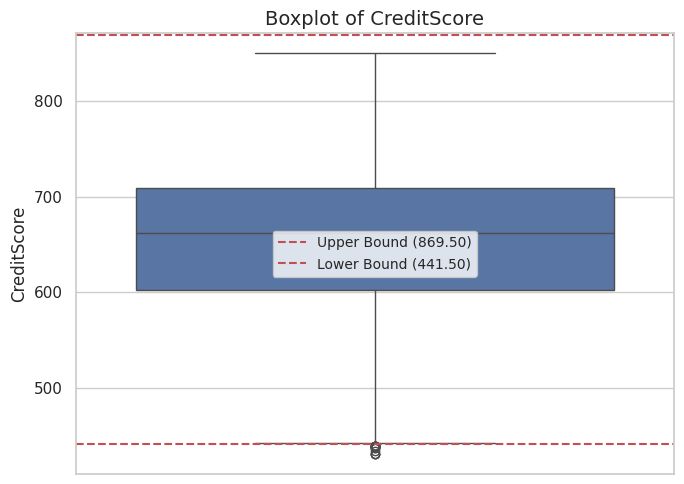

  Number of outliers found based on IQR calculation: 15
  Some outlier values:
1328    438.0
2176    431.0
3879    438.0
4510    439.0
6574    439.0
--------------------

Checking column: Age
  Q1: 32.00, Q3: 42.00, IQR: 10.00
  Lower Bound: 17.00
  Upper Bound: 57.00


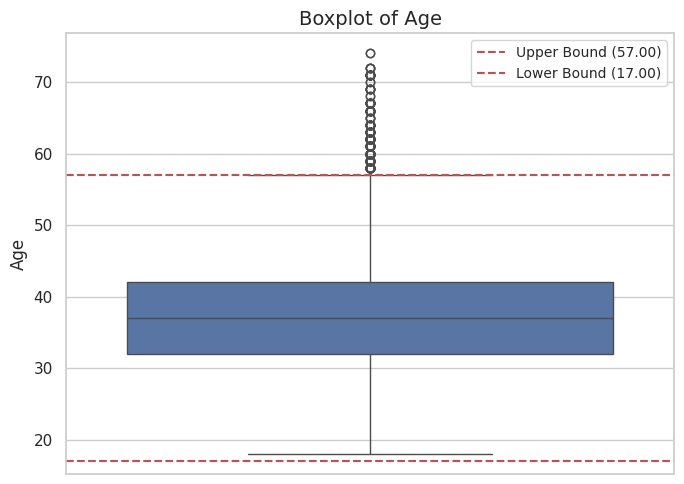

  Number of outliers found based on IQR calculation: 417
  Some outlier values:
57     72.0
118    60.0
121    61.0
187    67.0
199    60.0
--------------------

Checking column: Tenure
  Q1: 3.00, Q3: 7.00, IQR: 4.00
  Lower Bound: -3.00
  Upper Bound: 13.00


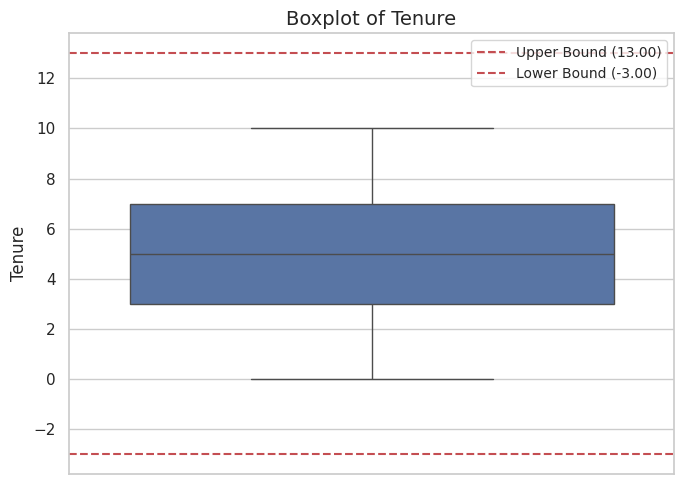

  Number of outliers found based on IQR calculation: 0

Checking column: Balance
  Q1: 0.00, Q3: 109650.98, IQR: 109650.98
  Lower Bound: -164476.47
  Upper Bound: 274127.46


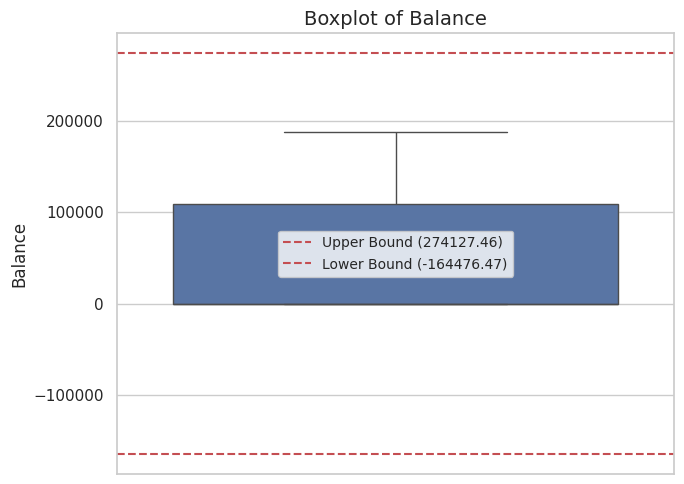

  Number of outliers found based on IQR calculation: 0

Checking column: NumOfProducts
  Q1: 1.00, Q3: 2.00, IQR: 1.00
  Lower Bound: -0.50
  Upper Bound: 3.50


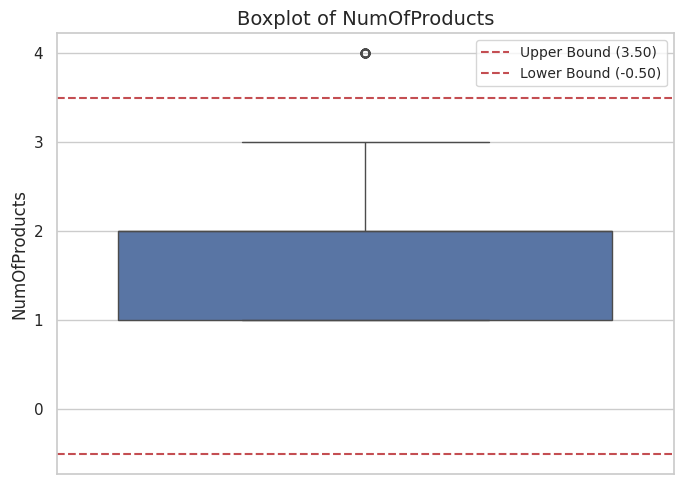

  Number of outliers found based on IQR calculation: 40
  Some outlier values:
404     4.0
447     4.0
605     4.0
947     4.0
2194    4.0
--------------------

Checking column: EstimatedSalary
  Q1: 83629.60, Q3: 157558.46, IQR: 73928.86
  Lower Bound: -27263.69
  Upper Bound: 268451.75


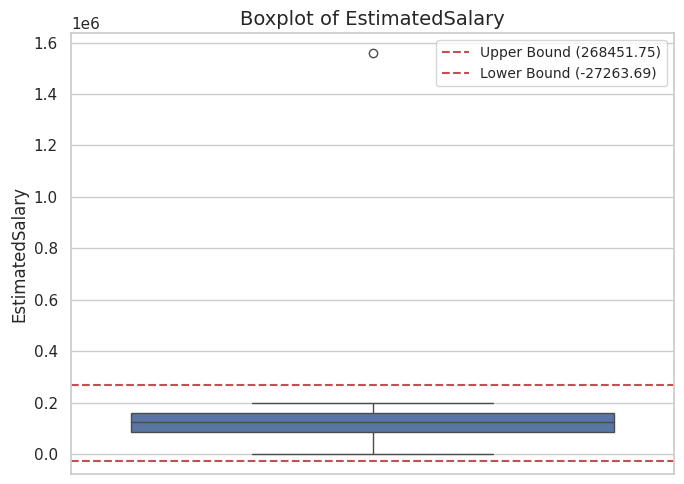

  Number of outliers found based on IQR calculation: 1
  Some outlier values:
377    1557802.42
--------------------

Total number of rows with at least one outlier value across the checked columns: 469

Viewing rows containing outliers (showing first 10):
      id  CustomerId        Surname  CreditScore Geography  Gender   Age  \
57    57  15716085.0  Chukwukadibia        677.0     Spain  Female  72.0   
118  118  15596060.0       Nwabugwu        599.0    France    Male  60.0   
121  121  15671769.0       Lucchese        850.0   Germany    Male  61.0   
187  187  15642725.0      Chiemenam        686.0    France    Male  67.0   
199  199  15679550.0      Kornilova        594.0    France    Male  60.0   
201  201  15797919.0        Chibugo        695.0    France    Male  60.0   
245  245  15602731.0             L?        662.0     Spain  Female  59.0   
286  286  15635116.0           Tsao        651.0    France    Male  60.0   
301  301  15777599.0        Maclean        543.0     Spain 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

print("\n--- Detecting Outliers using IQR and Plotting Boxplots ---")
sns.set_style('whitegrid')

numerical_cols_for_outlier_check = [
    'CreditScore', 'Age', 'Tenure', 'Balance',
    'NumOfProducts', 'EstimatedSalary'
]

df_check = train.copy()

outlier_indices_dict = {}

for col in numerical_cols_for_outlier_check:
    print(f"\nChecking column: {col}")

    Q1 = df_check[col].quantile(0.25)
    Q3 = df_check[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"  Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"  Lower Bound: {lower_bound:.2f}")
    print(f"  Upper Bound: {upper_bound:.2f}")

    plt.figure(figsize=(7, 5))
    sns.boxplot(y=df_check[col])
    plt.title(f'Boxplot of {col}', fontsize=14)
    plt.ylabel(col, fontsize=12)
    plt.axhline(upper_bound, color='r', linestyle='--', label=f'Upper Bound ({upper_bound:.2f})')
    plt.axhline(lower_bound, color='r', linestyle='--', label=f'Lower Bound ({lower_bound:.2f})')
    plt.legend(fontsize=10)
    plt.tight_layout()
    plt.show()

    outliers = df_check[(df_check[col] < lower_bound) | (df_check[col] > upper_bound)]
    outlier_indices = outliers.index

    num_outliers = len(outliers)
    print(f"  Number of outliers found based on IQR calculation: {num_outliers}")

    if num_outliers > 0:
        outlier_indices_dict[col] = outlier_indices.tolist()
        print(f"  Some outlier values:\n{outliers[col].head().to_string()}")
        print("-" * 20)

all_outlier_indices = set()
for indices in outlier_indices_dict.values():
    all_outlier_indices.update(indices)

print(f"\nTotal number of rows with at least one outlier value across the checked columns: {len(all_outlier_indices)}")

if all_outlier_indices:
    print("\nViewing rows containing outliers (showing first 10):")
    sorted_outlier_indices = sorted(list(all_outlier_indices))
    outlier_rows = df_check.loc[sorted_outlier_indices]
    print(outlier_rows.head(10))
else:
    print("\nNo rows containing outliers were found in the checked columns.")

#### **Numerical Features**

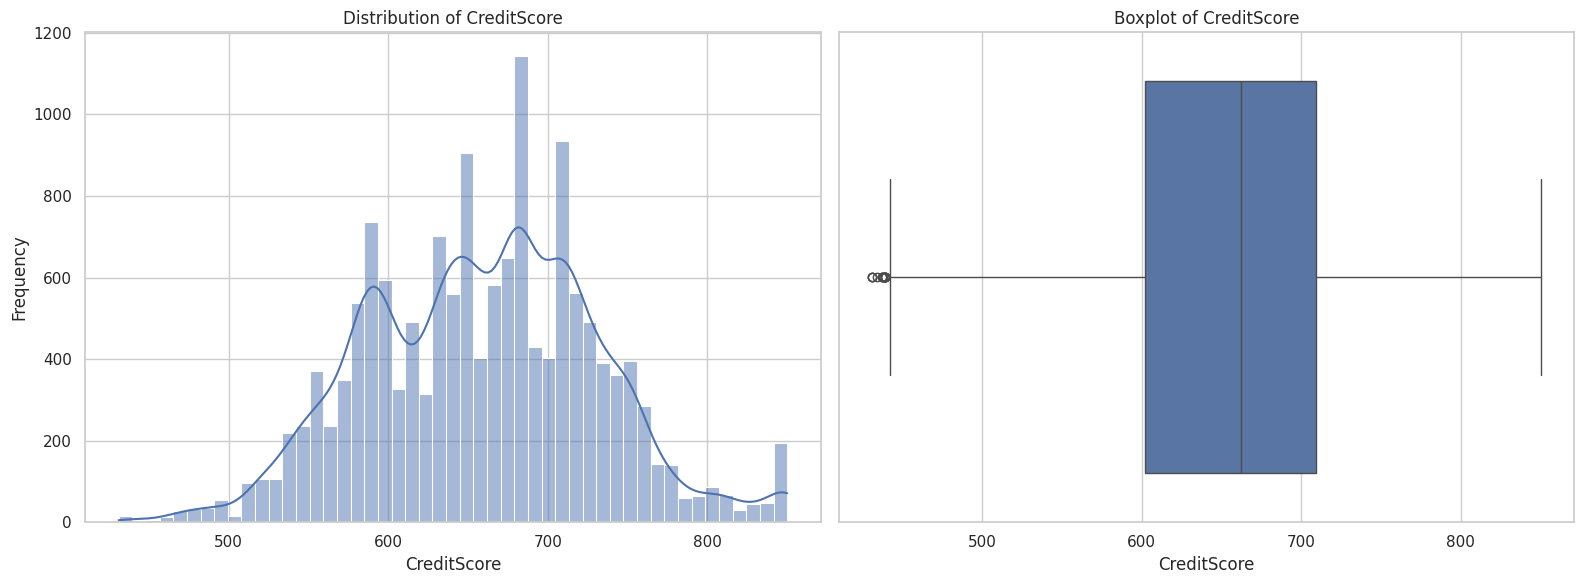

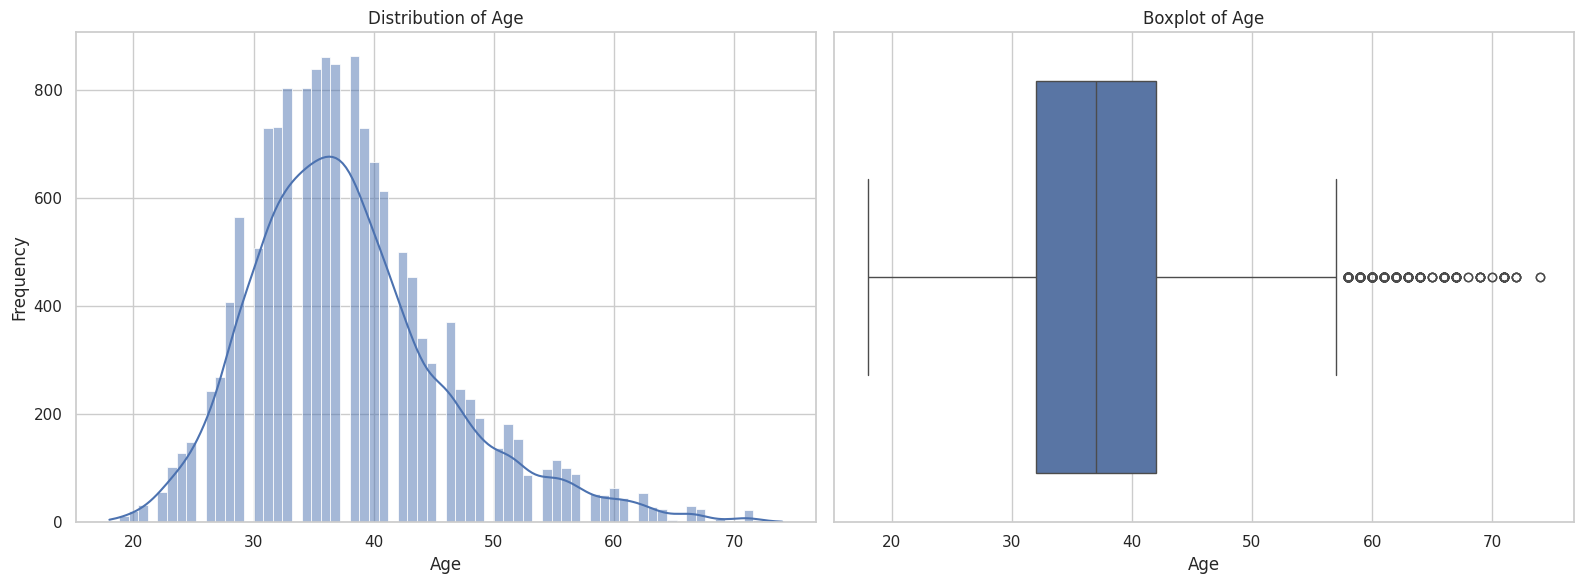

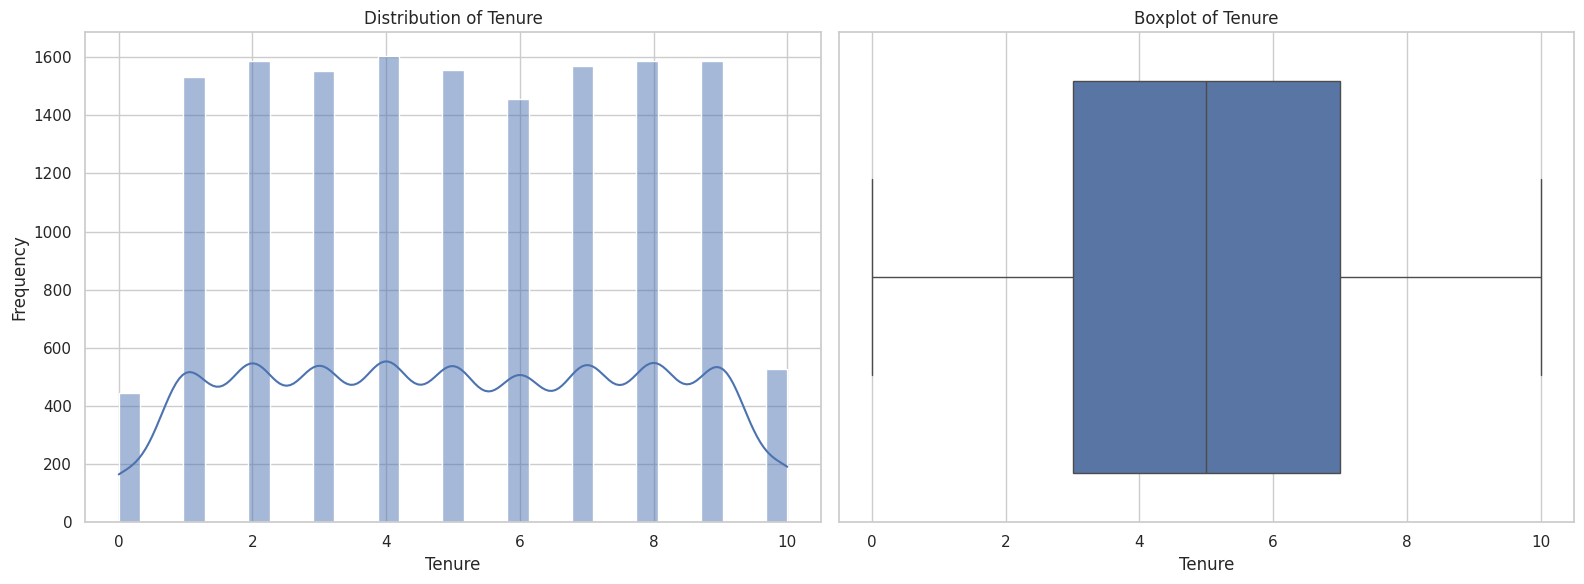

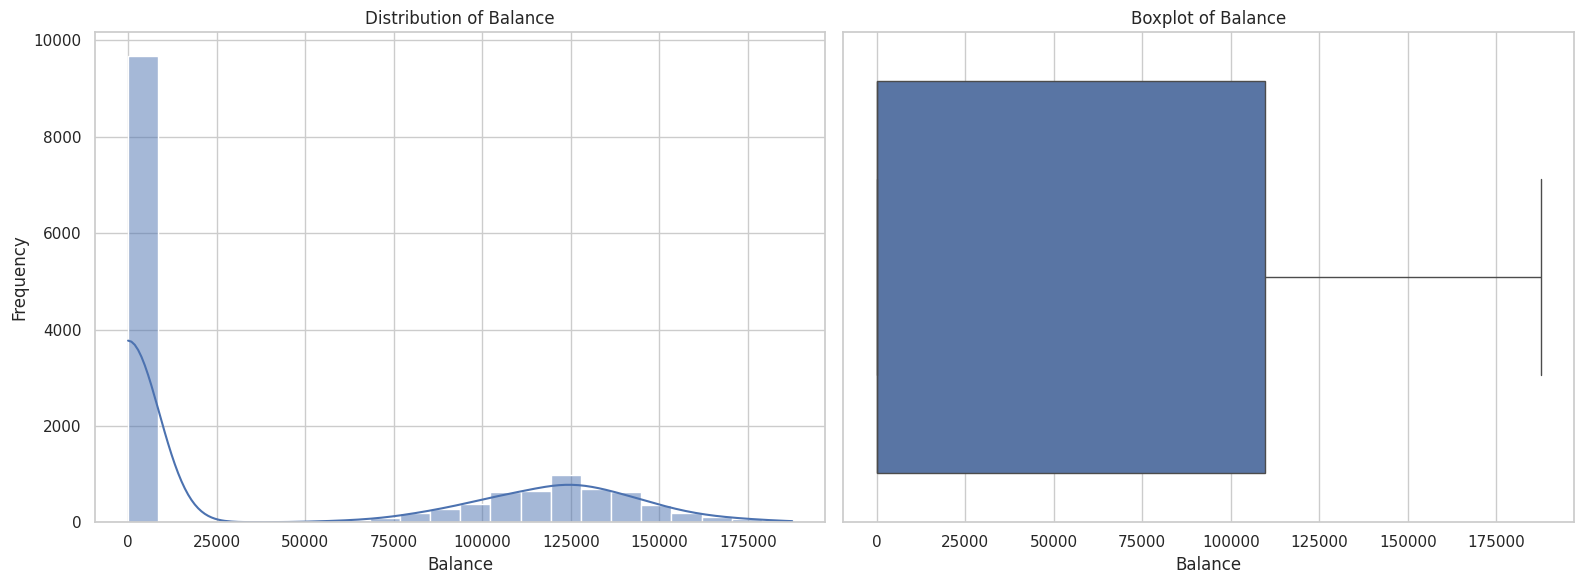

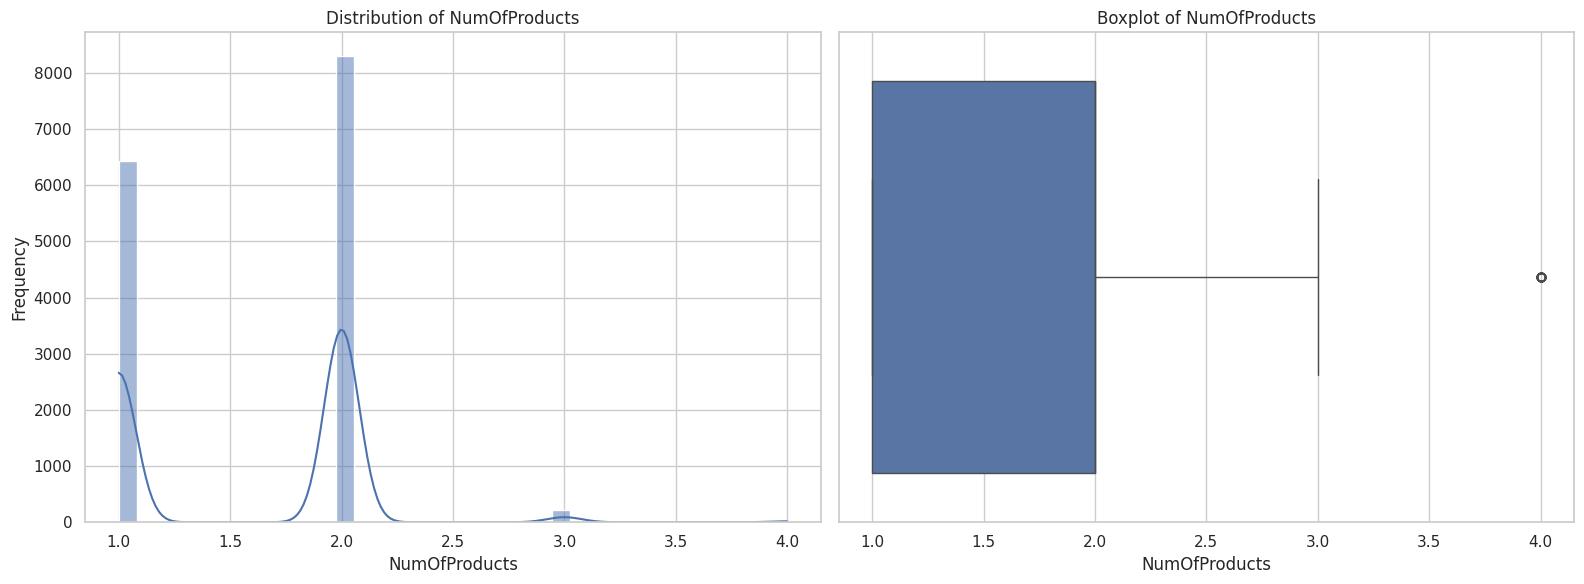

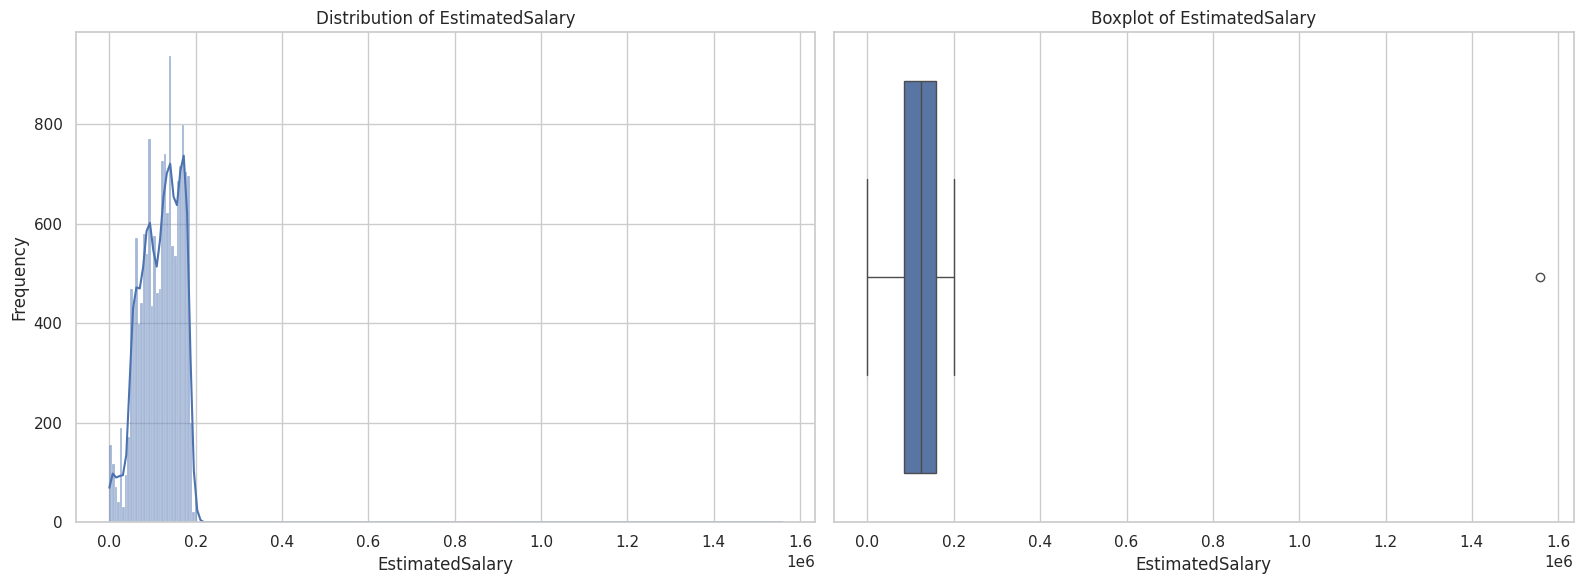

In [ ]:
# Vẽ biểu đồ cho các cột numerical
for col in numerical_columns:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Histogram + KDE plot cho phân phối
    sns.histplot(train[col], kde=True, ax=axes[0])
    axes[0].set_title(f'Distribution of {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequency')

    sns.boxplot(x=train[col], ax=axes[1])
    axes[1].set_title(f'Boxplot of {col}')
    axes[1].set_xlabel(col)

    plt.tight_layout()
    plt.show()


#### **Categorical Features**

--- Phân tích biến: Geography (Biểu đồ tròn) ---
Đếm tần suất (Số lượng):
Geography
Germany    2708
Spain      3321
France     8971
Name: count, dtype: int64
------------------------------
Tỷ lệ phần trăm:
Geography
Germany    18.05%
Spain      22.14%
France     59.81%
Name: count, dtype: object
------------------------------


--- Phân tích biến: Gender (Biểu đồ tròn) ---
Đếm tần suất (Số lượng):
Gender
Female    6642
Male      8358
Name: count, dtype: int64
------------------------------
Tỷ lệ phần trăm:
Gender
Female    44.28%
Male      55.72%
Name: count, dtype: object
------------------------------


--- Phân tích biến: HasCrCard (Biểu đồ tròn) ---
Đếm tần suất (Số lượng):
HasCrCard
0.0     3252
1.0    11748
Name: count, dtype: int64
------------------------------
Tỷ lệ phần trăm:
HasCrCard
0.0    21.68%
1.0    78.32%
Name: count, dtype: object
------------------------------


--- Phân tích biến: IsActiveMember (Biểu đồ tròn) ---
Đếm tần suất (Số lượng):
IsActiveMember
0.0    7497

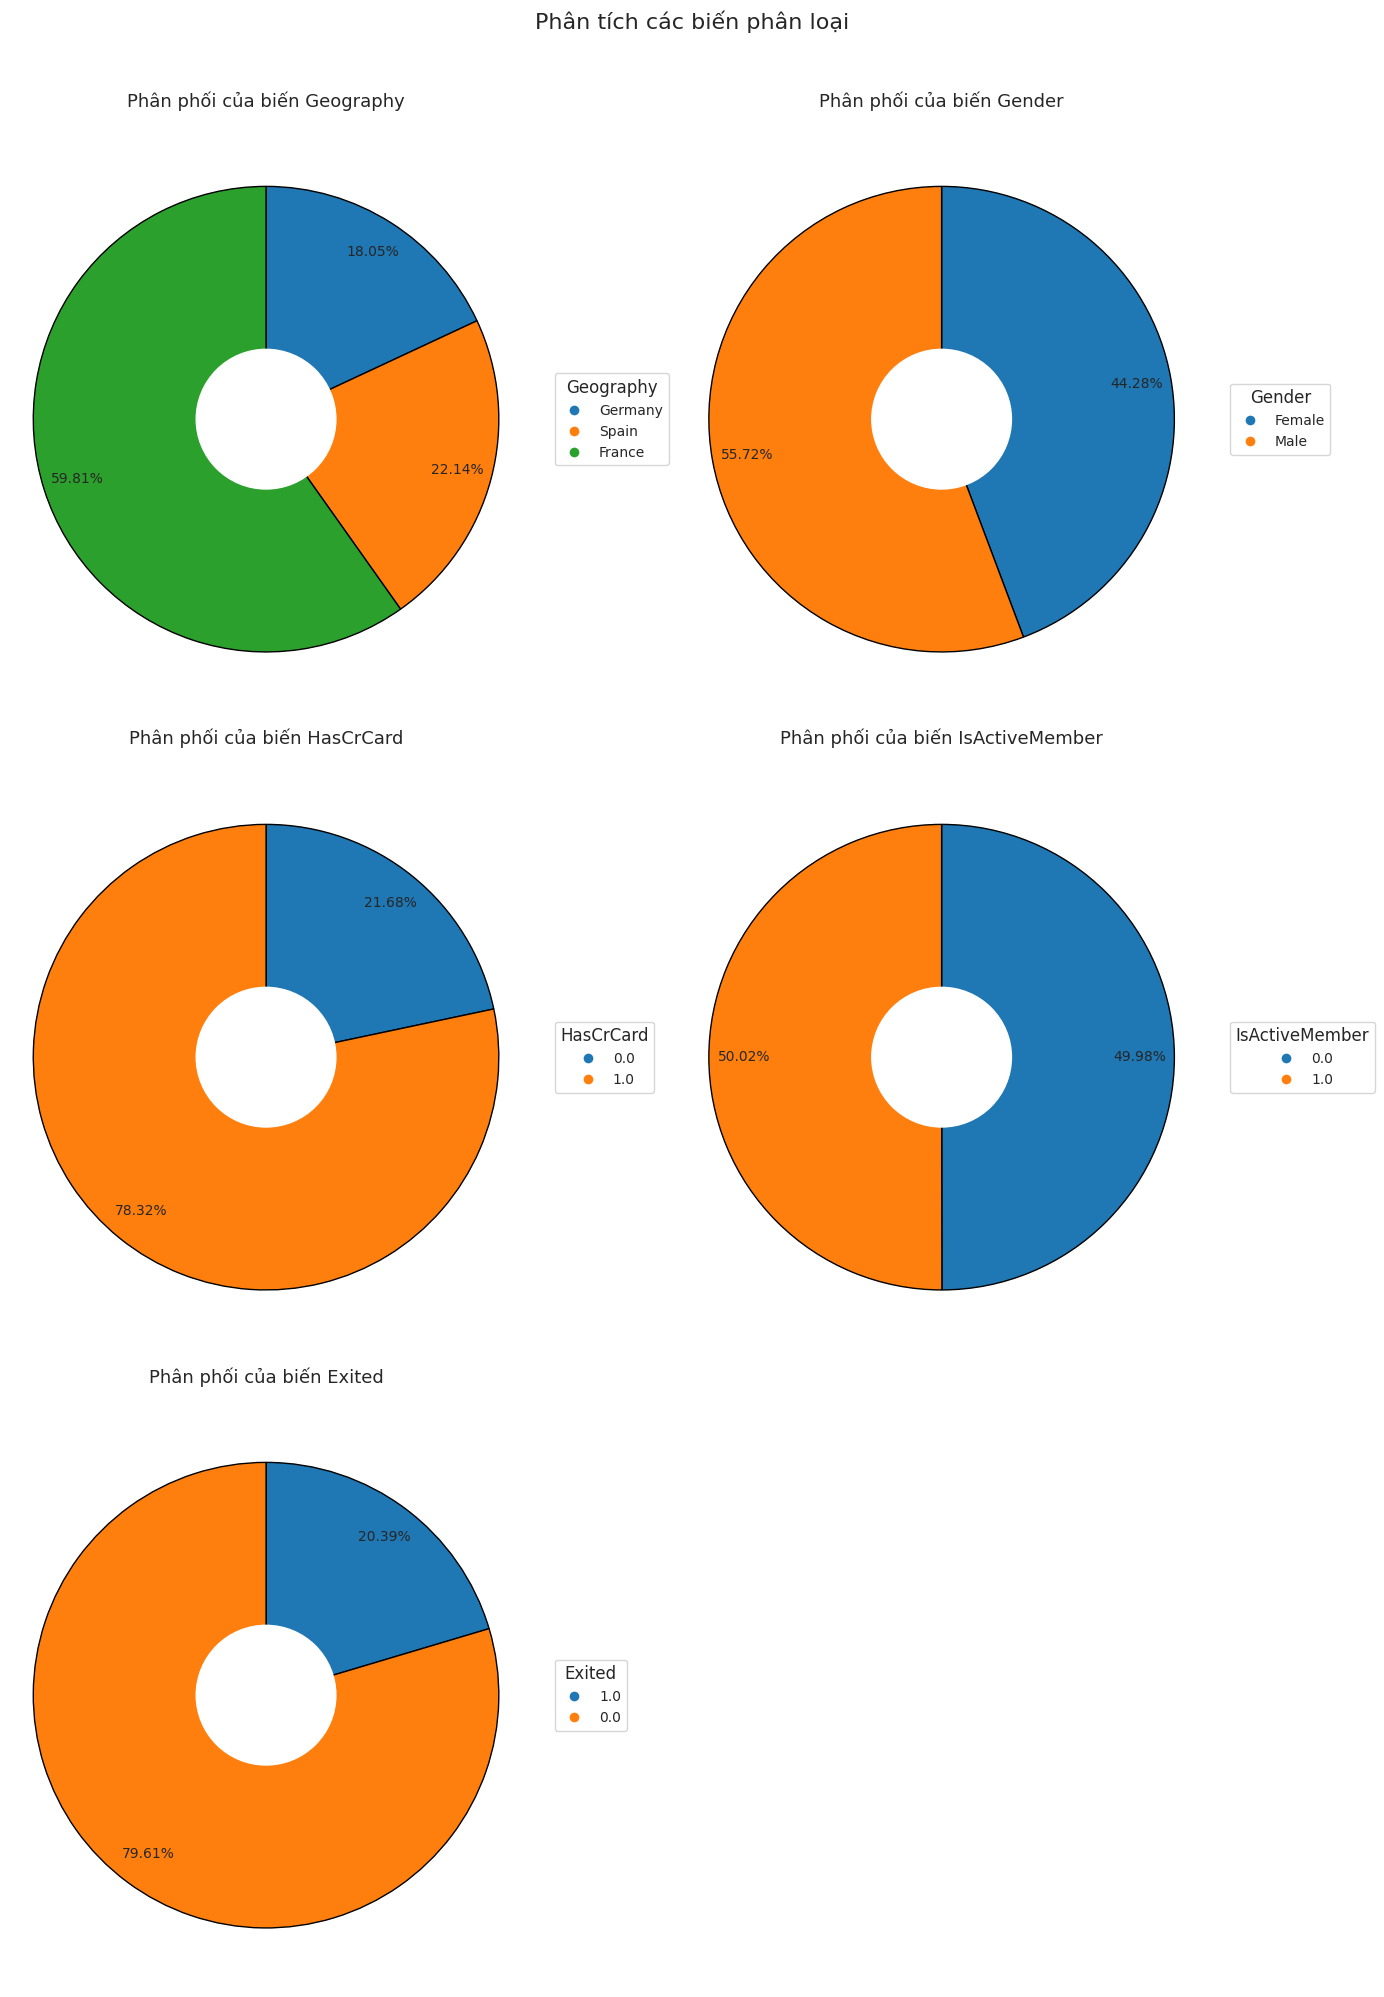

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

categorical_columns = [
    'Geography', 'Gender', 'HasCrCard',
    'IsActiveMember', 'Exited'
]

sns.set_style('whitegrid')


num_plots = len(categorical_columns)
num_cols = 2
num_rows = int(np.ceil(num_plots / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 7, num_rows * 7))

if num_rows == 1 and num_cols == 1:
    axes_flat = [axes]
elif num_rows == 1 or num_cols == 1:
     axes_flat = axes
else:
     axes_flat = axes.flatten()


for i, col in enumerate(categorical_columns):
    ax = axes_flat[i]

    print(f"--- Phân tích biến: {col} (Biểu đồ tròn) ---")

    counts = train[col].value_counts().sort_values(ascending=True)
    labels = counts.index
    sizes = counts.values

    print("Đếm tần suất (Số lượng):")
    print(counts)
    print("-" * 30)
    print("Tỷ lệ phần trăm:")
    print(counts.apply(lambda x: f"{x/counts.sum()*100:.2f}%"))
    print("-" * 30)

    colors = sns.color_palette("tab10", len(labels))

    wedges, texts, autotexts = ax.pie(sizes, labels=None, autopct='%1.2f%%',
                                      startangle=90, counterclock=False,
                                      pctdistance=0.85,
                                      wedgeprops={'edgecolor': 'black'},
                                      colors=colors)

    for text in texts:
        text.set_fontsize(10)
    for autotext in autotexts:
        autotext.set_fontsize(10)
    centre_circle = plt.Circle((0,0), 0.30, fc='white')
    ax.add_artist(centre_circle)

    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[idx], markersize=8)
               for idx in range(len(labels))]
    ax.legend(handles, labels, title=f"{col}", loc="center left", fontsize=10, title_fontsize=12,
               bbox_to_anchor=(1.05, 0.5))

    ax.set_title(f'Phân phối của biến {col}', fontsize=13, pad=15)
    ax.axis('equal')

    print("\n" + "=" * 50 + "\n")

for j in range(i + 1, len(axes_flat)):
    axes_flat[j].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle('Phân tích các biến phân loại', fontsize=16)

plt.show()


### **Multivariable Analysis (Phân tích đa biến)**

#### **Numerical Features**

Descriptive statistics for numerical variables grouped by Exited:
       CreditScore                                                             \
             count        mean        std    min     25%    50%    75%    max   
Exited                                                                          
0.0        11942.0  660.519176  72.111132  431.0  604.00  663.0  710.0  850.0   
1.0         3058.0  652.338784  74.069465  445.0  594.25  652.0  705.0  850.0   

            Age             ... NumOfProducts      EstimatedSalary  \
          count       mean  ...           75%  max           count   
Exited                      ...                                      
0.0     11942.0  35.876654  ...           2.0  4.0         11942.0   
1.0      3058.0  45.742642  ...           1.0  4.0          3058.0   

                                                                    \
                 mean           std     min         25%        50%   
Exited                               

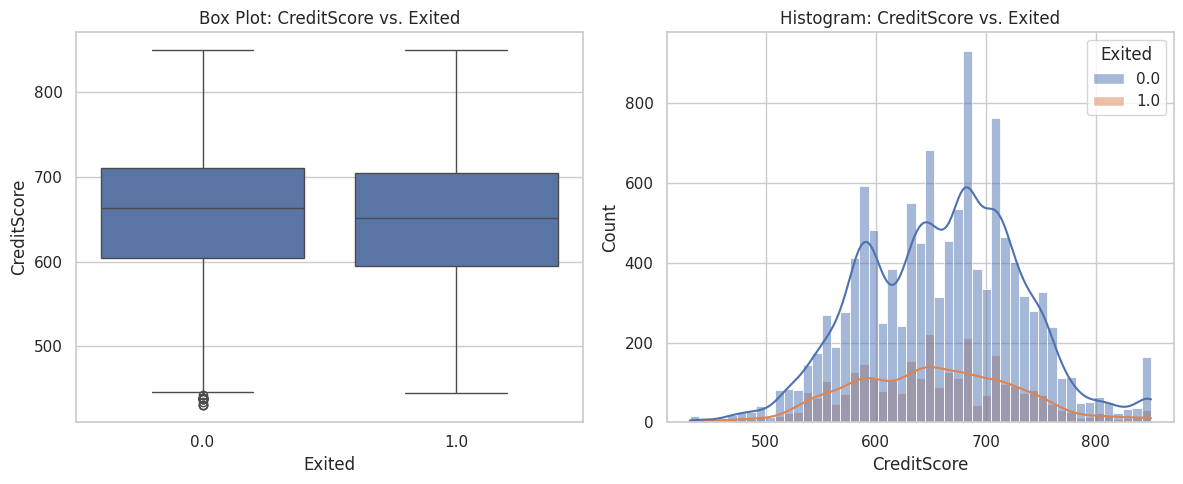

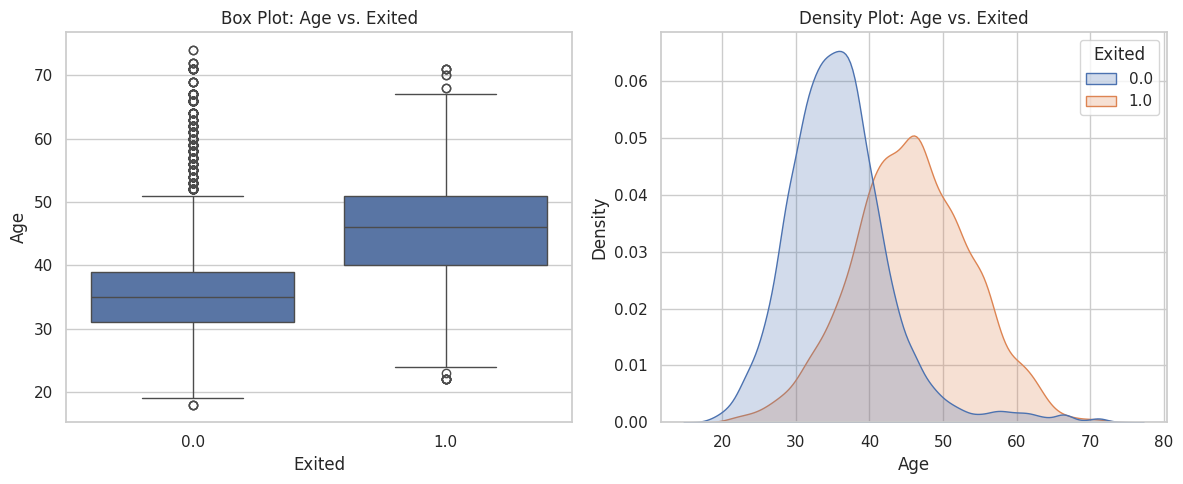

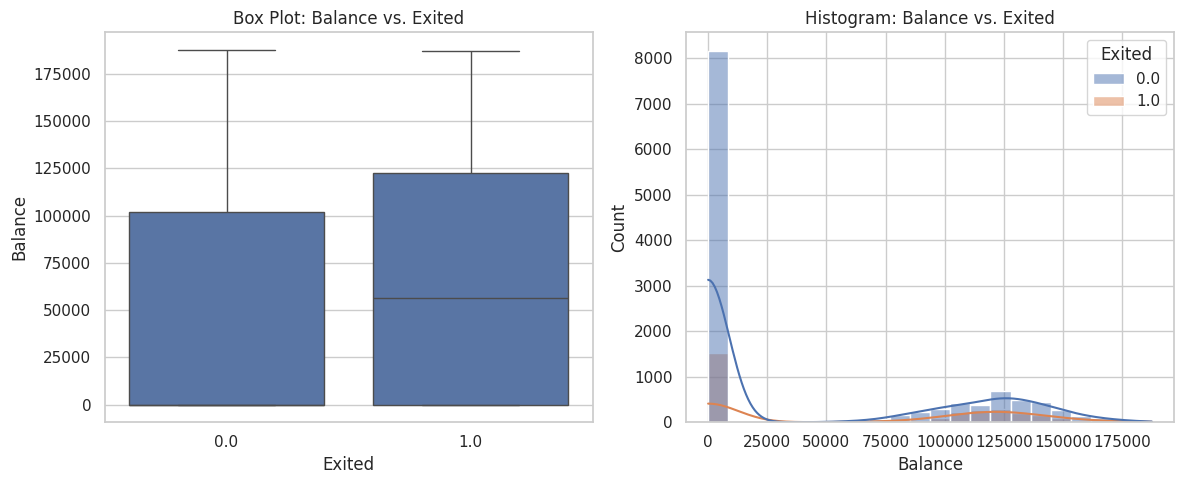

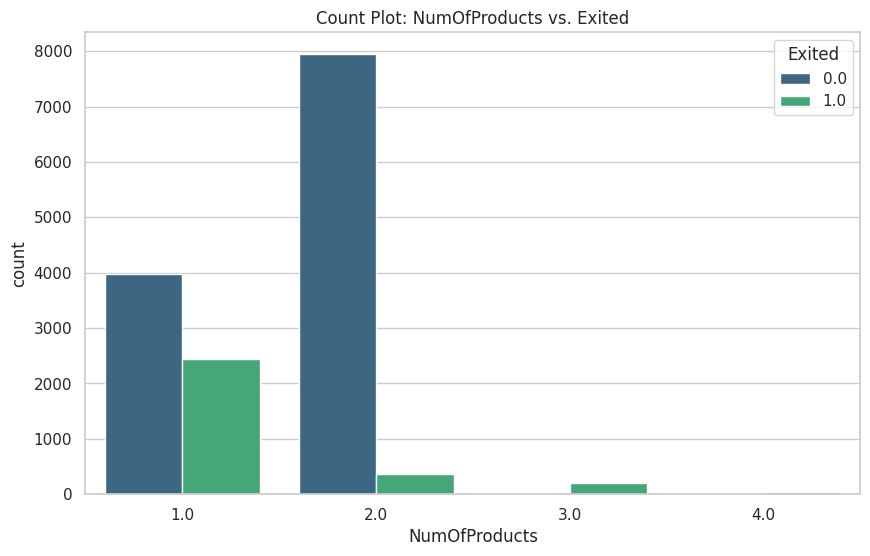

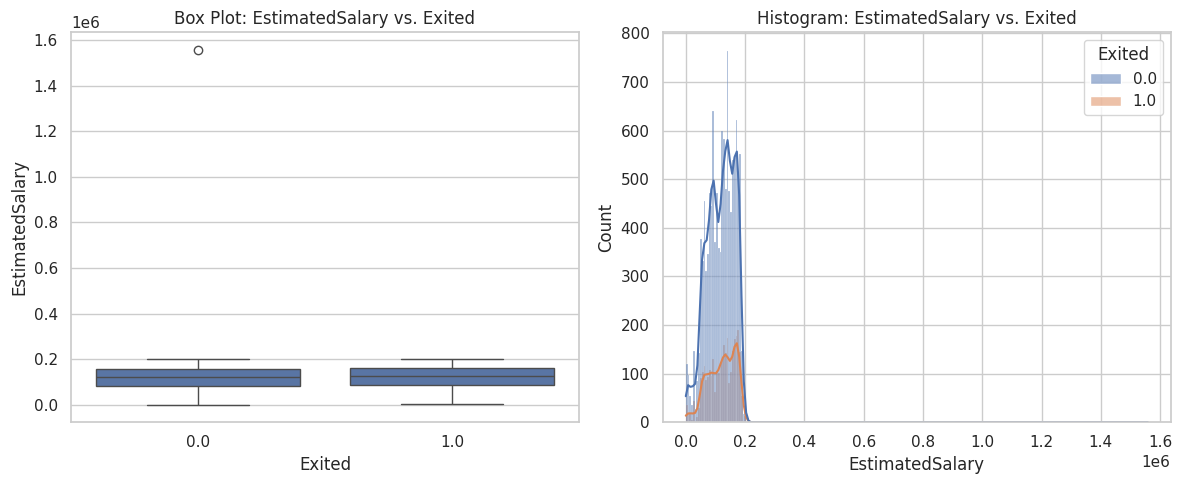

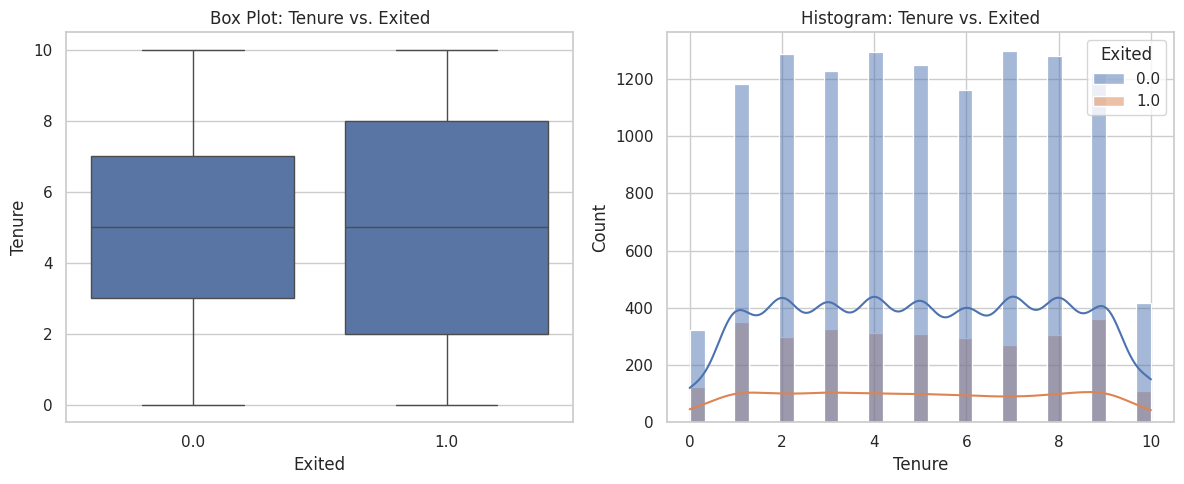

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# --- Overview Analysis: Descriptive Statistics Grouped by 'Exited' ---
print("Descriptive statistics for numerical variables grouped by Exited:")

# Select numerical columns (adjust this list as needed)
numeric_cols = numerical_columns

# Use groupby() and describe()
grouped_stats = train.groupby('Exited')[numeric_cols].describe()
print(grouped_stats)

print("\nMedian of numerical variables grouped by Exited:")
grouped_median = train.groupby('Exited')[numeric_cols].median()
print(grouped_median)

print("-" * 50)


sns.set(style="whitegrid")

# 1. CreditScore vs. Exited
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Exited', y='CreditScore', data=train)
plt.title('Box Plot: CreditScore vs. Exited')

plt.subplot(1, 2, 2)
sns.histplot(data=train, x='CreditScore', hue='Exited', kde=True, common_norm=False)
plt.title('Histogram: CreditScore vs. Exited')

plt.tight_layout()
plt.show()

# 2. Age vs. Exited
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Exited', y='Age', data=train)
plt.title('Box Plot: Age vs. Exited')

plt.subplot(1, 2, 2)
sns.kdeplot(data=train, x='Age', hue='Exited', fill=True, common_norm=False)
plt.title('Density Plot: Age vs. Exited')

plt.tight_layout()
plt.show()

# 3. Balance vs. Exited
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Exited', y='Balance', data=train)
plt.title('Box Plot: Balance vs. Exited')

plt.subplot(1, 2, 2)
sns.histplot(data=train, x='Balance', hue='Exited', kde=True, common_norm=False)
plt.title('Histogram: Balance vs. Exited')

plt.tight_layout()
plt.show()

# 4. NumOfProducts vs. Exited (Discrete variable, countplot can show proportions)
plt.figure(figsize=(10, 6))
sns.countplot(x='NumOfProducts', hue='Exited', data=train, palette='viridis')
plt.title('Count Plot: NumOfProducts vs. Exited')
plt.show()

# 5. EstimatedSalary vs. Exited
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Exited', y='EstimatedSalary', data=train)
plt.title('Box Plot: EstimatedSalary vs. Exited')

plt.subplot(1, 2, 2)
sns.histplot(data=train, x='EstimatedSalary', hue='Exited', kde=True, common_norm=False)
plt.title('Histogram: EstimatedSalary vs. Exited')

plt.tight_layout()
plt.show()

# ̉. Tenure vs. Exited
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Exited', y='Tenure', data=train)
plt.title('Box Plot: Tenure vs. Exited')

plt.subplot(1, 2, 2)
sns.histplot(data=train, x='Tenure', hue='Exited', kde=True, common_norm=False)
plt.title('Histogram: Tenure vs. Exited')

plt.tight_layout()
plt.show()

In [ ]:
from scipy import stats

# Significance level
alpha = 0.05

print("\n--- Multivariate Analysis: Numerical Features vs. Exited (with T-tests) ---")

print("\n--- Independent Samples T-tests (Comparing means between Exited=0 and Exited=1) ---")

for col in numerical_columns:
    print(f"\nTesting Feature: {col}")
    group0 = train[train['Exited'] == 0][col].dropna() # Group that did not exit
    group1 = train[train['Exited'] == 1][col].dropna() # Group that exited

    print(f"  H0: The mean {col} for Exited=0 is equal to the mean {col} for Exited=1.")
    print(f"  H1: The mean {col} for Exited=0 is significantly different from the mean {col} for Exited=1.")

    # Perform Welch's T-test (doesn't assume equal variances, generally safer)
    if len(group0) > 1 and len(group1) > 1: # Need at least 2 samples in each group
        try:
            t_stat, p_value = stats.ttest_ind(group0, group1, equal_var=False, nan_policy='omit')
            print(f"\n  Test Results:")
            print(f"    T-statistic: {t_stat:.4f}")
            print(f"    P-value: {p_value:.4f}")

            # Interpretation
            if p_value < alpha:
                # If p-value is small, reject H0
                print(f"    Interpretation: Reject H0 at alpha={alpha}. There is a significant difference in the mean {col} between Exited groups.")
            else:
                # If p-value is large, fail to reject H0
                print(f"    Interpretation: Fail to reject H0 at alpha={alpha}. There is no significant difference found in the mean {col} between Exited groups.")
        except Exception as e:
             print(f"    Could not perform T-test for {col}: {e}")
    else:
        print("\n  Test Results:")
        print("    Not enough data in one or both groups to perform T-test.")
    print("-" * 20)


--- Multivariate Analysis: Numerical Features vs. Exited (with T-tests) ---

--- Independent Samples T-tests (Comparing means between Exited=0 and Exited=1) ---

Testing Feature: CreditScore
  H0: The mean CreditScore for Exited=0 is equal to the mean CreditScore for Exited=1.
  H1: The mean CreditScore for Exited=0 is significantly different from the mean CreditScore for Exited=1.

  Test Results:
    T-statistic: 5.4786
    P-value: 0.0000
    Interpretation: Reject H0 at alpha=0.05. There is a significant difference in the mean CreditScore between Exited groups.
--------------------

Testing Feature: Age
  H0: The mean Age for Exited=0 is equal to the mean Age for Exited=1.
  H1: The mean Age for Exited=0 is significantly different from the mean Age for Exited=1.

  Test Results:
    T-statistic: -62.2974
    P-value: 0.0000
    Interpretation: Reject H0 at alpha=0.05. There is a significant difference in the mean Age between Exited groups.
--------------------

Testing Feature: Te

#### **Categorical Features**

In [ ]:
train["Exited"][train["Exited"]== 0].groupby(by=train["Gender"]).count()


Gender
Female    4762
Male      7180
Name: Exited, dtype: int64

In [ ]:
train["Exited"][train["Exited"]== 1].groupby(by=train["Gender"]).count()


Gender
Female    1880
Male      1178
Name: Exited, dtype: int64

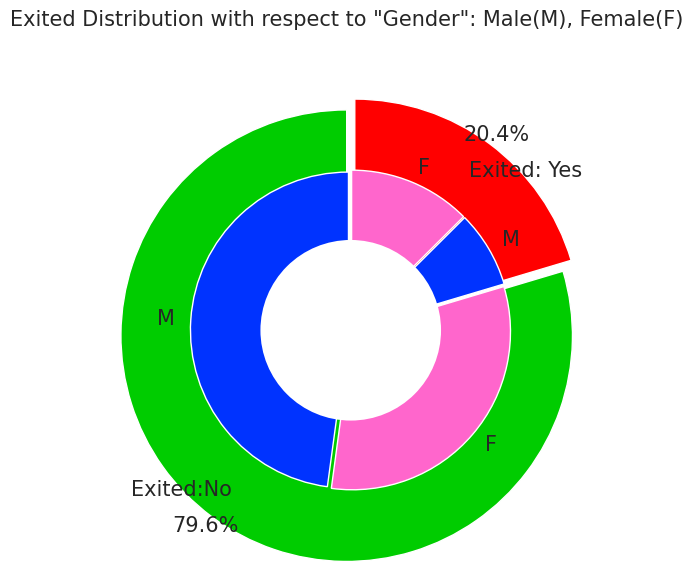

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
labels = ["Exited: Yes", "Exited:No"]
values = [3058, 11942]
labels_gender = ["F", "M", "F", "M"]
sizes_gender = [1880, 1178, 4762, 7180]

colors = ['#ff0000', '#00CC00']
colors_by_gender = ['#FF66CC', '#0033FF', '#FF66CC', '#0033FF']

explode = (0.3, 0.3)
explode_gender = (0.1, 0.1, 0.1, 0.1)
textprops = {"fontsize": 15}

plt.pie(values, labels=labels, autopct='%1.1f%%', pctdistance=1.05, labeldistance=0.85,
        colors=colors, startangle=90, frame=True, explode=explode, radius=10,
        textprops=textprops, counterclock=False)
plt.pie(sizes_gender, labels=labels_gender, colors=colors_by_gender,
        startangle=90, explode=explode_gender, radius=7,
        textprops=textprops, counterclock=False)

# Vẽ vòng tròn trắng ở giữa
centre_circle = plt.Circle((0, 0), 4, color='black', fc='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Exited Distribution with respect to "Gender": Male(M), Female(F)', fontsize=15, y=1.1)

plt.axis('equal')
plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px
fig = px.histogram(train, x="Exited", color="Geography", barmode="group", title="<b>Exited distribution with respect to 'Geography'</b>")
fig.update_layout(width=800, height=500, bargap=0.25)
fig.show()

In [ ]:
fig = px.histogram(train, x="Exited", color="HasCrCard", title="<b>Exited distribution with respect to 'Has Credit card'</b>")
fig.update_layout(width=800, height=500, bargap=0.25)
fig.show()

In [ ]:
fig = px.histogram(train, x="Exited", color="IsActiveMember", title="<b>Exited distribution with respect to 'Active member'</b>")
fig.update_layout(width=800, height=500, bargap=0.25)
fig.show()

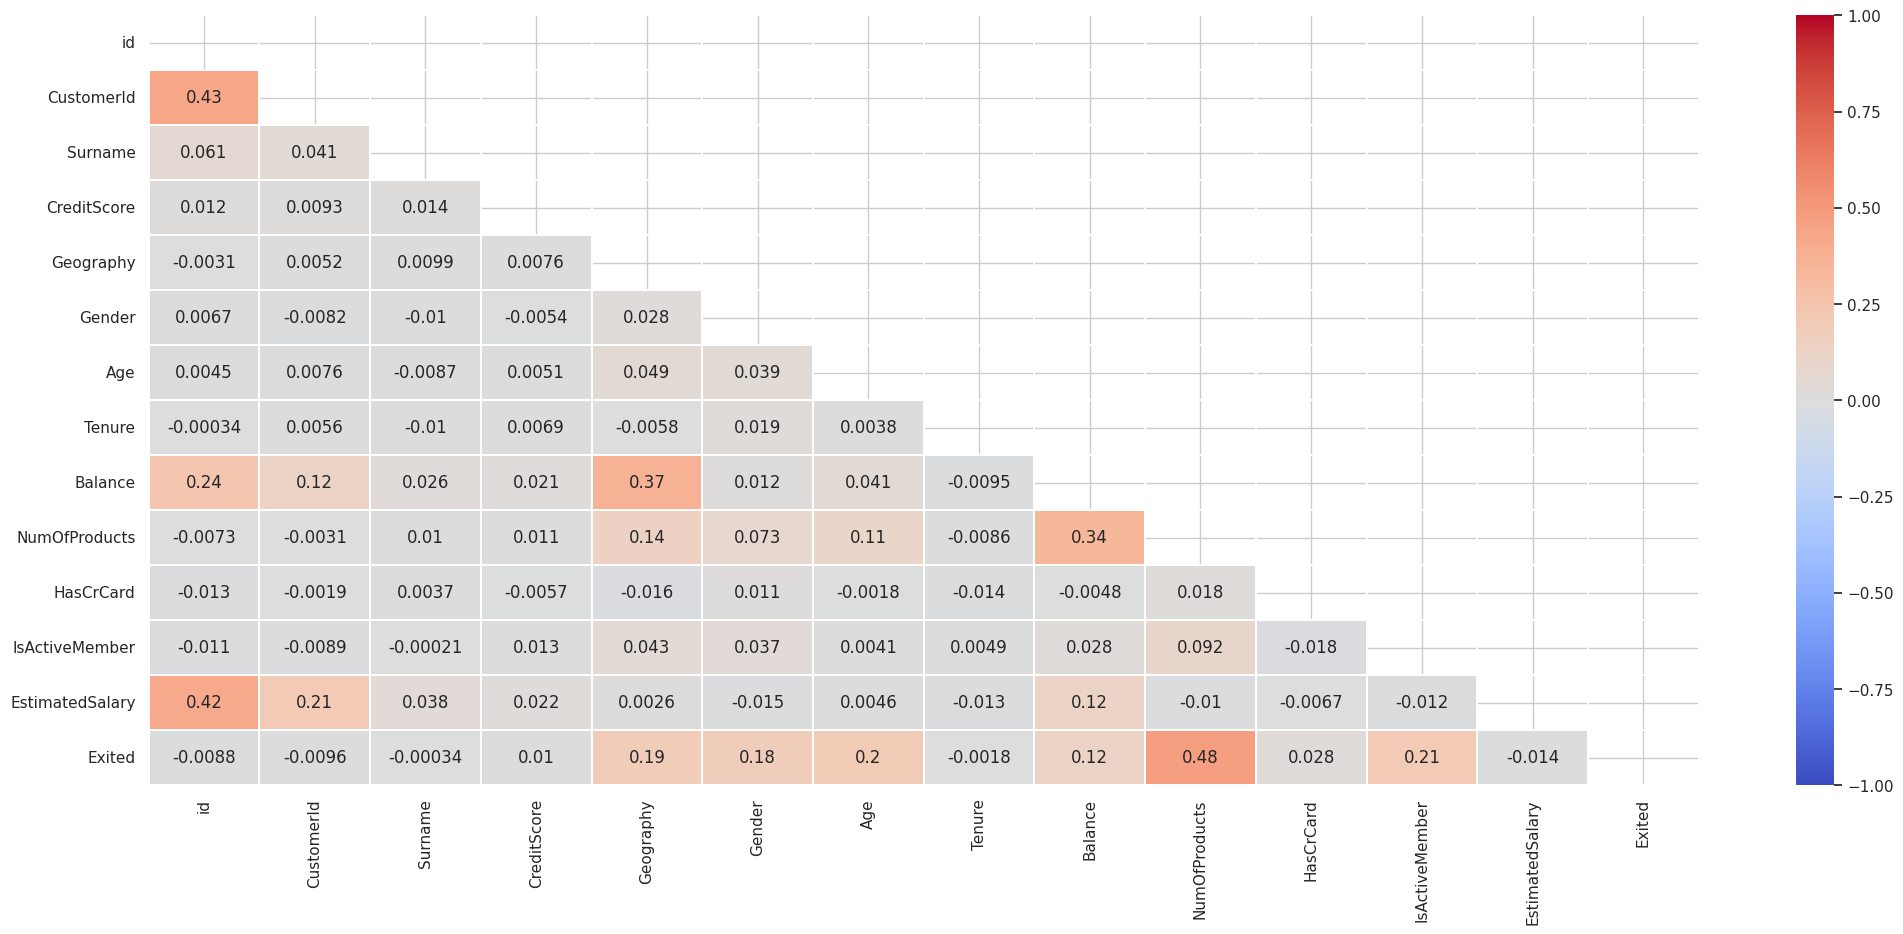

In [ ]:
plt.figure(figsize=(25, 10))

corr = train.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

In [ ]:
print("\n--- Chi-Square Tests of Independence (Testing association with Exited) ---")

categorical_columns_for_chi2 = [
    'Geography', 'Gender', 'HasCrCard',
    'IsActiveMember'
]

alpha = 0.05

for col in categorical_columns_for_chi2:
    print(f"\nTesting Association between: {col} and Exited")

    # Create a contingency table (cross-tabulation)
    contingency_table = pd.crosstab(train[col], train['Exited'])
    print("\n  Contingency Table:")
    print(contingency_table)

    print(f"\n  H0: {col} and Exited are independent (no association).")
    print(f"  H1: {col} and Exited are dependent (there is an association).")

    # Perform Chi-Square test
    try:
        chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
        print(f"\n  Test Results:")
        print(f"    Chi-Square Statistic: {chi2_stat:.4f}")
        print(f"    P-value: {p_value:.4f}")
        print(f"    Degrees of Freedom: {dof}")
        # print("  Expected Frequencies:\n", expected) # Optional

        # Interpretation linked to H0/H1
        if p_value < alpha:
            # If p-value is small, reject H0 (independence)
            print(f"    Interpretation: Reject H0 at alpha={alpha}. There is a significant association between {col} and Exited.")
        else:
            # If p-value is large, fail to reject H0 (independence)
            print(f"    Interpretation: Fail to reject H0 at alpha={alpha}. There is no significant association found between {col} and Exited.")
    except ValueError as e:
        print(f"\n  Test Results:")
        print(f"    Could not perform Chi-Square test for {col} (perhaps low expected frequencies): {e}")
    except Exception as e:
        print(f"\n  Test Results:")
        print(f"    An error occurred during Chi-Square test for {col}: {e}")
    print("-" * 20)


--- Chi-Square Tests of Independence (Testing association with Exited) ---

Testing Association between: Geography and Exited

  Contingency Table:
Exited      0.0   1.0
Geography            
France     7578  1393
Germany    1571  1137
Spain      2793   528

  H0: Geography and Exited are independent (no association).
  H1: Geography and Exited are dependent (there is an association).

  Test Results:
    Chi-Square Statistic: 950.1417
    P-value: 0.0000
    Degrees of Freedom: 2
    Interpretation: Reject H0 at alpha=0.05. There is a significant association between Geography and Exited.
--------------------

Testing Association between: Gender and Exited

  Contingency Table:
Exited   0.0   1.0
Gender            
Female  4762  1880
Male    7180  1178

  H0: Gender and Exited are independent (no association).
  H1: Gender and Exited are dependent (there is an association).

  Test Results:
    Chi-Square Statistic: 459.5865
    P-value: 0.0000
    Degrees of Freedom: 1
    Interpreta

# **3) Data preparation**

## **Data Cleaning**

### **Handling Missing Values**

Since there are no missing values, no action is required.

### **Handling Duplicate Value**

Since there are no duplicate values, no action is required.

### **Handling Outlier**

These outliers were not handled because they have practical significance and are not considered overly extreme values.



In [ ]:
dataset_train = train.copy()
dataset_train

id  CustomerId        Surname  CreditScore Geography  Gender   Age  \
0          0  15709511.0         Ch'ang        754.0     Spain    Male  40.0   
1          1  15592761.0       Genovese        579.0    France  Female  28.0   
2          2  15579914.0            Yeh        744.0    France  Female  56.0   
3          3  15669611.0   Nwachinemelu        697.0    France    Male  29.0   
4          4  15761775.0          Hs?eh        628.0    France  Female  22.0   
...      ...         ...            ...          ...       ...     ...   ...   
14995  14995  15668767.0          Smith        667.0    France  Female  51.0   
14996  14996  15782231.0  Iweobiegbunam        583.0     Spain    Male  54.0   
14997  14997  15675501.0      Trevisano        684.0    France  Female  34.0   
14998  14998  15585595.0      Onyekachi        439.0   Germany    Male  39.0   
14999  14999  15688865.0            Kuo        653.0    France    Male  41.0   

       Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0         8.0  102954.68            2.0        1.0             1.0   
1         1.0       0.00            2.0        1.0             0.0   
2         5.0       0.00            1.0        1.0             0.0   
3         2.0       0.00            2.0        1.0             0.0   
4         9.0       0.00            2.0        1.0             0.0   
...       ...        ...            ...        ...             ...   
14995     1.0       0.00            1.0        0.0             0.0   
14996     6.0       0.00            2.0        0.0             1.0   
14997     4.0       0.00            2.0        0.0             1.0   
14998     8.0  107764.75            2.0        1.0             1.0   
14999     4.0       0.00            1.0        1.0             0.0   

       EstimatedSalary  Exited  
0            149238.35     0.0  
1             64869.32     0.0  
2            158816.03     1.0  
3             55775.72     0.0  
4             49653.39     0.0  
...                ...     ...  
14995        129870.93     1.0  
14996        172033.57     1.0  
14997        131363.57     0.0  
14998        131710.59     0.0  
14999        148528.24     0.0  

[15000 rows x 14 columns]

In [ ]:
dataset_test = test.copy()
dataset_test

id  CustomerId   Surname  CreditScore Geography  Gender   Age  \
0     15000  15682433.0     Smith        751.0    France  Female  38.0   
1     15001  15686835.0     T'ien        711.0   Germany  Female  43.0   
2     15002  15784491.0     Ch'iu        592.0     Spain    Male  40.0   
3     15003  15607986.0     Brown        676.0   Germany    Male  48.0   
4     15004  15622003.0    Baresi        746.0    France    Male  36.0   
...     ...         ...       ...          ...       ...     ...   ...   
9995  24995  15700654.0  Folliero        743.0    France    Male  32.0   
9996  24996  15682369.0   Chizoba        749.0    France    Male  45.0   
9997  24997  15757897.0      Chin        769.0   Germany    Male  37.0   
9998  24998  15594786.0   Lo Duca        792.0    France    Male  43.0   
9999  24999  15634591.0    Nnanna        663.0    France    Male  40.0   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0        3.0       0.00            2.0        1.0             0.0   
1        2.0  143680.36            2.0        1.0             1.0   
2        4.0       0.00            2.0        1.0             1.0   
3        5.0  121629.22            1.0        1.0             0.0   
4        5.0       0.00            2.0        1.0             1.0   
...      ...        ...            ...        ...             ...   
9995    10.0       0.00            2.0        1.0             0.0   
9996     8.0       0.00            2.0        1.0             0.0   
9997     8.0   97514.07            1.0        1.0             0.0   
9998     3.0  168883.08            1.0        1.0             1.0   
9999     3.0       0.00            1.0        1.0             1.0   

      EstimatedSalary  
0           145558.42  
1           118188.15  
2            36754.13  
3           122221.71  
4            97468.44  
...               ...  
9995        172782.69  
9996        163331.65  
9997         76637.38  
9998        152740.16  
9999         73371.65  

[10000 rows x 13 columns]

In [ ]:
dataset_train.drop(['id', 'CustomerId', 'Surname'], axis=1, inplace=True)
dataset_train

CreditScore Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
0            754.0     Spain    Male  40.0     8.0  102954.68            2.0   
1            579.0    France  Female  28.0     1.0       0.00            2.0   
2            744.0    France  Female  56.0     5.0       0.00            1.0   
3            697.0    France    Male  29.0     2.0       0.00            2.0   
4            628.0    France  Female  22.0     9.0       0.00            2.0   
...            ...       ...     ...   ...     ...        ...            ...   
14995        667.0    France  Female  51.0     1.0       0.00            1.0   
14996        583.0     Spain    Male  54.0     6.0       0.00            2.0   
14997        684.0    France  Female  34.0     4.0       0.00            2.0   
14998        439.0   Germany    Male  39.0     8.0  107764.75            2.0   
14999        653.0    France    Male  41.0     4.0       0.00            1.0   

       HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0            1.0             1.0        149238.35     0.0  
1            1.0             0.0         64869.32     0.0  
2            1.0             0.0        158816.03     1.0  
3            1.0             0.0         55775.72     0.0  
4            1.0             0.0         49653.39     0.0  
...          ...             ...              ...     ...  
14995        0.0             0.0        129870.93     1.0  
14996        0.0             1.0        172033.57     1.0  
14997        0.0             1.0        131363.57     0.0  
14998        1.0             1.0        131710.59     0.0  
14999        1.0             0.0        148528.24     0.0  

[15000 rows x 11 columns]

In [ ]:
dataset_test.drop(['id', 'CustomerId', 'Surname'], axis=1, inplace=True)
dataset_test

CreditScore Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
0           751.0    France  Female  38.0     3.0       0.00            2.0   
1           711.0   Germany  Female  43.0     2.0  143680.36            2.0   
2           592.0     Spain    Male  40.0     4.0       0.00            2.0   
3           676.0   Germany    Male  48.0     5.0  121629.22            1.0   
4           746.0    France    Male  36.0     5.0       0.00            2.0   
...           ...       ...     ...   ...     ...        ...            ...   
9995        743.0    France    Male  32.0    10.0       0.00            2.0   
9996        749.0    France    Male  45.0     8.0       0.00            2.0   
9997        769.0   Germany    Male  37.0     8.0   97514.07            1.0   
9998        792.0    France    Male  43.0     3.0  168883.08            1.0   
9999        663.0    France    Male  40.0     3.0       0.00            1.0   

      HasCrCard  IsActiveMember  EstimatedSalary  
0           1.0             0.0        145558.42  
1           1.0             1.0        118188.15  
2           1.0             1.0         36754.13  
3           1.0             0.0        122221.71  
4           1.0             1.0         97468.44  
...         ...             ...              ...  
9995        1.0             0.0        172782.69  
9996        1.0             0.0        163331.65  
9997        1.0             0.0         76637.38  
9998        1.0             1.0        152740.16  
9999        1.0             1.0         73371.65  

[10000 rows x 10 columns]

## **Trying Different Approaches**

### **Binning + Catcode**

In [ ]:
dataset_train_binning = dataset_train.copy()
dataset_train_binning

CreditScore Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
0            754.0     Spain    Male  40.0     8.0  102954.68            2.0   
1            579.0    France  Female  28.0     1.0       0.00            2.0   
2            744.0    France  Female  56.0     5.0       0.00            1.0   
3            697.0    France    Male  29.0     2.0       0.00            2.0   
4            628.0    France  Female  22.0     9.0       0.00            2.0   
...            ...       ...     ...   ...     ...        ...            ...   
14995        667.0    France  Female  51.0     1.0       0.00            1.0   
14996        583.0     Spain    Male  54.0     6.0       0.00            2.0   
14997        684.0    France  Female  34.0     4.0       0.00            2.0   
14998        439.0   Germany    Male  39.0     8.0  107764.75            2.0   
14999        653.0    France    Male  41.0     4.0       0.00            1.0   

       HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0            1.0             1.0        149238.35     0.0  
1            1.0             0.0         64869.32     0.0  
2            1.0             0.0        158816.03     1.0  
3            1.0             0.0         55775.72     0.0  
4            1.0             0.0         49653.39     0.0  
...          ...             ...              ...     ...  
14995        0.0             0.0        129870.93     1.0  
14996        0.0             1.0        172033.57     1.0  
14997        0.0             1.0        131363.57     0.0  
14998        1.0             1.0        131710.59     0.0  
14999        1.0             0.0        148528.24     0.0  

[15000 rows x 11 columns]

In [ ]:
dataset_test_binning = dataset_test.copy()
dataset_test_binning

CreditScore Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
0           751.0    France  Female  38.0     3.0       0.00            2.0   
1           711.0   Germany  Female  43.0     2.0  143680.36            2.0   
2           592.0     Spain    Male  40.0     4.0       0.00            2.0   
3           676.0   Germany    Male  48.0     5.0  121629.22            1.0   
4           746.0    France    Male  36.0     5.0       0.00            2.0   
...           ...       ...     ...   ...     ...        ...            ...   
9995        743.0    France    Male  32.0    10.0       0.00            2.0   
9996        749.0    France    Male  45.0     8.0       0.00            2.0   
9997        769.0   Germany    Male  37.0     8.0   97514.07            1.0   
9998        792.0    France    Male  43.0     3.0  168883.08            1.0   
9999        663.0    France    Male  40.0     3.0       0.00            1.0   

      HasCrCard  IsActiveMember  EstimatedSalary  
0           1.0             0.0        145558.42  
1           1.0             1.0        118188.15  
2           1.0             1.0         36754.13  
3           1.0             0.0        122221.71  
4           1.0             1.0         97468.44  
...         ...             ...              ...  
9995        1.0             0.0        172782.69  
9996        1.0             0.0        163331.65  
9997        1.0             0.0         76637.38  
9998        1.0             1.0        152740.16  
9999        1.0             1.0         73371.65  

[10000 rows x 10 columns]

In [ ]:
dataset_train['Age'].min()

18.0

In [ ]:
# Define the cut points (bins) and labels
age_bins = [17, 35, 50, 65, float('inf')]

# Labels corresponding to the intervals
age_labels = ['Adults <36',
              'Mid-life Adults', 'Pre-retirement', 'Retirees']

dataset_train_binning['Age_Group'] = pd.cut(dataset_train_binning['Age'], bins=age_bins, labels=age_labels, right=True)

dataset_train_binning.drop('Age', axis=1, inplace=True)
dataset_train_binning

CreditScore Geography  Gender  Tenure    Balance  NumOfProducts  \
0            754.0     Spain    Male     8.0  102954.68            2.0   
1            579.0    France  Female     1.0       0.00            2.0   
2            744.0    France  Female     5.0       0.00            1.0   
3            697.0    France    Male     2.0       0.00            2.0   
4            628.0    France  Female     9.0       0.00            2.0   
...            ...       ...     ...     ...        ...            ...   
14995        667.0    France  Female     1.0       0.00            1.0   
14996        583.0     Spain    Male     6.0       0.00            2.0   
14997        684.0    France  Female     4.0       0.00            2.0   
14998        439.0   Germany    Male     8.0  107764.75            2.0   
14999        653.0    France    Male     4.0       0.00            1.0   

       HasCrCard  IsActiveMember  EstimatedSalary  Exited        Age_Group  
0            1.0             1.0        149238.35     0.0  Mid-life Adults  
1            1.0             0.0         64869.32     0.0       Adults <36  
2            1.0             0.0        158816.03     1.0   Pre-retirement  
3            1.0             0.0         55775.72     0.0       Adults <36  
4            1.0             0.0         49653.39     0.0       Adults <36  
...          ...             ...              ...     ...              ...  
14995        0.0             0.0        129870.93     1.0   Pre-retirement  
14996        0.0             1.0        172033.57     1.0   Pre-retirement  
14997        0.0             1.0        131363.57     0.0       Adults <36  
14998        1.0             1.0        131710.59     0.0  Mid-life Adults  
14999        1.0             0.0        148528.24     0.0  Mid-life Adults  

[15000 rows x 11 columns]

In [ ]:
dataset_train_binning['Age_Group'] = dataset_train_binning['Age_Group'].astype('category').cat.codes
dataset_train_binning

CreditScore Geography  Gender  Tenure    Balance  NumOfProducts  \
0            754.0     Spain    Male     8.0  102954.68            2.0   
1            579.0    France  Female     1.0       0.00            2.0   
2            744.0    France  Female     5.0       0.00            1.0   
3            697.0    France    Male     2.0       0.00            2.0   
4            628.0    France  Female     9.0       0.00            2.0   
...            ...       ...     ...     ...        ...            ...   
14995        667.0    France  Female     1.0       0.00            1.0   
14996        583.0     Spain    Male     6.0       0.00            2.0   
14997        684.0    France  Female     4.0       0.00            2.0   
14998        439.0   Germany    Male     8.0  107764.75            2.0   
14999        653.0    France    Male     4.0       0.00            1.0   

       HasCrCard  IsActiveMember  EstimatedSalary  Exited  Age_Group  
0            1.0             1.0        149238.35     0.0          1  
1            1.0             0.0         64869.32     0.0          0  
2            1.0             0.0        158816.03     1.0          2  
3            1.0             0.0         55775.72     0.0          0  
4            1.0             0.0         49653.39     0.0          0  
...          ...             ...              ...     ...        ...  
14995        0.0             0.0        129870.93     1.0          2  
14996        0.0             1.0        172033.57     1.0          2  
14997        0.0             1.0        131363.57     0.0          0  
14998        1.0             1.0        131710.59     0.0          1  
14999        1.0             0.0        148528.24     0.0          1  

[15000 rows x 11 columns]

In [ ]:
# print(dataset_train.groupby('Age_Group')['Exited'].mean())

In [ ]:
# Define the cut points (bins) and labels

age_bins = [17, 35, 50, 65, float('inf')]

# Labels corresponding to the intervals
age_labels = ['Adults <36',
              'Mid-life Adults', 'Pre-retirement', 'Retirees']

dataset_test_binning['Age_Group'] = pd.cut(dataset_test_binning['Age'], bins=age_bins, labels=age_labels, right=True)

dataset_test_binning.drop('Age', axis=1, inplace=True)
dataset_test_binning

CreditScore Geography  Gender  Tenure    Balance  NumOfProducts  \
0           751.0    France  Female     3.0       0.00            2.0   
1           711.0   Germany  Female     2.0  143680.36            2.0   
2           592.0     Spain    Male     4.0       0.00            2.0   
3           676.0   Germany    Male     5.0  121629.22            1.0   
4           746.0    France    Male     5.0       0.00            2.0   
...           ...       ...     ...     ...        ...            ...   
9995        743.0    France    Male    10.0       0.00            2.0   
9996        749.0    France    Male     8.0       0.00            2.0   
9997        769.0   Germany    Male     8.0   97514.07            1.0   
9998        792.0    France    Male     3.0  168883.08            1.0   
9999        663.0    France    Male     3.0       0.00            1.0   

      HasCrCard  IsActiveMember  EstimatedSalary        Age_Group  
0           1.0             0.0        145558.42  Mid-life Adults  
1           1.0             1.0        118188.15  Mid-life Adults  
2           1.0             1.0         36754.13  Mid-life Adults  
3           1.0             0.0        122221.71  Mid-life Adults  
4           1.0             1.0         97468.44  Mid-life Adults  
...         ...             ...              ...              ...  
9995        1.0             0.0        172782.69       Adults <36  
9996        1.0             0.0        163331.65  Mid-life Adults  
9997        1.0             0.0         76637.38  Mid-life Adults  
9998        1.0             1.0        152740.16  Mid-life Adults  
9999        1.0             1.0         73371.65  Mid-life Adults  

[10000 rows x 10 columns]

In [ ]:
dataset_test_binning['Age_Group'] = dataset_test_binning['Age_Group'].astype('category').cat.codes
dataset_test_binning

CreditScore Geography  Gender  Tenure    Balance  NumOfProducts  \
0           751.0    France  Female     3.0       0.00            2.0   
1           711.0   Germany  Female     2.0  143680.36            2.0   
2           592.0     Spain    Male     4.0       0.00            2.0   
3           676.0   Germany    Male     5.0  121629.22            1.0   
4           746.0    France    Male     5.0       0.00            2.0   
...           ...       ...     ...     ...        ...            ...   
9995        743.0    France    Male    10.0       0.00            2.0   
9996        749.0    France    Male     8.0       0.00            2.0   
9997        769.0   Germany    Male     8.0   97514.07            1.0   
9998        792.0    France    Male     3.0  168883.08            1.0   
9999        663.0    France    Male     3.0       0.00            1.0   

      HasCrCard  IsActiveMember  EstimatedSalary  Age_Group  
0           1.0             0.0        145558.42          1  
1           1.0             1.0        118188.15          1  
2           1.0             1.0         36754.13          1  
3           1.0             0.0        122221.71          1  
4           1.0             1.0         97468.44          1  
...         ...             ...              ...        ...  
9995        1.0             0.0        172782.69          0  
9996        1.0             0.0        163331.65          1  
9997        1.0             0.0         76637.38          1  
9998        1.0             1.0        152740.16          1  
9999        1.0             1.0         73371.65          1  

[10000 rows x 10 columns]

In [ ]:
# Define the cut points (bins) and labels
balance_bins = [float('-inf'), 1000, 100000, float('inf')]

# Labels corresponding to the intervals
balance_labels = ['Low Balance', 'Mid-Tier Balance', 'High Net Worth']

dataset_train_binning['Balance_Group'] = pd.cut(dataset_train_binning['Balance'], bins=balance_bins, labels=balance_labels, right=False)

dataset_train_binning.drop('Balance', axis=1, inplace=True)
dataset_train_binning

CreditScore Geography  Gender  Tenure  NumOfProducts  HasCrCard  \
0            754.0     Spain    Male     8.0            2.0        1.0   
1            579.0    France  Female     1.0            2.0        1.0   
2            744.0    France  Female     5.0            1.0        1.0   
3            697.0    France    Male     2.0            2.0        1.0   
4            628.0    France  Female     9.0            2.0        1.0   
...            ...       ...     ...     ...            ...        ...   
14995        667.0    France  Female     1.0            1.0        0.0   
14996        583.0     Spain    Male     6.0            2.0        0.0   
14997        684.0    France  Female     4.0            2.0        0.0   
14998        439.0   Germany    Male     8.0            2.0        1.0   
14999        653.0    France    Male     4.0            1.0        1.0   

       IsActiveMember  EstimatedSalary  Exited  Age_Group   Balance_Group  
0                 1.0        149238.35     0.0          1  High Net Worth  
1                 0.0         64869.32     0.0          0     Low Balance  
2                 0.0        158816.03     1.0          2     Low Balance  
3                 0.0         55775.72     0.0          0     Low Balance  
4                 0.0         49653.39     0.0          0     Low Balance  
...               ...              ...     ...        ...             ...  
14995             0.0        129870.93     1.0          2     Low Balance  
14996             1.0        172033.57     1.0          2     Low Balance  
14997             1.0        131363.57     0.0          0     Low Balance  
14998             1.0        131710.59     0.0          1  High Net Worth  
14999             0.0        148528.24     0.0          1     Low Balance  

[15000 rows x 11 columns]

In [ ]:
dataset_train_binning['Balance_Group'] = dataset_train_binning['Balance_Group'].astype('category').cat.codes
dataset_train_binning

CreditScore Geography  Gender  Tenure  NumOfProducts  HasCrCard  \
0            754.0     Spain    Male     8.0            2.0        1.0   
1            579.0    France  Female     1.0            2.0        1.0   
2            744.0    France  Female     5.0            1.0        1.0   
3            697.0    France    Male     2.0            2.0        1.0   
4            628.0    France  Female     9.0            2.0        1.0   
...            ...       ...     ...     ...            ...        ...   
14995        667.0    France  Female     1.0            1.0        0.0   
14996        583.0     Spain    Male     6.0            2.0        0.0   
14997        684.0    France  Female     4.0            2.0        0.0   
14998        439.0   Germany    Male     8.0            2.0        1.0   
14999        653.0    France    Male     4.0            1.0        1.0   

       IsActiveMember  EstimatedSalary  Exited  Age_Group  Balance_Group  
0                 1.0        149238.35     0.0          1              2  
1                 0.0         64869.32     0.0          0              0  
2                 0.0        158816.03     1.0          2              0  
3                 0.0         55775.72     0.0          0              0  
4                 0.0         49653.39     0.0          0              0  
...               ...              ...     ...        ...            ...  
14995             0.0        129870.93     1.0          2              0  
14996             1.0        172033.57     1.0          2              0  
14997             1.0        131363.57     0.0          0              0  
14998             1.0        131710.59     0.0          1              2  
14999             0.0        148528.24     0.0          1              0  

[15000 rows x 11 columns]

In [ ]:
# Define the cut points (bins) and labels
balance_bins = [float('-inf'), 1000, 100000, float('inf')]

# Labels corresponding to the intervals
balance_labels = ['Low Balance', 'Mid-Tier Balance', 'High Net Worth']

dataset_test_binning['Balance_Group'] = pd.cut(dataset_test_binning['Balance'], bins=balance_bins, labels=balance_labels, right=False)

dataset_test_binning.drop('Balance', axis=1, inplace=True)
dataset_test_binning

CreditScore Geography  Gender  Tenure  NumOfProducts  HasCrCard  \
0           751.0    France  Female     3.0            2.0        1.0   
1           711.0   Germany  Female     2.0            2.0        1.0   
2           592.0     Spain    Male     4.0            2.0        1.0   
3           676.0   Germany    Male     5.0            1.0        1.0   
4           746.0    France    Male     5.0            2.0        1.0   
...           ...       ...     ...     ...            ...        ...   
9995        743.0    France    Male    10.0            2.0        1.0   
9996        749.0    France    Male     8.0            2.0        1.0   
9997        769.0   Germany    Male     8.0            1.0        1.0   
9998        792.0    France    Male     3.0            1.0        1.0   
9999        663.0    France    Male     3.0            1.0        1.0   

      IsActiveMember  EstimatedSalary  Age_Group     Balance_Group  
0                0.0        145558.42          1       Low Balance  
1                1.0        118188.15          1    High Net Worth  
2                1.0         36754.13          1       Low Balance  
3                0.0        122221.71          1    High Net Worth  
4                1.0         97468.44          1       Low Balance  
...              ...              ...        ...               ...  
9995             0.0        172782.69          0       Low Balance  
9996             0.0        163331.65          1       Low Balance  
9997             0.0         76637.38          1  Mid-Tier Balance  
9998             1.0        152740.16          1    High Net Worth  
9999             1.0         73371.65          1       Low Balance  

[10000 rows x 10 columns]

In [ ]:
dataset_test_binning['Balance_Group'] = dataset_test_binning['Balance_Group'].astype('category').cat.codes
dataset_test_binning

CreditScore Geography  Gender  Tenure  NumOfProducts  HasCrCard  \
0           751.0    France  Female     3.0            2.0        1.0   
1           711.0   Germany  Female     2.0            2.0        1.0   
2           592.0     Spain    Male     4.0            2.0        1.0   
3           676.0   Germany    Male     5.0            1.0        1.0   
4           746.0    France    Male     5.0            2.0        1.0   
...           ...       ...     ...     ...            ...        ...   
9995        743.0    France    Male    10.0            2.0        1.0   
9996        749.0    France    Male     8.0            2.0        1.0   
9997        769.0   Germany    Male     8.0            1.0        1.0   
9998        792.0    France    Male     3.0            1.0        1.0   
9999        663.0    France    Male     3.0            1.0        1.0   

      IsActiveMember  EstimatedSalary  Age_Group  Balance_Group  
0                0.0        145558.42          1              0  
1                1.0        118188.15          1              2  
2                1.0         36754.13          1              0  
3                0.0        122221.71          1              2  
4                1.0         97468.44          1              0  
...              ...              ...        ...            ...  
9995             0.0        172782.69          0              0  
9996             0.0        163331.65          1              0  
9997             0.0         76637.38          1              1  
9998             1.0        152740.16          1              2  
9999             1.0         73371.65          1              0  

[10000 rows x 10 columns]

In [ ]:
# Define the cut points (bins) and labels
salary_bins_updated = [float('-inf'), 20000, 70000, float('inf')]

# Labels corresponding to the intervals
salary_labels_updated = ['Low Income', 'Middle Income',
                         'Ultra High Income']

dataset_train_binning['Salary_Group'] = pd.cut(dataset_train_binning['EstimatedSalary'], bins=salary_bins_updated, labels=salary_labels_updated, right=False)

dataset_train_binning.drop('EstimatedSalary', axis=1, inplace=True)
dataset_train_binning

CreditScore Geography  Gender  Tenure  NumOfProducts  HasCrCard  \
0            754.0     Spain    Male     8.0            2.0        1.0   
1            579.0    France  Female     1.0            2.0        1.0   
2            744.0    France  Female     5.0            1.0        1.0   
3            697.0    France    Male     2.0            2.0        1.0   
4            628.0    France  Female     9.0            2.0        1.0   
...            ...       ...     ...     ...            ...        ...   
14995        667.0    France  Female     1.0            1.0        0.0   
14996        583.0     Spain    Male     6.0            2.0        0.0   
14997        684.0    France  Female     4.0            2.0        0.0   
14998        439.0   Germany    Male     8.0            2.0        1.0   
14999        653.0    France    Male     4.0            1.0        1.0   

       IsActiveMember  Exited  Age_Group  Balance_Group       Salary_Group  
0                 1.0     0.0          1              2  Ultra High Income  
1                 0.0     0.0          0              0      Middle Income  
2                 0.0     1.0          2              0  Ultra High Income  
3                 0.0     0.0          0              0      Middle Income  
4                 0.0     0.0          0              0      Middle Income  
...               ...     ...        ...            ...                ...  
14995             0.0     1.0          2              0  Ultra High Income  
14996             1.0     1.0          2              0  Ultra High Income  
14997             1.0     0.0          0              0  Ultra High Income  
14998             1.0     0.0          1              2  Ultra High Income  
14999             0.0     0.0          1              0  Ultra High Income  

[15000 rows x 11 columns]

In [ ]:
dataset_train_binning['Salary_Group'] = dataset_train_binning['Salary_Group'].astype('category').cat.codes
dataset_train_binning

CreditScore Geography  Gender  Tenure  NumOfProducts  HasCrCard  \
0            754.0     Spain    Male     8.0            2.0        1.0   
1            579.0    France  Female     1.0            2.0        1.0   
2            744.0    France  Female     5.0            1.0        1.0   
3            697.0    France    Male     2.0            2.0        1.0   
4            628.0    France  Female     9.0            2.0        1.0   
...            ...       ...     ...     ...            ...        ...   
14995        667.0    France  Female     1.0            1.0        0.0   
14996        583.0     Spain    Male     6.0            2.0        0.0   
14997        684.0    France  Female     4.0            2.0        0.0   
14998        439.0   Germany    Male     8.0            2.0        1.0   
14999        653.0    France    Male     4.0            1.0        1.0   

       IsActiveMember  Exited  Age_Group  Balance_Group  Salary_Group  
0                 1.0     0.0          1              2             2  
1                 0.0     0.0          0              0             1  
2                 0.0     1.0          2              0             2  
3                 0.0     0.0          0              0             1  
4                 0.0     0.0          0              0             1  
...               ...     ...        ...            ...           ...  
14995             0.0     1.0          2              0             2  
14996             1.0     1.0          2              0             2  
14997             1.0     0.0          0              0             2  
14998             1.0     0.0          1              2             2  
14999             0.0     0.0          1              0             2  

[15000 rows x 11 columns]

In [ ]:
# print(dataset_train.groupby('Salary_Group')['Exited'].mean())

In [ ]:
# Define the cut points (bins) and labels
salary_bins_updated = [float('-inf'), 20000, 70000, 200000, float('inf')]

# Labels corresponding to the intervals
salary_labels_updated = ['Low Income', 'Middle Income',
                         'High Income', 'Ultra High Income']

dataset_test_binning['Salary_Group'] = pd.cut(dataset_test_binning['EstimatedSalary'], bins=salary_bins_updated, labels=salary_labels_updated, right=False)

dataset_test_binning.drop('EstimatedSalary', axis=1, inplace=True)
dataset_test_binning

CreditScore Geography  Gender  Tenure  NumOfProducts  HasCrCard  \
0           751.0    France  Female     3.0            2.0        1.0   
1           711.0   Germany  Female     2.0            2.0        1.0   
2           592.0     Spain    Male     4.0            2.0        1.0   
3           676.0   Germany    Male     5.0            1.0        1.0   
4           746.0    France    Male     5.0            2.0        1.0   
...           ...       ...     ...     ...            ...        ...   
9995        743.0    France    Male    10.0            2.0        1.0   
9996        749.0    France    Male     8.0            2.0        1.0   
9997        769.0   Germany    Male     8.0            1.0        1.0   
9998        792.0    France    Male     3.0            1.0        1.0   
9999        663.0    France    Male     3.0            1.0        1.0   

      IsActiveMember  Age_Group  Balance_Group   Salary_Group  
0                0.0          1              0    High Income  
1                1.0          1              2    High Income  
2                1.0          1              0  Middle Income  
3                0.0          1              2    High Income  
4                1.0          1              0    High Income  
...              ...        ...            ...            ...  
9995             0.0          0              0    High Income  
9996             0.0          1              0    High Income  
9997             0.0          1              1    High Income  
9998             1.0          1              2    High Income  
9999             1.0          1              0    High Income  

[10000 rows x 10 columns]

In [ ]:
dataset_test_binning['Salary_Group'] = dataset_test_binning['Salary_Group'].astype('category').cat.codes
dataset_test_binning

CreditScore Geography  Gender  Tenure  NumOfProducts  HasCrCard  \
0           751.0    France  Female     3.0            2.0        1.0   
1           711.0   Germany  Female     2.0            2.0        1.0   
2           592.0     Spain    Male     4.0            2.0        1.0   
3           676.0   Germany    Male     5.0            1.0        1.0   
4           746.0    France    Male     5.0            2.0        1.0   
...           ...       ...     ...     ...            ...        ...   
9995        743.0    France    Male    10.0            2.0        1.0   
9996        749.0    France    Male     8.0            2.0        1.0   
9997        769.0   Germany    Male     8.0            1.0        1.0   
9998        792.0    France    Male     3.0            1.0        1.0   
9999        663.0    France    Male     3.0            1.0        1.0   

      IsActiveMember  Age_Group  Balance_Group  Salary_Group  
0                0.0          1              0             2  
1                1.0          1              2             2  
2                1.0          1              0             1  
3                0.0          1              2             2  
4                1.0          1              0             2  
...              ...        ...            ...           ...  
9995             0.0          0              0             2  
9996             0.0          1              0             2  
9997             0.0          1              1             2  
9998             1.0          1              2             2  
9999             1.0          1              0             2  

[10000 rows x 10 columns]

In [ ]:
# Define the cut points (bins) and labels
credit_bins = [299, 579, 669, 739, 850]

# Labels corresponding to the intervals
credit_labels = ['Poor Credit', 'Fair Credit',
                 'Good Credit', 'Excellent Credit']

dataset_train_binning['CreditScore_Group'] = pd.cut(dataset_train_binning['CreditScore'], bins=credit_bins, labels=credit_labels, right=True)

dataset_train_binning.drop('CreditScore', axis=1, inplace=True)
dataset_train_binning

Geography  Gender  Tenure  NumOfProducts  HasCrCard  IsActiveMember  \
0         Spain    Male     8.0            2.0        1.0             1.0   
1        France  Female     1.0            2.0        1.0             0.0   
2        France  Female     5.0            1.0        1.0             0.0   
3        France    Male     2.0            2.0        1.0             0.0   
4        France  Female     9.0            2.0        1.0             0.0   
...         ...     ...     ...            ...        ...             ...   
14995    France  Female     1.0            1.0        0.0             0.0   
14996     Spain    Male     6.0            2.0        0.0             1.0   
14997    France  Female     4.0            2.0        0.0             1.0   
14998   Germany    Male     8.0            2.0        1.0             1.0   
14999    France    Male     4.0            1.0        1.0             0.0   

       Exited  Age_Group  Balance_Group  Salary_Group CreditScore_Group  
0         0.0          1              2             2  Excellent Credit  
1         0.0          0              0             1       Poor Credit  
2         1.0          2              0             2  Excellent Credit  
3         0.0          0              0             1       Good Credit  
4         0.0          0              0             1       Fair Credit  
...       ...        ...            ...           ...               ...  
14995     1.0          2              0             2       Fair Credit  
14996     1.0          2              0             2       Fair Credit  
14997     0.0          0              0             2       Good Credit  
14998     0.0          1              2             2       Poor Credit  
14999     0.0          1              0             2       Fair Credit  

[15000 rows x 11 columns]

In [ ]:
dataset_train_binning['CreditScore_Group'] = dataset_train_binning['CreditScore_Group'].astype('category').cat.codes
dataset_train_binning

Geography  Gender  Tenure  NumOfProducts  HasCrCard  IsActiveMember  \
0         Spain    Male     8.0            2.0        1.0             1.0   
1        France  Female     1.0            2.0        1.0             0.0   
2        France  Female     5.0            1.0        1.0             0.0   
3        France    Male     2.0            2.0        1.0             0.0   
4        France  Female     9.0            2.0        1.0             0.0   
...         ...     ...     ...            ...        ...             ...   
14995    France  Female     1.0            1.0        0.0             0.0   
14996     Spain    Male     6.0            2.0        0.0             1.0   
14997    France  Female     4.0            2.0        0.0             1.0   
14998   Germany    Male     8.0            2.0        1.0             1.0   
14999    France    Male     4.0            1.0        1.0             0.0   

       Exited  Age_Group  Balance_Group  Salary_Group  CreditScore_Group  
0         0.0          1              2             2                  3  
1         0.0          0              0             1                  0  
2         1.0          2              0             2                  3  
3         0.0          0              0             1                  2  
4         0.0          0              0             1                  1  
...       ...        ...            ...           ...                ...  
14995     1.0          2              0             2                  1  
14996     1.0          2              0             2                  1  
14997     0.0          0              0             2                  2  
14998     0.0          1              2             2                  0  
14999     0.0          1              0             2                  1  

[15000 rows x 11 columns]

In [ ]:
# print(dataset_train.groupby('CreditScore_Group')['Exited'].mean())

In [ ]:
# Define the cut points (bins) and labels
credit_bins = [299, 579, 669, 739, 850]

# Labels corresponding to the intervals
credit_labels = ['Poor Credit', 'Fair Credit',
                 'Good Credit', 'Excellent Credit']

dataset_test_binning['CreditScore_Group'] = pd.cut(dataset_test_binning['CreditScore'], bins=credit_bins, labels=credit_labels, right=True)

dataset_test_binning.drop('CreditScore', axis=1, inplace=True)
dataset_test_binning


Geography  Gender  Tenure  NumOfProducts  HasCrCard  IsActiveMember  \
0       France  Female     3.0            2.0        1.0             0.0   
1      Germany  Female     2.0            2.0        1.0             1.0   
2        Spain    Male     4.0            2.0        1.0             1.0   
3      Germany    Male     5.0            1.0        1.0             0.0   
4       France    Male     5.0            2.0        1.0             1.0   
...        ...     ...     ...            ...        ...             ...   
9995    France    Male    10.0            2.0        1.0             0.0   
9996    France    Male     8.0            2.0        1.0             0.0   
9997   Germany    Male     8.0            1.0        1.0             0.0   
9998    France    Male     3.0            1.0        1.0             1.0   
9999    France    Male     3.0            1.0        1.0             1.0   

      Age_Group  Balance_Group  Salary_Group CreditScore_Group  
0             1              0             2  Excellent Credit  
1             1              2             2       Good Credit  
2             1              0             1       Fair Credit  
3             1              2             2       Good Credit  
4             1              0             2  Excellent Credit  
...         ...            ...           ...               ...  
9995          0              0             2  Excellent Credit  
9996          1              0             2  Excellent Credit  
9997          1              1             2  Excellent Credit  
9998          1              2             2  Excellent Credit  
9999          1              0             2       Fair Credit  

[10000 rows x 10 columns]

In [ ]:
dataset_test_binning['CreditScore_Group'] = dataset_test_binning['CreditScore_Group'].astype('category').cat.codes
dataset_test_binning

Geography  Gender  Tenure  NumOfProducts  HasCrCard  IsActiveMember  \
0       France  Female     3.0            2.0        1.0             0.0   
1      Germany  Female     2.0            2.0        1.0             1.0   
2        Spain    Male     4.0            2.0        1.0             1.0   
3      Germany    Male     5.0            1.0        1.0             0.0   
4       France    Male     5.0            2.0        1.0             1.0   
...        ...     ...     ...            ...        ...             ...   
9995    France    Male    10.0            2.0        1.0             0.0   
9996    France    Male     8.0            2.0        1.0             0.0   
9997   Germany    Male     8.0            1.0        1.0             0.0   
9998    France    Male     3.0            1.0        1.0             1.0   
9999    France    Male     3.0            1.0        1.0             1.0   

      Age_Group  Balance_Group  Salary_Group  CreditScore_Group  
0             1              0             2                  3  
1             1              2             2                  2  
2             1              0             1                  1  
3             1              2             2                  2  
4             1              0             2                  3  
...         ...            ...           ...                ...  
9995          0              0             2                  3  
9996          1              0             2                  3  
9997          1              1             2                  3  
9998          1              2             2                  3  
9999          1              0             2                  1  

[10000 rows x 10 columns]

In [ ]:
tunure_bins = [0, 1, 3, 5, 8, 10]
tunure_labels = ['0-1', '1-3', '3-5', '5-8', '8-10']
dataset_train_binning['Tenure_Group'] = pd.cut(dataset_train_binning['Tenure'], bins=tunure_bins, labels=tunure_labels, include_lowest=True)
dataset_train_binning.drop('Tenure', axis=1, inplace=True)
dataset_train_binning

Geography  Gender  NumOfProducts  HasCrCard  IsActiveMember  Exited  \
0         Spain    Male            2.0        1.0             1.0     0.0   
1        France  Female            2.0        1.0             0.0     0.0   
2        France  Female            1.0        1.0             0.0     1.0   
3        France    Male            2.0        1.0             0.0     0.0   
4        France  Female            2.0        1.0             0.0     0.0   
...         ...     ...            ...        ...             ...     ...   
14995    France  Female            1.0        0.0             0.0     1.0   
14996     Spain    Male            2.0        0.0             1.0     1.0   
14997    France  Female            2.0        0.0             1.0     0.0   
14998   Germany    Male            2.0        1.0             1.0     0.0   
14999    France    Male            1.0        1.0             0.0     0.0   

       Age_Group  Balance_Group  Salary_Group  CreditScore_Group Tenure_Group  
0              1              2             2                  3          5-8  
1              0              0             1                  0          0-1  
2              2              0             2                  3          3-5  
3              0              0             1                  2          1-3  
4              0              0             1                  1         8-10  
...          ...            ...           ...                ...          ...  
14995          2              0             2                  1          0-1  
14996          2              0             2                  1          5-8  
14997          0              0             2                  2          3-5  
14998          1              2             2                  0          5-8  
14999          1              0             2                  1          3-5  

[15000 rows x 11 columns]

In [ ]:
dataset_train_binning['Tenure_Group'] = dataset_train_binning['Tenure_Group'].astype('category').cat.codes
dataset_train_binning

Geography  Gender  NumOfProducts  HasCrCard  IsActiveMember  Exited  \
0         Spain    Male            2.0        1.0             1.0     0.0   
1        France  Female            2.0        1.0             0.0     0.0   
2        France  Female            1.0        1.0             0.0     1.0   
3        France    Male            2.0        1.0             0.0     0.0   
4        France  Female            2.0        1.0             0.0     0.0   
...         ...     ...            ...        ...             ...     ...   
14995    France  Female            1.0        0.0             0.0     1.0   
14996     Spain    Male            2.0        0.0             1.0     1.0   
14997    France  Female            2.0        0.0             1.0     0.0   
14998   Germany    Male            2.0        1.0             1.0     0.0   
14999    France    Male            1.0        1.0             0.0     0.0   

       Age_Group  Balance_Group  Salary_Group  CreditScore_Group  Tenure_Group  
0              1              2             2                  3             3  
1              0              0             1                  0             0  
2              2              0             2                  3             2  
3              0              0             1                  2             1  
4              0              0             1                  1             4  
...          ...            ...           ...                ...           ...  
14995          2              0             2                  1             0  
14996          2              0             2                  1             3  
14997          0              0             2                  2             2  
14998          1              2             2                  0             3  
14999          1              0             2                  1             2  

[15000 rows x 11 columns]

In [ ]:
# print(dataset_train.groupby('Tenure_Group')['Exited'].mean())

In [ ]:
tunure_bins = [0, 1, 3, 5, 8, 10]
tunure_labels = ['0-1', '1-3', '3-5', '5-8', '8-10']
dataset_test_binning['Tenure_Group'] = pd.cut(dataset_test_binning['Tenure'], bins=tunure_bins, labels=tunure_labels, include_lowest=True)
dataset_test_binning.drop('Tenure', axis=1, inplace=True)
dataset_test_binning

Geography  Gender  NumOfProducts  HasCrCard  IsActiveMember  Age_Group  \
0       France  Female            2.0        1.0             0.0          1   
1      Germany  Female            2.0        1.0             1.0          1   
2        Spain    Male            2.0        1.0             1.0          1   
3      Germany    Male            1.0        1.0             0.0          1   
4       France    Male            2.0        1.0             1.0          1   
...        ...     ...            ...        ...             ...        ...   
9995    France    Male            2.0        1.0             0.0          0   
9996    France    Male            2.0        1.0             0.0          1   
9997   Germany    Male            1.0        1.0             0.0          1   
9998    France    Male            1.0        1.0             1.0          1   
9999    France    Male            1.0        1.0             1.0          1   

      Balance_Group  Salary_Group  CreditScore_Group Tenure_Group  
0                 0             2                  3          1-3  
1                 2             2                  2          1-3  
2                 0             1                  1          3-5  
3                 2             2                  2          3-5  
4                 0             2                  3          3-5  
...             ...           ...                ...          ...  
9995              0             2                  3         8-10  
9996              0             2                  3          5-8  
9997              1             2                  3          5-8  
9998              2             2                  3          1-3  
9999              0             2                  1          1-3  

[10000 rows x 10 columns]

In [ ]:
dataset_train_binning['Gender'] = dataset_train_binning['Gender'].astype('category').cat.codes
dataset_train_binning

Geography  Gender  NumOfProducts  HasCrCard  IsActiveMember  Exited  \
0         Spain       1            2.0        1.0             1.0     0.0   
1        France       0            2.0        1.0             0.0     0.0   
2        France       0            1.0        1.0             0.0     1.0   
3        France       1            2.0        1.0             0.0     0.0   
4        France       0            2.0        1.0             0.0     0.0   
...         ...     ...            ...        ...             ...     ...   
14995    France       0            1.0        0.0             0.0     1.0   
14996     Spain       1            2.0        0.0             1.0     1.0   
14997    France       0            2.0        0.0             1.0     0.0   
14998   Germany       1            2.0        1.0             1.0     0.0   
14999    France       1            1.0        1.0             0.0     0.0   

       Age_Group  Balance_Group  Salary_Group  CreditScore_Group  Tenure_Group  
0              1              2             2                  3             3  
1              0              0             1                  0             0  
2              2              0             2                  3             2  
3              0              0             1                  2             1  
4              0              0             1                  1             4  
...          ...            ...           ...                ...           ...  
14995          2              0             2                  1             0  
14996          2              0             2                  1             3  
14997          0              0             2                  2             2  
14998          1              2             2                  0             3  
14999          1              0             2                  1             2  

[15000 rows x 11 columns]

In [ ]:
dataset_test_binning['Gender'] = dataset_test_binning['Gender'].astype('category').cat.codes
dataset_test_binning

Geography  Gender  NumOfProducts  HasCrCard  IsActiveMember  Age_Group  \
0       France       0            2.0        1.0             0.0          1   
1      Germany       0            2.0        1.0             1.0          1   
2        Spain       1            2.0        1.0             1.0          1   
3      Germany       1            1.0        1.0             0.0          1   
4       France       1            2.0        1.0             1.0          1   
...        ...     ...            ...        ...             ...        ...   
9995    France       1            2.0        1.0             0.0          0   
9996    France       1            2.0        1.0             0.0          1   
9997   Germany       1            1.0        1.0             0.0          1   
9998    France       1            1.0        1.0             1.0          1   
9999    France       1            1.0        1.0             1.0          1   

      Balance_Group  Salary_Group  CreditScore_Group Tenure_Group  
0                 0             2                  3          1-3  
1                 2             2                  2          1-3  
2                 0             1                  1          3-5  
3                 2             2                  2          3-5  
4                 0             2                  3          3-5  
...             ...           ...                ...          ...  
9995              0             2                  3         8-10  
9996              0             2                  3          5-8  
9997              1             2                  3          5-8  
9998              2             2                  3          1-3  
9999              0             2                  1          1-3  

[10000 rows x 10 columns]

In [ ]:
dataset_train_binning['Geography'] = dataset_train_binning['Geography'].astype('category').cat.codes
dataset_train_binning

Geography  Gender  NumOfProducts  HasCrCard  IsActiveMember  Exited  \
0              2       1            2.0        1.0             1.0     0.0   
1              0       0            2.0        1.0             0.0     0.0   
2              0       0            1.0        1.0             0.0     1.0   
3              0       1            2.0        1.0             0.0     0.0   
4              0       0            2.0        1.0             0.0     0.0   
...          ...     ...            ...        ...             ...     ...   
14995          0       0            1.0        0.0             0.0     1.0   
14996          2       1            2.0        0.0             1.0     1.0   
14997          0       0            2.0        0.0             1.0     0.0   
14998          1       1            2.0        1.0             1.0     0.0   
14999          0       1            1.0        1.0             0.0     0.0   

       Age_Group  Balance_Group  Salary_Group  CreditScore_Group  Tenure_Group  
0              1              2             2                  3             3  
1              0              0             1                  0             0  
2              2              0             2                  3             2  
3              0              0             1                  2             1  
4              0              0             1                  1             4  
...          ...            ...           ...                ...           ...  
14995          2              0             2                  1             0  
14996          2              0             2                  1             3  
14997          0              0             2                  2             2  
14998          1              2             2                  0             3  
14999          1              0             2                  1             2  

[15000 rows x 11 columns]

In [ ]:
dataset_test_binning['Geography'] = dataset_test_binning['Geography'].astype('category').cat.codes
dataset_test_binning

Geography  Gender  NumOfProducts  HasCrCard  IsActiveMember  Age_Group  \
0             0       0            2.0        1.0             0.0          1   
1             1       0            2.0        1.0             1.0          1   
2             2       1            2.0        1.0             1.0          1   
3             1       1            1.0        1.0             0.0          1   
4             0       1            2.0        1.0             1.0          1   
...         ...     ...            ...        ...             ...        ...   
9995          0       1            2.0        1.0             0.0          0   
9996          0       1            2.0        1.0             0.0          1   
9997          1       1            1.0        1.0             0.0          1   
9998          0       1            1.0        1.0             1.0          1   
9999          0       1            1.0        1.0             1.0          1   

      Balance_Group  Salary_Group  CreditScore_Group Tenure_Group  
0                 0             2                  3          1-3  
1                 2             2                  2          1-3  
2                 0             1                  1          3-5  
3                 2             2                  2          3-5  
4                 0             2                  3          3-5  
...             ...           ...                ...          ...  
9995              0             2                  3         8-10  
9996              0             2                  3          5-8  
9997              1             2                  3          5-8  
9998              2             2                  3          1-3  
9999              0             2                  1          1-3  

[10000 rows x 10 columns]

In [ ]:
dataset_train_binning['Tenure_Group'] = dataset_train_binning['Tenure_Group'].astype('category').cat.codes
dataset_train_binning

Geography  Gender  NumOfProducts  HasCrCard  IsActiveMember  Exited  \
0              2       1            2.0        1.0             1.0     0.0   
1              0       0            2.0        1.0             0.0     0.0   
2              0       0            1.0        1.0             0.0     1.0   
3              0       1            2.0        1.0             0.0     0.0   
4              0       0            2.0        1.0             0.0     0.0   
...          ...     ...            ...        ...             ...     ...   
14995          0       0            1.0        0.0             0.0     1.0   
14996          2       1            2.0        0.0             1.0     1.0   
14997          0       0            2.0        0.0             1.0     0.0   
14998          1       1            2.0        1.0             1.0     0.0   
14999          0       1            1.0        1.0             0.0     0.0   

       Age_Group  Balance_Group  Salary_Group  CreditScore_Group  Tenure_Group  
0              1              2             2                  3             3  
1              0              0             1                  0             0  
2              2              0             2                  3             2  
3              0              0             1                  2             1  
4              0              0             1                  1             4  
...          ...            ...           ...                ...           ...  
14995          2              0             2                  1             0  
14996          2              0             2                  1             3  
14997          0              0             2                  2             2  
14998          1              2             2                  0             3  
14999          1              0             2                  1             2  

[15000 rows x 11 columns]

In [ ]:
dataset_test_binning['Tenure_Group'] = dataset_test_binning['Tenure_Group'].astype('category').cat.codes
dataset_test_binning

Geography  Gender  NumOfProducts  HasCrCard  IsActiveMember  Age_Group  \
0             0       0            2.0        1.0             0.0          1   
1             1       0            2.0        1.0             1.0          1   
2             2       1            2.0        1.0             1.0          1   
3             1       1            1.0        1.0             0.0          1   
4             0       1            2.0        1.0             1.0          1   
...         ...     ...            ...        ...             ...        ...   
9995          0       1            2.0        1.0             0.0          0   
9996          0       1            2.0        1.0             0.0          1   
9997          1       1            1.0        1.0             0.0          1   
9998          0       1            1.0        1.0             1.0          1   
9999          0       1            1.0        1.0             1.0          1   

      Balance_Group  Salary_Group  CreditScore_Group  Tenure_Group  
0                 0             2                  3             1  
1                 2             2                  2             1  
2                 0             1                  1             2  
3                 2             2                  2             2  
4                 0             2                  3             2  
...             ...           ...                ...           ...  
9995              0             2                  3             4  
9996              0             2                  3             3  
9997              1             2                  3             3  
9998              2             2                  3             1  
9999              0             2                  1             1  

[10000 rows x 10 columns]

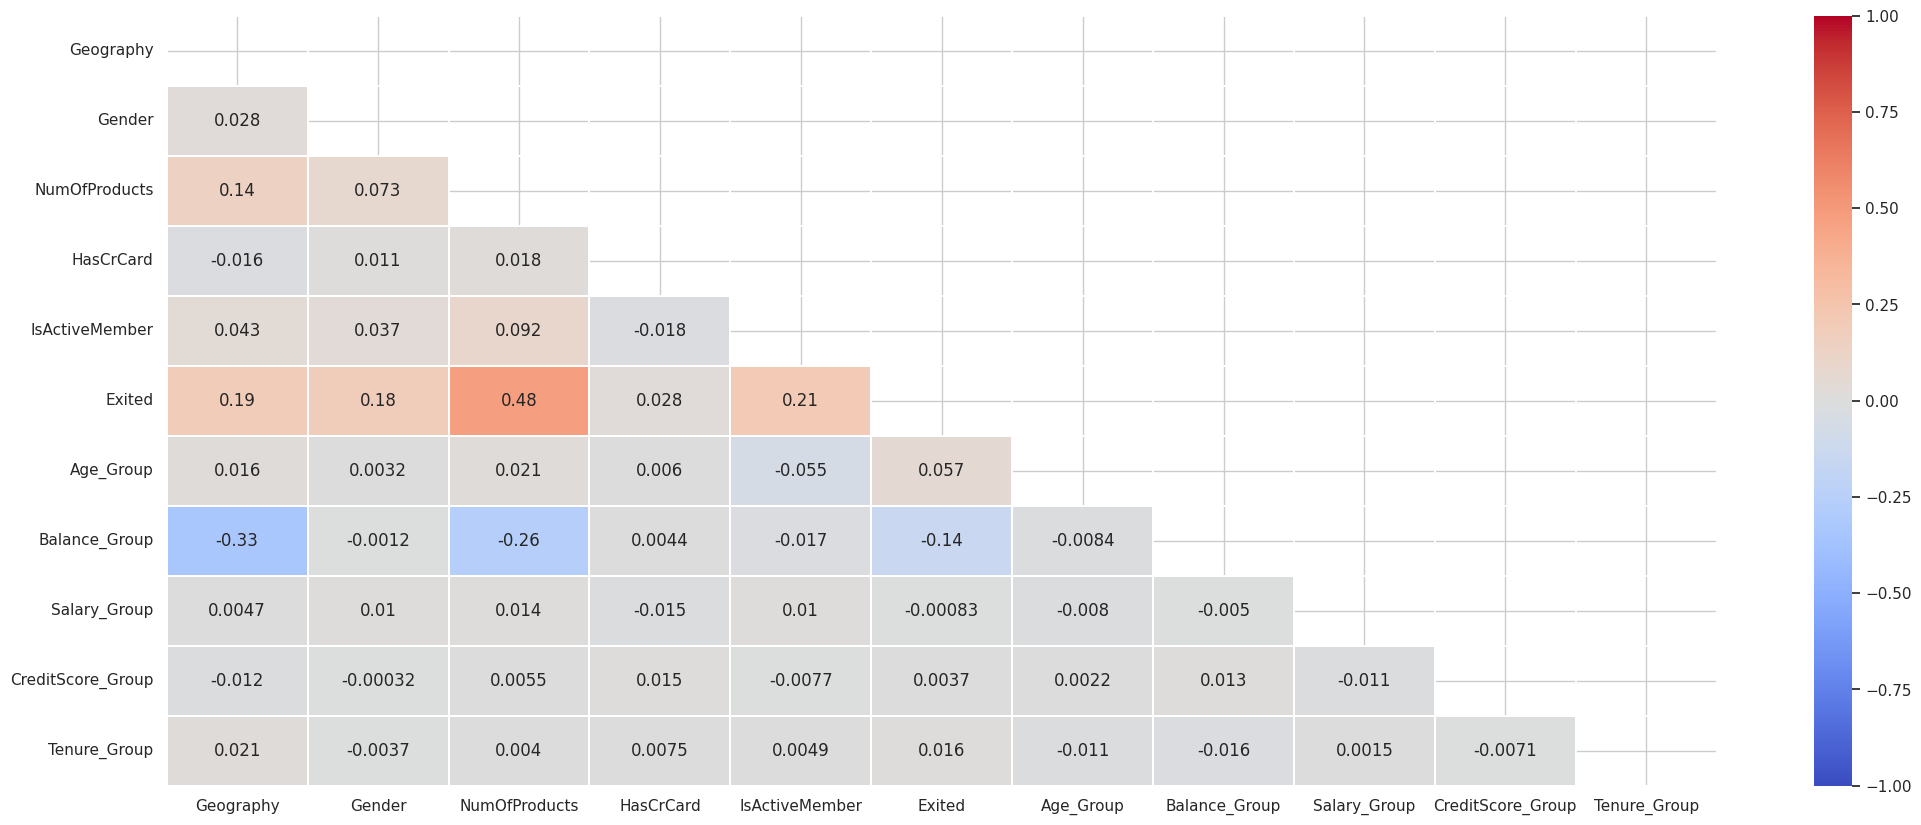

In [ ]:
plt.figure(figsize=(25, 10))

corr = dataset_train_binning.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

### **Only Using Catcode**

In [ ]:
dataset_train_catcode = dataset_train.copy()
dataset_train_catcode

CreditScore Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
0            754.0     Spain    Male  40.0     8.0  102954.68            2.0   
1            579.0    France  Female  28.0     1.0       0.00            2.0   
2            744.0    France  Female  56.0     5.0       0.00            1.0   
3            697.0    France    Male  29.0     2.0       0.00            2.0   
4            628.0    France  Female  22.0     9.0       0.00            2.0   
...            ...       ...     ...   ...     ...        ...            ...   
14995        667.0    France  Female  51.0     1.0       0.00            1.0   
14996        583.0     Spain    Male  54.0     6.0       0.00            2.0   
14997        684.0    France  Female  34.0     4.0       0.00            2.0   
14998        439.0   Germany    Male  39.0     8.0  107764.75            2.0   
14999        653.0    France    Male  41.0     4.0       0.00            1.0   

       HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0            1.0             1.0        149238.35     0.0  
1            1.0             0.0         64869.32     0.0  
2            1.0             0.0        158816.03     1.0  
3            1.0             0.0         55775.72     0.0  
4            1.0             0.0         49653.39     0.0  
...          ...             ...              ...     ...  
14995        0.0             0.0        129870.93     1.0  
14996        0.0             1.0        172033.57     1.0  
14997        0.0             1.0        131363.57     0.0  
14998        1.0             1.0        131710.59     0.0  
14999        1.0             0.0        148528.24     0.0  

[15000 rows x 11 columns]

In [ ]:
dataset_test_catcode = dataset_test.copy()
dataset_test_catcode

CreditScore Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
0           751.0    France  Female  38.0     3.0       0.00            2.0   
1           711.0   Germany  Female  43.0     2.0  143680.36            2.0   
2           592.0     Spain    Male  40.0     4.0       0.00            2.0   
3           676.0   Germany    Male  48.0     5.0  121629.22            1.0   
4           746.0    France    Male  36.0     5.0       0.00            2.0   
...           ...       ...     ...   ...     ...        ...            ...   
9995        743.0    France    Male  32.0    10.0       0.00            2.0   
9996        749.0    France    Male  45.0     8.0       0.00            2.0   
9997        769.0   Germany    Male  37.0     8.0   97514.07            1.0   
9998        792.0    France    Male  43.0     3.0  168883.08            1.0   
9999        663.0    France    Male  40.0     3.0       0.00            1.0   

      HasCrCard  IsActiveMember  EstimatedSalary  
0           1.0             0.0        145558.42  
1           1.0             1.0        118188.15  
2           1.0             1.0         36754.13  
3           1.0             0.0        122221.71  
4           1.0             1.0         97468.44  
...         ...             ...              ...  
9995        1.0             0.0        172782.69  
9996        1.0             0.0        163331.65  
9997        1.0             0.0         76637.38  
9998        1.0             1.0        152740.16  
9999        1.0             1.0         73371.65  

[10000 rows x 10 columns]

In [ ]:
categorical_cols = [
    "Gender", "Geography"
]

for col in categorical_cols:
    dataset_train_catcode[col] = dataset_train_catcode[col].astype('category').cat.codes

dataset_train_catcode

CreditScore  Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
0            754.0          2       1  40.0     8.0  102954.68            2.0   
1            579.0          0       0  28.0     1.0       0.00            2.0   
2            744.0          0       0  56.0     5.0       0.00            1.0   
3            697.0          0       1  29.0     2.0       0.00            2.0   
4            628.0          0       0  22.0     9.0       0.00            2.0   
...            ...        ...     ...   ...     ...        ...            ...   
14995        667.0          0       0  51.0     1.0       0.00            1.0   
14996        583.0          2       1  54.0     6.0       0.00            2.0   
14997        684.0          0       0  34.0     4.0       0.00            2.0   
14998        439.0          1       1  39.0     8.0  107764.75            2.0   
14999        653.0          0       1  41.0     4.0       0.00            1.0   

       HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0            1.0             1.0        149238.35     0.0  
1            1.0             0.0         64869.32     0.0  
2            1.0             0.0        158816.03     1.0  
3            1.0             0.0         55775.72     0.0  
4            1.0             0.0         49653.39     0.0  
...          ...             ...              ...     ...  
14995        0.0             0.0        129870.93     1.0  
14996        0.0             1.0        172033.57     1.0  
14997        0.0             1.0        131363.57     0.0  
14998        1.0             1.0        131710.59     0.0  
14999        1.0             0.0        148528.24     0.0  

[15000 rows x 11 columns]

In [ ]:
categorical_cols = [
    "Gender", "Geography"
]

for col in categorical_cols:
    dataset_test_catcode[col] = dataset_test_catcode[col].astype('category').cat.codes

dataset_test_catcode

CreditScore  Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
0           751.0          0       0  38.0     3.0       0.00            2.0   
1           711.0          1       0  43.0     2.0  143680.36            2.0   
2           592.0          2       1  40.0     4.0       0.00            2.0   
3           676.0          1       1  48.0     5.0  121629.22            1.0   
4           746.0          0       1  36.0     5.0       0.00            2.0   
...           ...        ...     ...   ...     ...        ...            ...   
9995        743.0          0       1  32.0    10.0       0.00            2.0   
9996        749.0          0       1  45.0     8.0       0.00            2.0   
9997        769.0          1       1  37.0     8.0   97514.07            1.0   
9998        792.0          0       1  43.0     3.0  168883.08            1.0   
9999        663.0          0       1  40.0     3.0       0.00            1.0   

      HasCrCard  IsActiveMember  EstimatedSalary  
0           1.0             0.0        145558.42  
1           1.0             1.0        118188.15  
2           1.0             1.0         36754.13  
3           1.0             0.0        122221.71  
4           1.0             1.0         97468.44  
...         ...             ...              ...  
9995        1.0             0.0        172782.69  
9996        1.0             0.0        163331.65  
9997        1.0             0.0         76637.38  
9998        1.0             1.0        152740.16  
9999        1.0             1.0         73371.65  

[10000 rows x 10 columns]

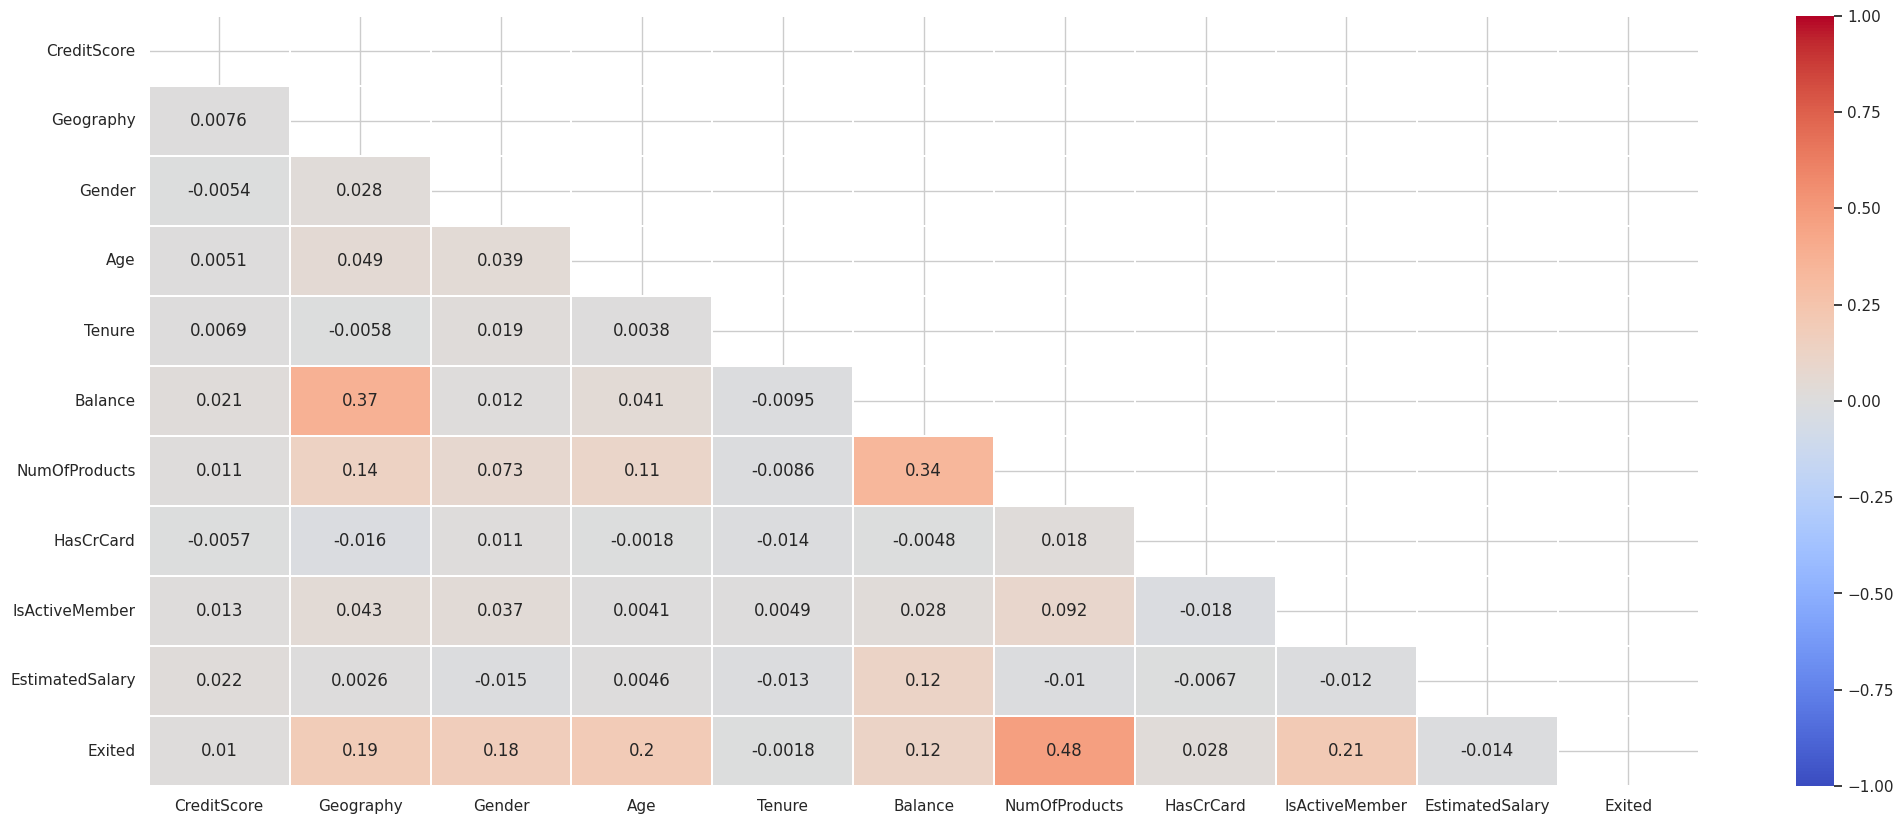

In [ ]:
plt.figure(figsize=(25, 10))

corr = dataset_train_catcode.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

### **Using Dummies**

In [ ]:
dataset_train_dummies = dataset_train.copy()
dataset_train_dummies

CreditScore Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
0            754.0     Spain    Male  40.0     8.0  102954.68            2.0   
1            579.0    France  Female  28.0     1.0       0.00            2.0   
2            744.0    France  Female  56.0     5.0       0.00            1.0   
3            697.0    France    Male  29.0     2.0       0.00            2.0   
4            628.0    France  Female  22.0     9.0       0.00            2.0   
...            ...       ...     ...   ...     ...        ...            ...   
14995        667.0    France  Female  51.0     1.0       0.00            1.0   
14996        583.0     Spain    Male  54.0     6.0       0.00            2.0   
14997        684.0    France  Female  34.0     4.0       0.00            2.0   
14998        439.0   Germany    Male  39.0     8.0  107764.75            2.0   
14999        653.0    France    Male  41.0     4.0       0.00            1.0   

       HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0            1.0             1.0        149238.35     0.0  
1            1.0             0.0         64869.32     0.0  
2            1.0             0.0        158816.03     1.0  
3            1.0             0.0         55775.72     0.0  
4            1.0             0.0         49653.39     0.0  
...          ...             ...              ...     ...  
14995        0.0             0.0        129870.93     1.0  
14996        0.0             1.0        172033.57     1.0  
14997        0.0             1.0        131363.57     0.0  
14998        1.0             1.0        131710.59     0.0  
14999        1.0             0.0        148528.24     0.0  

[15000 rows x 11 columns]

In [ ]:
dataset_test_dummies = dataset_test.copy()
dataset_test_dummies

CreditScore Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
0           751.0    France  Female  38.0     3.0       0.00            2.0   
1           711.0   Germany  Female  43.0     2.0  143680.36            2.0   
2           592.0     Spain    Male  40.0     4.0       0.00            2.0   
3           676.0   Germany    Male  48.0     5.0  121629.22            1.0   
4           746.0    France    Male  36.0     5.0       0.00            2.0   
...           ...       ...     ...   ...     ...        ...            ...   
9995        743.0    France    Male  32.0    10.0       0.00            2.0   
9996        749.0    France    Male  45.0     8.0       0.00            2.0   
9997        769.0   Germany    Male  37.0     8.0   97514.07            1.0   
9998        792.0    France    Male  43.0     3.0  168883.08            1.0   
9999        663.0    France    Male  40.0     3.0       0.00            1.0   

      HasCrCard  IsActiveMember  EstimatedSalary  
0           1.0             0.0        145558.42  
1           1.0             1.0        118188.15  
2           1.0             1.0         36754.13  
3           1.0             0.0        122221.71  
4           1.0             1.0         97468.44  
...         ...             ...              ...  
9995        1.0             0.0        172782.69  
9996        1.0             0.0        163331.65  
9997        1.0             0.0         76637.38  
9998        1.0             1.0        152740.16  
9999        1.0             1.0         73371.65  

[10000 rows x 10 columns]

In [ ]:
dataset_train_dummies = pd.get_dummies(dataset_train_dummies, drop_first=True)
dataset_train_dummies



CreditScore   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0            754.0  40.0     8.0  102954.68            2.0        1.0   
1            579.0  28.0     1.0       0.00            2.0        1.0   
2            744.0  56.0     5.0       0.00            1.0        1.0   
3            697.0  29.0     2.0       0.00            2.0        1.0   
4            628.0  22.0     9.0       0.00            2.0        1.0   
...            ...   ...     ...        ...            ...        ...   
14995        667.0  51.0     1.0       0.00            1.0        0.0   
14996        583.0  54.0     6.0       0.00            2.0        0.0   
14997        684.0  34.0     4.0       0.00            2.0        0.0   
14998        439.0  39.0     8.0  107764.75            2.0        1.0   
14999        653.0  41.0     4.0       0.00            1.0        1.0   

       IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0                 1.0        149238.35     0.0              False   
1                 0.0         64869.32     0.0              False   
2                 0.0        158816.03     1.0              False   
3                 0.0         55775.72     0.0              False   
4                 0.0         49653.39     0.0              False   
...               ...              ...     ...                ...   
14995             0.0        129870.93     1.0              False   
14996             1.0        172033.57     1.0              False   
14997             1.0        131363.57     0.0              False   
14998             1.0        131710.59     0.0               True   
14999             0.0        148528.24     0.0              False   

       Geography_Spain  Gender_Male  
0                 True         True  
1                False        False  
2                False        False  
3                False         True  
4                False        False  
...                ...          ...  
14995            False        False  
14996             True         True  
14997            False        False  
14998            False         True  
14999            False         True  

[15000 rows x 12 columns]

In [ ]:
dataset_test_dummies = pd.get_dummies(dataset_test_dummies, drop_first=True)
dataset_test_dummies


CreditScore   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0           751.0  38.0     3.0       0.00            2.0        1.0   
1           711.0  43.0     2.0  143680.36            2.0        1.0   
2           592.0  40.0     4.0       0.00            2.0        1.0   
3           676.0  48.0     5.0  121629.22            1.0        1.0   
4           746.0  36.0     5.0       0.00            2.0        1.0   
...           ...   ...     ...        ...            ...        ...   
9995        743.0  32.0    10.0       0.00            2.0        1.0   
9996        749.0  45.0     8.0       0.00            2.0        1.0   
9997        769.0  37.0     8.0   97514.07            1.0        1.0   
9998        792.0  43.0     3.0  168883.08            1.0        1.0   
9999        663.0  40.0     3.0       0.00            1.0        1.0   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
0                0.0        145558.42              False            False   
1                1.0        118188.15               True            False   
2                1.0         36754.13              False             True   
3                0.0        122221.71               True            False   
4                1.0         97468.44              False            False   
...              ...              ...                ...              ...   
9995             0.0        172782.69              False            False   
9996             0.0        163331.65              False            False   
9997             0.0         76637.38               True            False   
9998             1.0        152740.16              False            False   
9999             1.0         73371.65              False            False   

      Gender_Male  
0           False  
1           False  
2            True  
3            True  
4            True  
...           ...  
9995         True  
9996         True  
9997         True  
9998         True  
9999         True  

[10000 rows x 11 columns]

In [ ]:
cols_to_convert = ["Geography_Germany", "Geography_Spain", "Gender_Male"]
dataset_train_dummies[cols_to_convert] = dataset_train_dummies[cols_to_convert].astype(int)
dataset_train_dummies

CreditScore   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0            754.0  40.0     8.0  102954.68            2.0        1.0   
1            579.0  28.0     1.0       0.00            2.0        1.0   
2            744.0  56.0     5.0       0.00            1.0        1.0   
3            697.0  29.0     2.0       0.00            2.0        1.0   
4            628.0  22.0     9.0       0.00            2.0        1.0   
...            ...   ...     ...        ...            ...        ...   
14995        667.0  51.0     1.0       0.00            1.0        0.0   
14996        583.0  54.0     6.0       0.00            2.0        0.0   
14997        684.0  34.0     4.0       0.00            2.0        0.0   
14998        439.0  39.0     8.0  107764.75            2.0        1.0   
14999        653.0  41.0     4.0       0.00            1.0        1.0   

       IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0                 1.0        149238.35     0.0                  0   
1                 0.0         64869.32     0.0                  0   
2                 0.0        158816.03     1.0                  0   
3                 0.0         55775.72     0.0                  0   
4                 0.0         49653.39     0.0                  0   
...               ...              ...     ...                ...   
14995             0.0        129870.93     1.0                  0   
14996             1.0        172033.57     1.0                  0   
14997             1.0        131363.57     0.0                  0   
14998             1.0        131710.59     0.0                  1   
14999             0.0        148528.24     0.0                  0   

       Geography_Spain  Gender_Male  
0                    1            1  
1                    0            0  
2                    0            0  
3                    0            1  
4                    0            0  
...                ...          ...  
14995                0            0  
14996                1            1  
14997                0            0  
14998                0            1  
14999                0            1  

[15000 rows x 12 columns]

In [ ]:
cols_to_convert = ["Geography_Germany", "Geography_Spain", "Gender_Male"]
dataset_test_dummies[cols_to_convert] = dataset_test_dummies[cols_to_convert].astype(int)
dataset_test_dummies

CreditScore   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0           751.0  38.0     3.0       0.00            2.0        1.0   
1           711.0  43.0     2.0  143680.36            2.0        1.0   
2           592.0  40.0     4.0       0.00            2.0        1.0   
3           676.0  48.0     5.0  121629.22            1.0        1.0   
4           746.0  36.0     5.0       0.00            2.0        1.0   
...           ...   ...     ...        ...            ...        ...   
9995        743.0  32.0    10.0       0.00            2.0        1.0   
9996        749.0  45.0     8.0       0.00            2.0        1.0   
9997        769.0  37.0     8.0   97514.07            1.0        1.0   
9998        792.0  43.0     3.0  168883.08            1.0        1.0   
9999        663.0  40.0     3.0       0.00            1.0        1.0   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
0                0.0        145558.42                  0                0   
1                1.0        118188.15                  1                0   
2                1.0         36754.13                  0                1   
3                0.0        122221.71                  1                0   
4                1.0         97468.44                  0                0   
...              ...              ...                ...              ...   
9995             0.0        172782.69                  0                0   
9996             0.0        163331.65                  0                0   
9997             0.0         76637.38                  1                0   
9998             1.0        152740.16                  0                0   
9999             1.0         73371.65                  0                0   

      Gender_Male  
0               0  
1               0  
2               1  
3               1  
4               1  
...           ...  
9995            1  
9996            1  
9997            1  
9998            1  
9999            1  

[10000 rows x 11 columns]

### **Data Resampling + Catcode**

In [ ]:
dataset_train_add_remove = dataset_train.copy()
dataset_train_add_remove

CreditScore Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
0            754.0     Spain    Male  40.0     8.0  102954.68            2.0   
1            579.0    France  Female  28.0     1.0       0.00            2.0   
2            744.0    France  Female  56.0     5.0       0.00            1.0   
3            697.0    France    Male  29.0     2.0       0.00            2.0   
4            628.0    France  Female  22.0     9.0       0.00            2.0   
...            ...       ...     ...   ...     ...        ...            ...   
14995        667.0    France  Female  51.0     1.0       0.00            1.0   
14996        583.0     Spain    Male  54.0     6.0       0.00            2.0   
14997        684.0    France  Female  34.0     4.0       0.00            2.0   
14998        439.0   Germany    Male  39.0     8.0  107764.75            2.0   
14999        653.0    France    Male  41.0     4.0       0.00            1.0   

       HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0            1.0             1.0        149238.35     0.0  
1            1.0             0.0         64869.32     0.0  
2            1.0             0.0        158816.03     1.0  
3            1.0             0.0         55775.72     0.0  
4            1.0             0.0         49653.39     0.0  
...          ...             ...              ...     ...  
14995        0.0             0.0        129870.93     1.0  
14996        0.0             1.0        172033.57     1.0  
14997        0.0             1.0        131363.57     0.0  
14998        1.0             1.0        131710.59     0.0  
14999        1.0             0.0        148528.24     0.0  

[15000 rows x 11 columns]

In [ ]:
dataset_test_add_remove = dataset_test.copy()
dataset_test_add_remove

CreditScore Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
0           751.0    France  Female  38.0     3.0       0.00            2.0   
1           711.0   Germany  Female  43.0     2.0  143680.36            2.0   
2           592.0     Spain    Male  40.0     4.0       0.00            2.0   
3           676.0   Germany    Male  48.0     5.0  121629.22            1.0   
4           746.0    France    Male  36.0     5.0       0.00            2.0   
...           ...       ...     ...   ...     ...        ...            ...   
9995        743.0    France    Male  32.0    10.0       0.00            2.0   
9996        749.0    France    Male  45.0     8.0       0.00            2.0   
9997        769.0   Germany    Male  37.0     8.0   97514.07            1.0   
9998        792.0    France    Male  43.0     3.0  168883.08            1.0   
9999        663.0    France    Male  40.0     3.0       0.00            1.0   

      HasCrCard  IsActiveMember  EstimatedSalary  
0           1.0             0.0        145558.42  
1           1.0             1.0        118188.15  
2           1.0             1.0         36754.13  
3           1.0             0.0        122221.71  
4           1.0             1.0         97468.44  
...         ...             ...              ...  
9995        1.0             0.0        172782.69  
9996        1.0             0.0        163331.65  
9997        1.0             0.0         76637.38  
9998        1.0             1.0        152740.16  
9999        1.0             1.0         73371.65  

[10000 rows x 10 columns]

In [ ]:
# 1. Separate the dataset based on the 'Exited' value (class 1 and class 0)
df_1 = dataset_train_add_remove[dataset_train_add_remove['Exited'] == 1]
df_0 = dataset_train_add_remove[dataset_train_add_remove['Exited'] == 0]

# 2. Randomly sample 50% of the rows where Exited = 0 (Undersampling the majority class)
df_0_reduced = df_0.sample(frac=0.5, random_state=96)

# 3. Concatenate the churned group (df_1) with the reduced non-churned group (df_0_reduced)
dataset_train_add_remove = pd.concat([df_1, df_0_reduced], axis=0).sample(frac=1, random_state=96).reset_index(drop=True)

print("Class proportions after reducing Exited=0:")
print(dataset_train_add_remove['Exited'].value_counts(normalize=True))

dataset_train_add_remove

Class proportions after reducing Exited=0:
Exited
0.0    0.661314
1.0    0.338686
Name: proportion, dtype: float64


CreditScore Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
0           559.0    France  Female  39.0     4.0       0.00            1.0   
1           703.0    France    Male  34.0     7.0       0.00            2.0   
2           705.0   Germany    Male  43.0     1.0  117707.18            2.0   
3           721.0    France  Female  45.0     2.0       0.00            3.0   
4           615.0   Germany    Male  41.0    10.0  114493.48            1.0   
...           ...       ...     ...   ...     ...        ...            ...   
9024        705.0    France  Female  45.0    10.0       0.00            2.0   
9025        646.0    France  Female  44.0     7.0       0.00            2.0   
9026        692.0   Germany  Female  26.0     6.0  123761.68            2.0   
9027        573.0    France    Male  38.0     1.0  125385.01            1.0   
9028        559.0    France    Male  57.0     9.0       0.00            1.0   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0           0.0             0.0          9149.96     0.0  
1           1.0             0.0         10063.75     0.0  
2           0.0             0.0         53511.78     0.0  
3           1.0             1.0         99444.02     1.0  
4           1.0             0.0        158616.81     1.0  
...         ...             ...              ...     ...  
9024        0.0             0.0        131764.51     1.0  
9025        1.0             0.0        142838.64     1.0  
9026        1.0             1.0        142911.99     0.0  
9027        0.0             0.0         16081.62     0.0  
9028        1.0             1.0        160810.85     1.0  

[9029 rows x 11 columns]

In [ ]:
# 1. Convert specified columns in the training set to category type
dataset_train_add_remove['Geography'] = dataset_train_add_remove['Geography'].astype('category')
dataset_train_add_remove['Gender'] = dataset_train_add_remove['Gender'].astype('category')

# 2. Store the learned categories from the training set
geo_categories = dataset_train_add_remove['Geography'].cat.categories
gender_categories = dataset_train_add_remove['Gender'].cat.categories

# 3. Apply the learned categories (in the same order) to the test set
dataset_test_add_remove['Geography'] = pd.Categorical(
    dataset_test_add_remove['Geography'], categories=geo_categories)
dataset_test_add_remove['Gender'] = pd.Categorical(
    dataset_test_add_remove['Gender'], categories=gender_categories)

# 4. Apply label encoding (.cat.codes) to both train and test sets
dataset_train_add_remove['Geography'] = dataset_train_add_remove['Geography'].cat.codes
dataset_train_add_remove['Gender'] = dataset_train_add_remove['Gender'].cat.codes

dataset_test_add_remove['Geography'] = dataset_test_add_remove['Geography'].cat.codes
dataset_test_add_remove['Gender'] = dataset_test_add_remove['Gender'].cat.codes

dataset_test_add_remove

CreditScore  Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
0           751.0          0       0  38.0     3.0       0.00            2.0   
1           711.0          1       0  43.0     2.0  143680.36            2.0   
2           592.0          2       1  40.0     4.0       0.00            2.0   
3           676.0          1       1  48.0     5.0  121629.22            1.0   
4           746.0          0       1  36.0     5.0       0.00            2.0   
...           ...        ...     ...   ...     ...        ...            ...   
9995        743.0          0       1  32.0    10.0       0.00            2.0   
9996        749.0          0       1  45.0     8.0       0.00            2.0   
9997        769.0          1       1  37.0     8.0   97514.07            1.0   
9998        792.0          0       1  43.0     3.0  168883.08            1.0   
9999        663.0          0       1  40.0     3.0       0.00            1.0   

      HasCrCard  IsActiveMember  EstimatedSalary  
0           1.0             0.0        145558.42  
1           1.0             1.0        118188.15  
2           1.0             1.0         36754.13  
3           1.0             0.0        122221.71  
4           1.0             1.0         97468.44  
...         ...             ...              ...  
9995        1.0             0.0        172782.69  
9996        1.0             0.0        163331.65  
9997        1.0             0.0         76637.38  
9998        1.0             1.0        152740.16  
9999        1.0             1.0         73371.65  

[10000 rows x 10 columns]

In [ ]:
dataset_train_add_remove

CreditScore  Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
0           559.0          0       0  39.0     4.0       0.00            1.0   
1           703.0          0       1  34.0     7.0       0.00            2.0   
2           705.0          1       1  43.0     1.0  117707.18            2.0   
3           721.0          0       0  45.0     2.0       0.00            3.0   
4           615.0          1       1  41.0    10.0  114493.48            1.0   
...           ...        ...     ...   ...     ...        ...            ...   
9024        705.0          0       0  45.0    10.0       0.00            2.0   
9025        646.0          0       0  44.0     7.0       0.00            2.0   
9026        692.0          1       0  26.0     6.0  123761.68            2.0   
9027        573.0          0       1  38.0     1.0  125385.01            1.0   
9028        559.0          0       1  57.0     9.0       0.00            1.0   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0           0.0             0.0          9149.96     0.0  
1           1.0             0.0         10063.75     0.0  
2           0.0             0.0         53511.78     0.0  
3           1.0             1.0         99444.02     1.0  
4           1.0             0.0        158616.81     1.0  
...         ...             ...              ...     ...  
9024        0.0             0.0        131764.51     1.0  
9025        1.0             0.0        142838.64     1.0  
9026        1.0             1.0        142911.99     0.0  
9027        0.0             0.0         16081.62     0.0  
9028        1.0             1.0        160810.85     1.0  

[9029 rows x 11 columns]

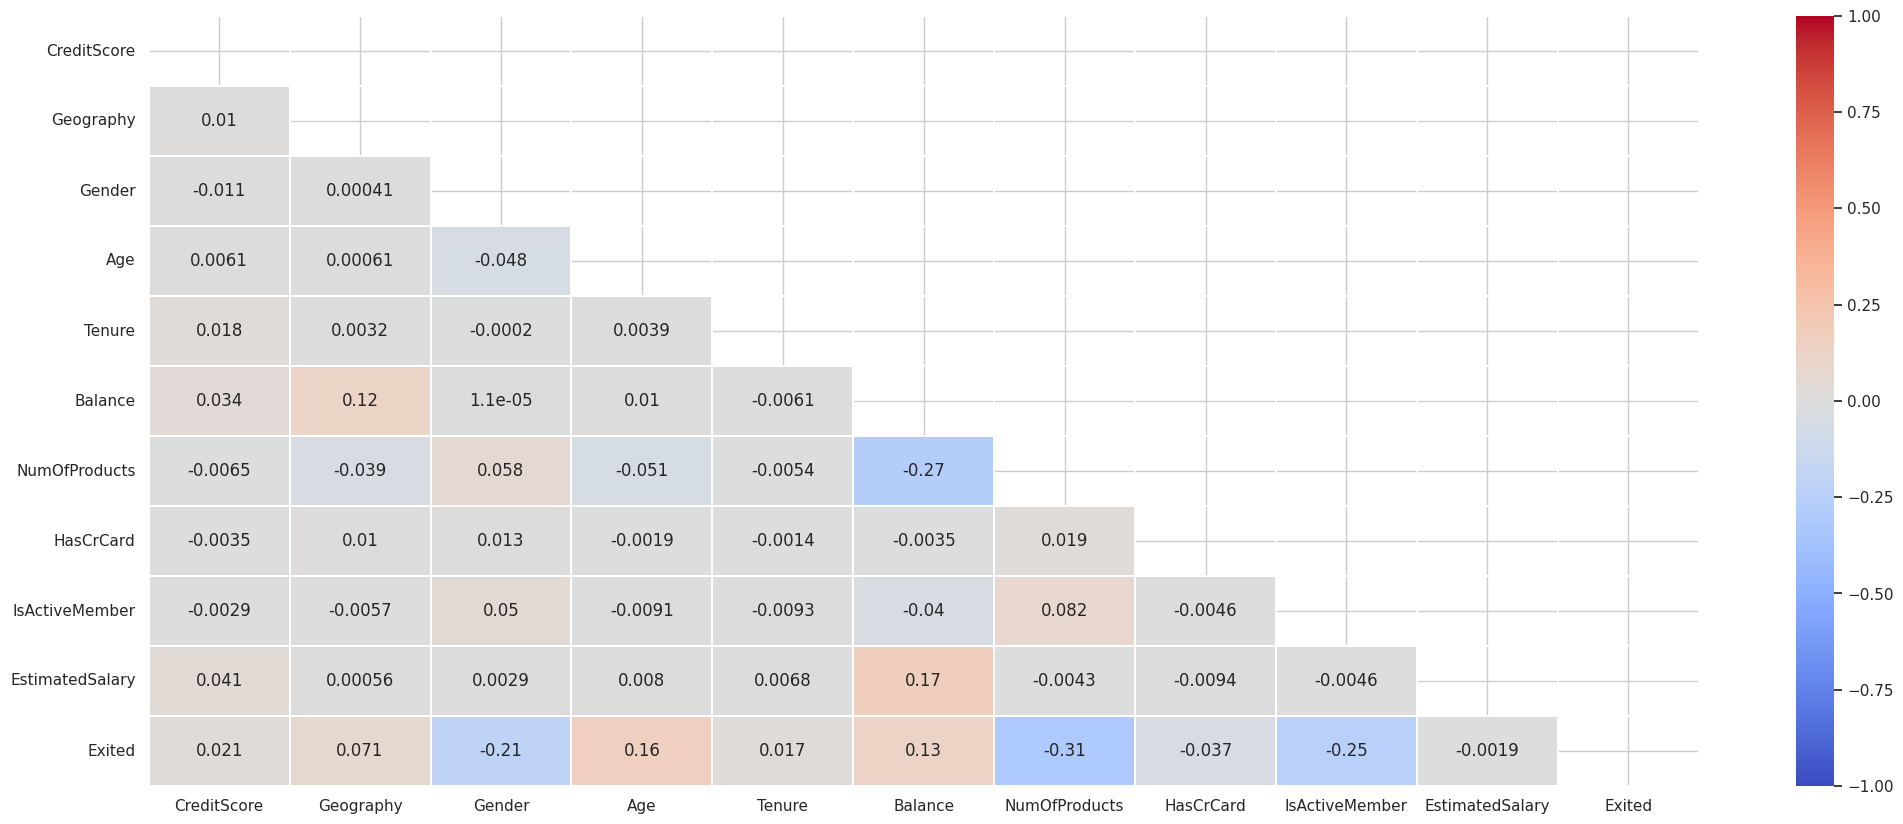

In [ ]:
plt.figure(figsize=(25, 10))

corr = dataset_train_add_remove.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

## **Data Standardization / Normalization**

In [ ]:
import os
import joblib

SCALER_SAVE_DIR = "saved_scalers"
os.makedirs(SCALER_SAVE_DIR, exist_ok=True)
print(f"Directory '{SCALER_SAVE_DIR}' ensured.")

Directory 'saved_scalers' ensured.


### **Min-Max Scaler**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

print("\n--- Processing MinMaxScaler ---")
datasets_minmax = {
    "dummies": dataset_train_dummies.copy(),
    "binning": dataset_train_binning.copy(),
    "catcode": dataset_train_catcode.copy(),
    "add_remove": dataset_train_add_remove.copy()
}

scaled_minmax_results = {}
scalers_minmax = {}

print("Starting MinMaxScaler loop...")
for name, df in datasets_minmax.items():
    print(f"\n[MinMaxScaler] - Processing dataset: {name}")
    if 'Exited' in df.columns:
        X = df.drop('Exited', axis=1)
        y = df['Exited']
        feature_names = X.columns
    else:
        X = df
        y = None
        feature_names = X.columns

    scaler = MinMaxScaler()
    print(f"  Fitting MinMaxScaler on X shape: {X.shape}")
    X_scaled = scaler.fit_transform(X) # Fit scaler
    print(f"  Finished fitting. Scaled X shape: {X_scaled.shape}")

    scaled_minmax_results[name] = (X_scaled, y, feature_names)
    scalers_minmax[name] = scaler

    print(f"  Stored scaled data and scaler for '{name}' (MinMax)")

print("Finished MinMaxScaler loop.")

print("\n--- Saving fitted MinMaxScaler objects ---")
for name, fitted_scaler in scalers_minmax.items():
    try:
        scaler_filename = os.path.join(SCALER_SAVE_DIR, f"scaler_minmax_{name}.pkl")
        joblib.dump(fitted_scaler, scaler_filename)
        print(f"  Successfully saved MinMaxScaler for '{name}' to '{scaler_filename}'")
    except Exception as e:
        print(f"  [ERROR] Failed to save MinMaxScaler for '{name}': {e}")


--- Processing MinMaxScaler ---
Starting MinMaxScaler loop...

[MinMaxScaler] - Processing dataset: dummies
  Fitting MinMaxScaler on X shape: (15000, 11)
  Finished fitting. Scaled X shape: (15000, 11)
  Stored scaled data and scaler for 'dummies' (MinMax)

[MinMaxScaler] - Processing dataset: binning
  Fitting MinMaxScaler on X shape: (15000, 10)
  Finished fitting. Scaled X shape: (15000, 10)
  Stored scaled data and scaler for 'binning' (MinMax)

[MinMaxScaler] - Processing dataset: catcode
  Fitting MinMaxScaler on X shape: (15000, 10)
  Finished fitting. Scaled X shape: (15000, 10)
  Stored scaled data and scaler for 'catcode' (MinMax)

[MinMaxScaler] - Processing dataset: add_remove
  Fitting MinMaxScaler on X shape: (9029, 10)
  Finished fitting. Scaled X shape: (9029, 10)
  Stored scaled data and scaler for 'add_remove' (MinMax)
Finished MinMaxScaler loop.

--- Saving fitted MinMaxScaler objects ---
  Successfully saved MinMaxScaler for 'dummies' to 'saved_scalers/scaler_minm

### **Standard Normalize**

In [ ]:
from sklearn.preprocessing import StandardScaler

print("\n--- Processing StandardScaler ---")
# List data need StandardScaler
datasets_std = {
    "dummies": dataset_train_dummies.copy(),
    "binning": dataset_train_binning.copy(),
    "catcode": dataset_train_catcode.copy(),
    "add_remove": dataset_train_add_remove.copy()
}

scaled_std_results = {}
scalers_std = {}

print("Starting StandardScaler loop...")
for name, df in datasets_std.items():
    print(f"\n[StandardScaler] - Processing dataset: {name}")
    if 'Exited' in df.columns:
        X = df.drop('Exited', axis=1)
        y = df['Exited']
        feature_names = X.columns
    else:
        X = df
        y = None
        feature_names = X.columns

    scaler = StandardScaler()
    print(f"  Fitting StandardScaler on X shape: {X.shape}")
    X_scaled = scaler.fit_transform(X) # Fit scaler
    print(f"  Finished fitting. Scaled X shape: {X_scaled.shape}")

    scaled_std_results[name] = (X_scaled, y, feature_names)
    scalers_std[name] = scaler

    print(f"  Stored scaled data and scaler for '{name}' (Standard)")

print("Finished StandardScaler loop.")

print("\n--- Saving fitted StandardScaler objects ---")
for name, fitted_scaler in scalers_std.items():
    try:
        scaler_filename = os.path.join(SCALER_SAVE_DIR, f"scaler_standard_{name}.pkl")
        joblib.dump(fitted_scaler, scaler_filename)
        print(f"  Successfully saved StandardScaler for '{name}' to '{scaler_filename}'")
    except Exception as e:
        print(f"  [ERROR] Failed to save StandardScaler for '{name}': {e}")


--- Processing StandardScaler ---
Starting StandardScaler loop...

[StandardScaler] - Processing dataset: dummies
  Fitting StandardScaler on X shape: (15000, 11)
  Finished fitting. Scaled X shape: (15000, 11)
  Stored scaled data and scaler for 'dummies' (Standard)

[StandardScaler] - Processing dataset: binning
  Fitting StandardScaler on X shape: (15000, 10)
  Finished fitting. Scaled X shape: (15000, 10)
  Stored scaled data and scaler for 'binning' (Standard)

[StandardScaler] - Processing dataset: catcode
  Fitting StandardScaler on X shape: (15000, 10)
  Finished fitting. Scaled X shape: (15000, 10)
  Stored scaled data and scaler for 'catcode' (Standard)

[StandardScaler] - Processing dataset: add_remove
  Fitting StandardScaler on X shape: (9029, 10)
  Finished fitting. Scaled X shape: (9029, 10)
  Stored scaled data and scaler for 'add_remove' (Standard)
Finished StandardScaler loop.

--- Saving fitted StandardScaler objects ---
  Successfully saved StandardScaler for 'dumm

# **4) Modeling**

In [ ]:
!pip install optuna

In [ ]:
!pip install lightgbm catboost



🔎 Evaluating Dataset Version: MinMax - Dummies

--- Evaluating Model: Logistic Regression ---

  Fold 1 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9397    0.8418    0.8881      2389
         1.0     0.5605    0.7889    0.6553       611

    accuracy                         0.8310      3000
   macro avg     0.7501    0.8153    0.7717      3000
weighted avg     0.8625    0.8310    0.8407      3000


  Fold 2 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9417    0.8313    0.8831      2389
         1.0     0.5477    0.7987    0.6498       611

    accuracy                         0.8247      3000
   macro avg     0.7447    0.8150    0.7664      3000
weighted avg     0.8614    0.8247    0.8356      3000


  Fold 3 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9476    0.8333    0.8868      2388
         1.0     0.5578    0.8203    0.664

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[13:57:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.





  Fold 1 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9117    0.9468    0.9290      2389
         1.0     0.7553    0.6416    0.6938       611

    accuracy                         0.8847      3000
   macro avg     0.8335    0.7942    0.8114      3000
weighted avg     0.8799    0.8847    0.8811      3000



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[13:57:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.





  Fold 2 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9201    0.9502    0.9349      2389
         1.0     0.7767    0.6776    0.7238       611

    accuracy                         0.8947      3000
   macro avg     0.8484    0.8139    0.8294      3000
weighted avg     0.8909    0.8947    0.8919      3000



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[13:57:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.





  Fold 3 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9245    0.9489    0.9366      2388
         1.0     0.7778    0.6977    0.7356       612

    accuracy                         0.8977      3000
   macro avg     0.8511    0.8233    0.8361      3000
weighted avg     0.8946    0.8977    0.8956      3000



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[13:57:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.





  Fold 4 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9143    0.9518    0.9327      2388
         1.0     0.7763    0.6520    0.7087       612

    accuracy                         0.8907      3000
   macro avg     0.8453    0.8019    0.8207      3000
weighted avg     0.8862    0.8907    0.8870      3000



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[13:57:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.





  Fold 5 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9214    0.9426    0.9319      2388
         1.0     0.7540    0.6863    0.7186       612

    accuracy                         0.8903      3000
   macro avg     0.8377    0.8145    0.8252      3000
weighted avg     0.8873    0.8903    0.8884      3000


--- Evaluating Model: LightGBM ---
[LightGBM] [Info] Number of positive: 2447, number of negative: 9553
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001045 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203917 -> initscore=-1.361992
[LightGBM] [Info] Start training from score -1.361992


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.




  Fold 1 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9177    0.9527    0.9349      2389
         1.0     0.7827    0.6661    0.7197       611

    accuracy                         0.8943      3000
   macro avg     0.8502    0.8094    0.8273      3000
weighted avg     0.8902    0.8943    0.8911      3000

[LightGBM] [Info] Number of positive: 2447, number of negative: 9553
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001114 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 839
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203917 -> initscore=-1.361992
[LightGBM] [Info] Start training from score -1.361992


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.




  Fold 2 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9261    0.9602    0.9429      2389
         1.0     0.8184    0.7005    0.7549       611

    accuracy                         0.9073      3000
   macro avg     0.8722    0.8304    0.8489      3000
weighted avg     0.9042    0.9073    0.9046      3000

[LightGBM] [Info] Number of positive: 2446, number of negative: 9554
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001346 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 838
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203833 -> initscore=-1.362506
[LightGBM] [Info] Start training from score -1.362506


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.




  Fold 3 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9263    0.9527    0.9393      2388
         1.0     0.7923    0.7042    0.7457       612

    accuracy                         0.9020      3000
   macro avg     0.8593    0.8285    0.8425      3000
weighted avg     0.8990    0.9020    0.8998      3000

[LightGBM] [Info] Number of positive: 2446, number of negative: 9554
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001038 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203833 -> initscore=-1.362506
[LightGBM] [Info] Start training from score -1.362506


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.




  Fold 4 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9138    0.9585    0.9356      2388
         1.0     0.8000    0.6471    0.7154       612

    accuracy                         0.8950      3000
   macro avg     0.8569    0.8028    0.8255      3000
weighted avg     0.8906    0.8950    0.8907      3000

[LightGBM] [Info] Number of positive: 2446, number of negative: 9554
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001105 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203833 -> initscore=-1.362506
[LightGBM] [Info] Start training from score -1.362506


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.




  Fold 5 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9259    0.9523    0.9389      2388
         1.0     0.7904    0.7026    0.7439       612

    accuracy                         0.9013      3000
   macro avg     0.8582    0.8274    0.8414      3000
weighted avg     0.8983    0.9013    0.8991      3000


--- Evaluating Model: CatBoost ---

  Fold 1 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9131    0.9590    0.9355      2389
         1.0     0.8004    0.6432    0.7132       611

    accuracy                         0.8947      3000
   macro avg     0.8568    0.8011    0.8244      3000
weighted avg     0.8902    0.8947    0.8902      3000


  Fold 2 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9209    0.9598    0.9399      2389
         1.0     0.8118    0.6776    0.7386       611

    accuracy                         0.9023    

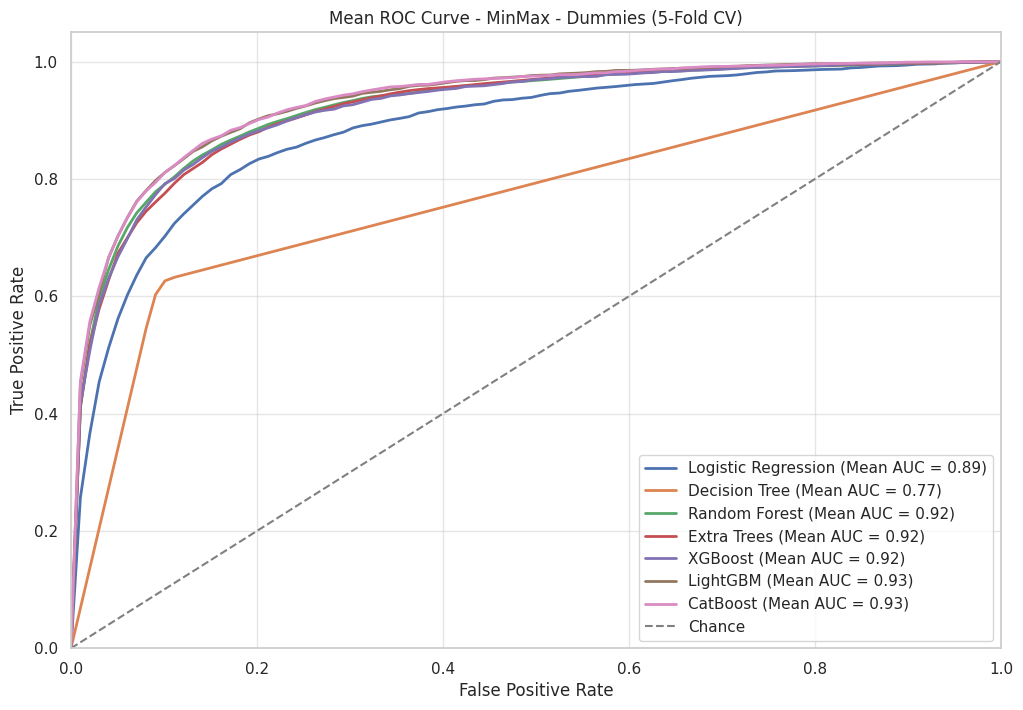



🔎 Evaluating Dataset Version: MinMax - Binning

--- Evaluating Model: Logistic Regression ---

  Fold 1 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9362    0.7865    0.8549      2389
         1.0     0.4864    0.7905    0.6022       611

    accuracy                         0.7873      3000
   macro avg     0.7113    0.7885    0.7286      3000
weighted avg     0.8446    0.7873    0.8034      3000


  Fold 2 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9303    0.7652    0.8397      2389
         1.0     0.4580    0.7758    0.5759       611

    accuracy                         0.7673      3000
   macro avg     0.6941    0.7705    0.7078      3000
weighted avg     0.8341    0.7673    0.7860      3000


  Fold 3 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9420    0.7684    0.8464      2388
         1.0     0.4743    0.8154    0.599

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[13:58:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.





  Fold 1 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9170    0.9439    0.9303      2389
         1.0     0.7523    0.6661    0.7066       611

    accuracy                         0.8873      3000
   macro avg     0.8347    0.8050    0.8184      3000
weighted avg     0.8835    0.8873    0.8847      3000



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[13:58:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[13:58:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.





  Fold 2 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9099    0.9473    0.9282      2389
         1.0     0.7544    0.6334    0.6886       611

    accuracy                         0.8833      3000
   macro avg     0.8322    0.7903    0.8084      3000
weighted avg     0.8783    0.8833    0.8794      3000


  Fold 3 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9233    0.9422    0.9326      2388
         1.0     0.7549    0.6944    0.7234       612

    accuracy                         0.8917      3000
   macro avg     0.8391    0.8183    0.8280      3000
weighted avg     0.8889    0.8917    0.8900      3000



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[13:58:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[13:58:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.





  Fold 4 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9033    0.9464    0.9243      2388
         1.0     0.7430    0.6046    0.6667       612

    accuracy                         0.8767      3000
   macro avg     0.8231    0.7755    0.7955      3000
weighted avg     0.8706    0.8767    0.8718      3000


  Fold 5 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9152    0.9447    0.9297      2388
         1.0     0.7533    0.6585    0.7027       612

    accuracy                         0.8863      3000
   macro avg     0.8342    0.8016    0.8162      3000
weighted avg     0.8822    0.8863    0.8834      3000


--- Evaluating Model: LightGBM ---
[LightGBM] [Info] Number of positive: 2447, number of negative: 9553
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Info] Number of positive: 2447, number of negative: 9553
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 32
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203917 -> initscore=-1.361992
[LightGBM] [Info] Start training from score -1.361992

  Fold 2 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9132    0.9514    0.9319      2389
         1.0     0.7730    0.6465    0.7041       611

    accuracy                         0.8893      3000
   macro avg     0.8431    0.7990    0.8180      3000
weighted avg     0.8847    0.8893    0.8855      3000

[LightGBM] [Info] Number of positive: 2446, number of negative: 9554
[LightGBM] [Info]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.




  Fold 3 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9265    0.9497    0.9380      2388
         1.0     0.7826    0.7059    0.7423       612

    accuracy                         0.9000      3000
   macro avg     0.8545    0.8278    0.8401      3000
weighted avg     0.8971    0.9000    0.8980      3000

[LightGBM] [Info] Number of positive: 2446, number of negative: 9554
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001137 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 32
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203833 -> initscore=-1.362506
[LightGBM] [Info] Start training from score -1.362506


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.




  Fold 4 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9051    0.9464    0.9253      2388
         1.0     0.7455    0.6127    0.6726       612

    accuracy                         0.8783      3000
   macro avg     0.8253    0.7796    0.7990      3000
weighted avg     0.8725    0.8783    0.8737      3000

[LightGBM] [Info] Number of positive: 2446, number of negative: 9554
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 32
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203833 -> initscore=-1.362506
[LightGBM] [Info] Start training from score -1.362506


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.




  Fold 5 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9182    0.9497    0.9337      2388
         1.0     0.7736    0.6699    0.7180       612

    accuracy                         0.8927      3000
   macro avg     0.8459    0.8098    0.8259      3000
weighted avg     0.8887    0.8927    0.8897      3000


--- Evaluating Model: CatBoost ---

  Fold 1 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9168    0.9452    0.9308      2389
         1.0     0.7561    0.6645    0.7073       611

    accuracy                         0.8880      3000
   macro avg     0.8364    0.8048    0.8190      3000
weighted avg     0.8840    0.8880    0.8852      3000


  Fold 2 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9132    0.9510    0.9317      2389
         1.0     0.7715    0.6465    0.7035       611

    accuracy                         0.8890    

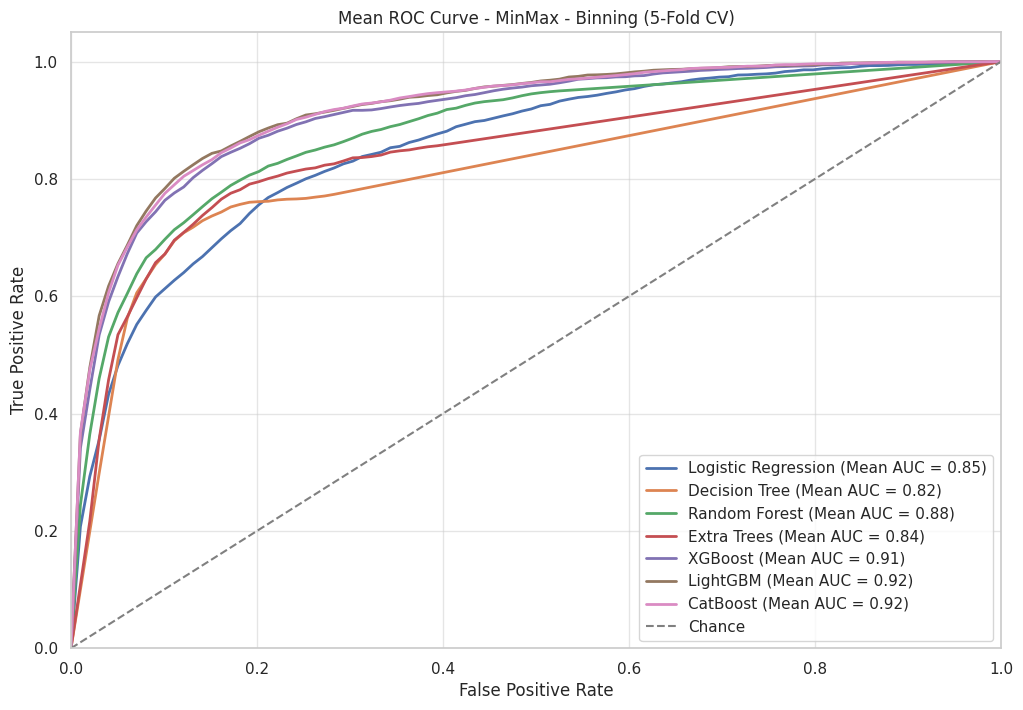



🔎 Evaluating Dataset Version: MinMax - Catcode

--- Evaluating Model: Logistic Regression ---

  Fold 1 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9329    0.8326    0.8799      2389
         1.0     0.5392    0.7660    0.6329       611

    accuracy                         0.8190      3000
   macro avg     0.7360    0.7993    0.7564      3000
weighted avg     0.8527    0.8190    0.8296      3000


  Fold 2 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9412    0.8112    0.8714      2389
         1.0     0.5207    0.8020    0.6314       611

    accuracy                         0.8093      3000
   macro avg     0.7310    0.8066    0.7514      3000
weighted avg     0.8556    0.8093    0.8225      3000


  Fold 3 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9478    0.8137    0.8756      2388
         1.0     0.5316    0.8252    0.646

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[13:58:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.





  Fold 1 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9116    0.9502    0.9305      2389
         1.0     0.7667    0.6399    0.6976       611

    accuracy                         0.8870      3000
   macro avg     0.8392    0.7951    0.8141      3000
weighted avg     0.8821    0.8870    0.8831      3000



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[13:58:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.





  Fold 2 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9195    0.9514    0.9352      2389
         1.0     0.7803    0.6743    0.7234       611

    accuracy                         0.8950      3000
   macro avg     0.8499    0.8129    0.8293      3000
weighted avg     0.8911    0.8950    0.8921      3000



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[13:58:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.





  Fold 3 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9273    0.9506    0.9388      2388
         1.0     0.7862    0.7092    0.7457       612

    accuracy                         0.9013      3000
   macro avg     0.8568    0.8299    0.8422      3000
weighted avg     0.8985    0.9013    0.8994      3000



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[13:58:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.





  Fold 4 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9162    0.9523    0.9339      2388
         1.0     0.7799    0.6601    0.7150       612

    accuracy                         0.8927      3000
   macro avg     0.8481    0.8062    0.8245      3000
weighted avg     0.8884    0.8927    0.8892      3000



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[13:58:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.





  Fold 5 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9210    0.9422    0.9315      2388
         1.0     0.7522    0.6846    0.7169       612

    accuracy                         0.8897      3000
   macro avg     0.8366    0.8134    0.8242      3000
weighted avg     0.8866    0.8897    0.8877      3000


--- Evaluating Model: LightGBM ---
[LightGBM] [Info] Number of positive: 2447, number of negative: 9553
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001059 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 835
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203917 -> initscore=-1.361992
[LightGBM] [Info] Start training from score -1.361992


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.




  Fold 1 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9168    0.9548    0.9354      2389
         1.0     0.7891    0.6612    0.7195       611

    accuracy                         0.8950      3000
   macro avg     0.8529    0.8080    0.8275      3000
weighted avg     0.8908    0.8950    0.8914      3000

[LightGBM] [Info] Number of positive: 2447, number of negative: 9553
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001005 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 838
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203917 -> initscore=-1.361992
[LightGBM] [Info] Start training from score -1.361992


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.




  Fold 2 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9257    0.9598    0.9425      2389
         1.0     0.8164    0.6989    0.7531       611

    accuracy                         0.9067      3000
   macro avg     0.8711    0.8293    0.8478      3000
weighted avg     0.9035    0.9067    0.9039      3000

[LightGBM] [Info] Number of positive: 2446, number of negative: 9554
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001279 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 837
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203833 -> initscore=-1.362506
[LightGBM] [Info] Start training from score -1.362506


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.




  Fold 3 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9269    0.9502    0.9384      2388
         1.0     0.7844    0.7075    0.7440       612

    accuracy                         0.9007      3000
   macro avg     0.8556    0.8288    0.8412      3000
weighted avg     0.8978    0.9007    0.8987      3000

[LightGBM] [Info] Number of positive: 2446, number of negative: 9554
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 835
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203833 -> initscore=-1.362506
[LightGBM] [Info] Start training from score -1.362506


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.




  Fold 4 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9122    0.9577    0.9344      2388
         1.0     0.7951    0.6405    0.7095       612

    accuracy                         0.8930      3000
   macro avg     0.8537    0.7991    0.8220      3000
weighted avg     0.8884    0.8930    0.8885      3000

[LightGBM] [Info] Number of positive: 2446, number of negative: 9554
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001079 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 835
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203833 -> initscore=-1.362506
[LightGBM] [Info] Start training from score -1.362506


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.




  Fold 5 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9243    0.9506    0.9372      2388
         1.0     0.7831    0.6961    0.7370       612

    accuracy                         0.8987      3000
   macro avg     0.8537    0.8233    0.8371      3000
weighted avg     0.8955    0.8987    0.8964      3000


--- Evaluating Model: CatBoost ---

  Fold 1 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9156    0.9577    0.9362      2389
         1.0     0.7984    0.6547    0.7194       611

    accuracy                         0.8960      3000
   macro avg     0.8570    0.8062    0.8278      3000
weighted avg     0.8917    0.8960    0.8920      3000


  Fold 2 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9207    0.9623    0.9411      2389
         1.0     0.8211    0.6759    0.7415       611

    accuracy                         0.9040    

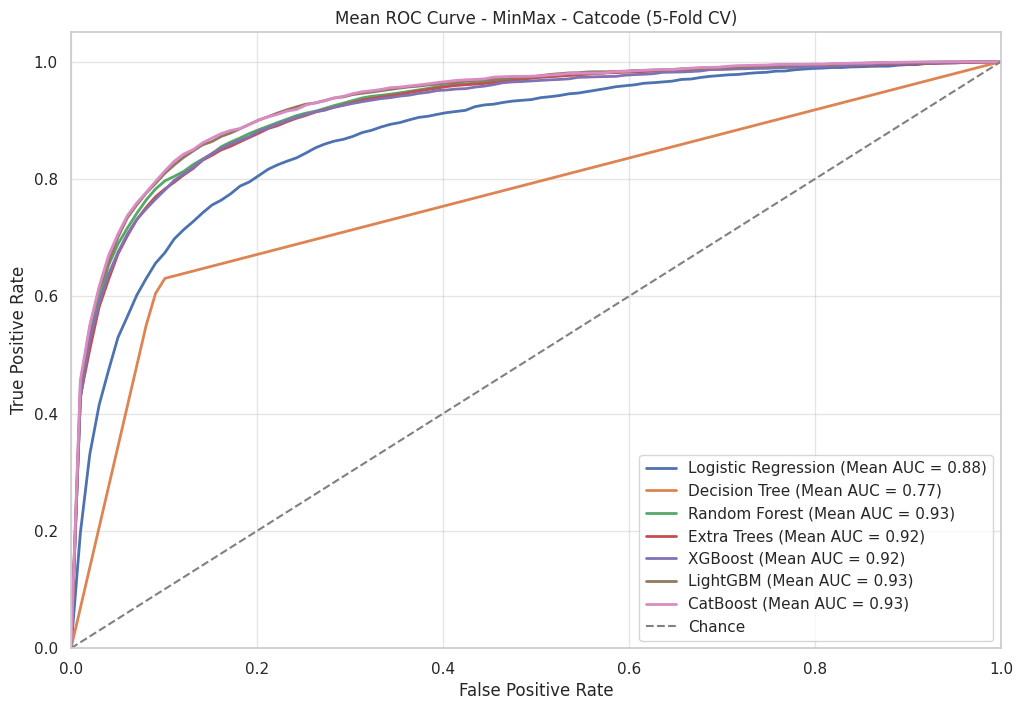



🔎 Evaluating Dataset Version: MinMax - AddRemove

--- Evaluating Model: Logistic Regression ---

  Fold 1 Classification Report:
              precision    recall  f1-score   support

         0.0     0.8756    0.8184    0.8460      1195
         1.0     0.6851    0.7725    0.7262       611

    accuracy                         0.8029      1806
   macro avg     0.7803    0.7955    0.7861      1806
weighted avg     0.8111    0.8029    0.8055      1806


  Fold 2 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9085    0.8149    0.8592      1194
         1.0     0.6993    0.8399    0.7632       612

    accuracy                         0.8234      1806
   macro avg     0.8039    0.8274    0.8112      1806
weighted avg     0.8376    0.8234    0.8266      1806


  Fold 3 Classification Report:
              precision    recall  f1-score   support

         0.0     0.8779    0.8367    0.8568      1194
         1.0     0.7081    0.7729    0.7

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[13:59:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[13:59:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.





  Fold 2 Classification Report:
              precision    recall  f1-score   support

         0.0     0.8882    0.9045    0.8963      1194
         1.0     0.8068    0.7778    0.7920       612

    accuracy                         0.8616      1806
   macro avg     0.8475    0.8412    0.8441      1806
weighted avg     0.8606    0.8616    0.8609      1806



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[13:59:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.





  Fold 3 Classification Report:
              precision    recall  f1-score   support

         0.0     0.8794    0.9221    0.9002      1194
         1.0     0.8321    0.7533    0.7907       612

    accuracy                         0.8649      1806
   macro avg     0.8558    0.8377    0.8455      1806
weighted avg     0.8634    0.8649    0.8631      1806



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[13:59:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.





  Fold 4 Classification Report:
              precision    recall  f1-score   support

         0.0     0.8886    0.9020    0.8953      1194
         1.0     0.8030    0.7794    0.7910       612

    accuracy                         0.8605      1806
   macro avg     0.8458    0.8407    0.8432      1806
weighted avg     0.8596    0.8605    0.8599      1806



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[13:59:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.





  Fold 5 Classification Report:
              precision    recall  f1-score   support

         0.0     0.8820    0.8953    0.8886      1194
         1.0     0.7892    0.7660    0.7774       611

    accuracy                         0.8515      1805
   macro avg     0.8356    0.8306    0.8330      1805
weighted avg     0.8506    0.8515    0.8510      1805


--- Evaluating Model: LightGBM ---
[LightGBM] [Info] Number of positive: 2447, number of negative: 4776
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000683 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 835
[LightGBM] [Info] Number of data points in the train set: 7223, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.338779 -> initscore=-0.668741
[LightGBM] [Info] Start training from score -0.668741


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.




  Fold 1 Classification Report:
              precision    recall  f1-score   support

         0.0     0.8880    0.9289    0.9080      1195
         1.0     0.8471    0.7709    0.8072       611

    accuracy                         0.8754      1806
   macro avg     0.8676    0.8499    0.8576      1806
weighted avg     0.8742    0.8754    0.8739      1806

[LightGBM] [Info] Number of positive: 2446, number of negative: 4777
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000926 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 834
[LightGBM] [Info] Number of data points in the train set: 7223, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.338640 -> initscore=-0.669359
[LightGBM] [Info] Start training from score -0.669359

  Fold 2 Classification Report:


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



              precision    recall  f1-score   support

         0.0     0.8962    0.9179    0.9069      1194
         1.0     0.8319    0.7925    0.8117       612

    accuracy                         0.8754      1806
   macro avg     0.8640    0.8552    0.8593      1806
weighted avg     0.8744    0.8754    0.8747      1806

[LightGBM] [Info] Number of positive: 2446, number of negative: 4777
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000623 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 834
[LightGBM] [Info] Number of data points in the train set: 7223, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.338640 -> initscore=-0.669359
[LightGBM] [Info] Start training from score -0.669359

  Fold 3 Classification Report:
              precision    recall  f1-score   support

         0.0     0.8827    0.92

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Info] Number of positive: 2446, number of negative: 4777
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000696 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 833
[LightGBM] [Info] Number of data points in the train set: 7223, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.338640 -> initscore=-0.669359
[LightGBM] [Info] Start training from score -0.669359

  Fold 4 Classification Report:
              precision    recall  f1-score   support

         0.0     0.8880    0.9095    0.8986      1194
         1.0     0.8148    0.7761    0.7950       612

    accuracy                         0.8643      1806
   macro avg     0.8514    0.8428    0.8468      1806
weighted avg     0.8632    0.8643    0.8635      1806

[LightGBM] [Info] Number of positive: 2447, number of negative: 4777
[LightGBM] [Info]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.




  Fold 5 Classification Report:
              precision    recall  f1-score   support

         0.0     0.8889    0.9045    0.8966      1194
         1.0     0.8068    0.7791    0.7927       611

    accuracy                         0.8620      1805
   macro avg     0.8478    0.8418    0.8447      1805
weighted avg     0.8611    0.8620    0.8614      1805


--- Evaluating Model: CatBoost ---

  Fold 1 Classification Report:
              precision    recall  f1-score   support

         0.0     0.8862    0.9322    0.9086      1195
         1.0     0.8525    0.7660    0.8069       611

    accuracy                         0.8760      1806
   macro avg     0.8693    0.8491    0.8578      1806
weighted avg     0.8748    0.8760    0.8742      1806


  Fold 2 Classification Report:
              precision    recall  f1-score   support

         0.0     0.8935    0.9280    0.9104      1194
         1.0     0.8481    0.7843    0.8149       612

    accuracy                         0.8793    

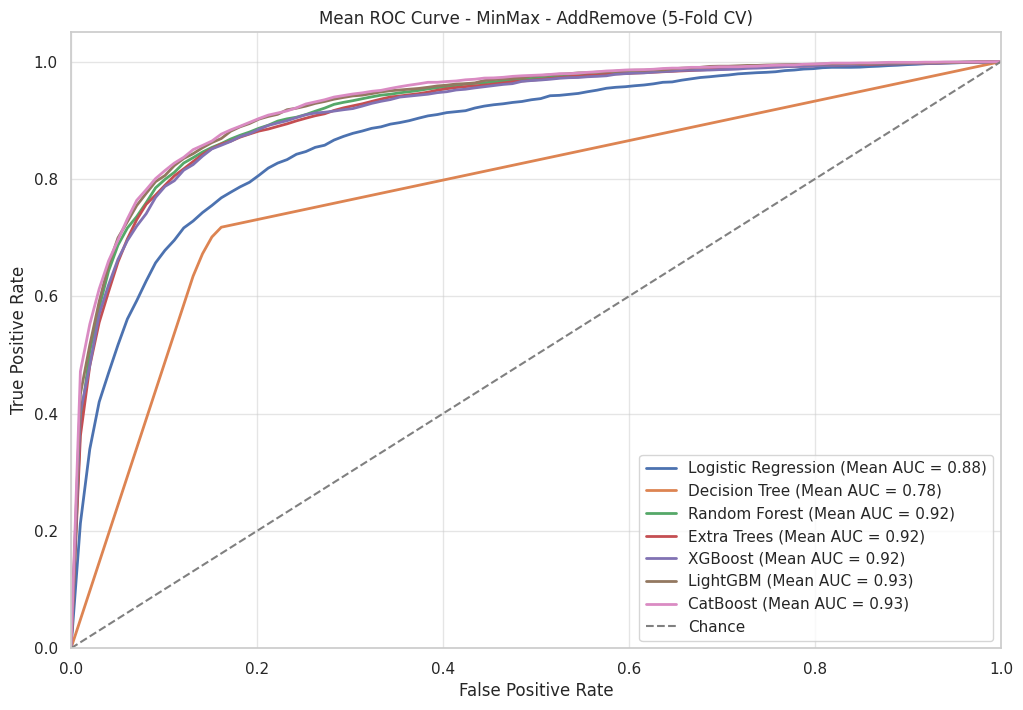



🔎 Evaluating Dataset Version: Standard - Dummies

--- Evaluating Model: Logistic Regression ---

  Fold 1 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9397    0.8409    0.8876      2389
         1.0     0.5592    0.7889    0.6544       611

    accuracy                         0.8303      3000
   macro avg     0.7494    0.8149    0.7710      3000
weighted avg     0.8622    0.8303    0.8401      3000


  Fold 2 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9420    0.8288    0.8818      2389
         1.0     0.5445    0.8003    0.6481       611

    accuracy                         0.8230      3000
   macro avg     0.7433    0.8146    0.7649      3000
weighted avg     0.8610    0.8230    0.8342      3000


  Fold 3 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9490    0.8342    0.8879      2388
         1.0     0.5605    0.8252    0.6

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[14:00:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.





  Fold 1 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9117    0.9468    0.9290      2389
         1.0     0.7553    0.6416    0.6938       611

    accuracy                         0.8847      3000
   macro avg     0.8335    0.7942    0.8114      3000
weighted avg     0.8799    0.8847    0.8811      3000



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[14:00:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.





  Fold 2 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9201    0.9502    0.9349      2389
         1.0     0.7767    0.6776    0.7238       611

    accuracy                         0.8947      3000
   macro avg     0.8484    0.8139    0.8294      3000
weighted avg     0.8909    0.8947    0.8919      3000



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[14:00:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.





  Fold 3 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9239    0.9506    0.9370      2388
         1.0     0.7827    0.6944    0.7359       612

    accuracy                         0.8983      3000
   macro avg     0.8533    0.8225    0.8365      3000
weighted avg     0.8951    0.8983    0.8960      3000



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[14:00:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.





  Fold 4 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9143    0.9518    0.9327      2388
         1.0     0.7763    0.6520    0.7087       612

    accuracy                         0.8907      3000
   macro avg     0.8453    0.8019    0.8207      3000
weighted avg     0.8862    0.8907    0.8870      3000



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[14:00:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.





  Fold 5 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9214    0.9426    0.9319      2388
         1.0     0.7540    0.6863    0.7186       612

    accuracy                         0.8903      3000
   macro avg     0.8377    0.8145    0.8252      3000
weighted avg     0.8873    0.8903    0.8884      3000


--- Evaluating Model: LightGBM ---
[LightGBM] [Info] Number of positive: 2447, number of negative: 9553
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001116 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 850
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203917 -> initscore=-1.361992
[LightGBM] [Info] Start training from score -1.361992


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.




  Fold 1 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9180    0.9514    0.9344      2389
         1.0     0.7786    0.6678    0.7189       611

    accuracy                         0.8937      3000
   macro avg     0.8483    0.8096    0.8267      3000
weighted avg     0.8896    0.8937    0.8905      3000

[LightGBM] [Info] Number of positive: 2447, number of negative: 9553
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001130 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 847
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203917 -> initscore=-1.361992
[LightGBM] [Info] Start training from score -1.361992


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.




  Fold 2 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9250    0.9607    0.9425      2389
         1.0     0.8189    0.6956    0.7522       611

    accuracy                         0.9067      3000
   macro avg     0.8720    0.8281    0.8474      3000
weighted avg     0.9034    0.9067    0.9037      3000

[LightGBM] [Info] Number of positive: 2446, number of negative: 9554
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001118 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 847
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203833 -> initscore=-1.362506
[LightGBM] [Info] Start training from score -1.362506


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.




  Fold 3 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9269    0.9552    0.9408      2388
         1.0     0.8015    0.7059    0.7507       612

    accuracy                         0.9043      3000
   macro avg     0.8642    0.8305    0.8457      3000
weighted avg     0.9013    0.9043    0.9020      3000

[LightGBM] [Info] Number of positive: 2446, number of negative: 9554
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 845
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203833 -> initscore=-1.362506
[LightGBM] [Info] Start training from score -1.362506


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.




  Fold 4 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9152    0.9577    0.9360      2388
         1.0     0.7984    0.6536    0.7188       612

    accuracy                         0.8957      3000
   macro avg     0.8568    0.8056    0.8274      3000
weighted avg     0.8913    0.8957    0.8916      3000

[LightGBM] [Info] Number of positive: 2446, number of negative: 9554
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001117 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 845
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203833 -> initscore=-1.362506
[LightGBM] [Info] Start training from score -1.362506


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.




  Fold 5 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9230    0.9493    0.9360      2388
         1.0     0.7776    0.6912    0.7318       612

    accuracy                         0.8967      3000
   macro avg     0.8503    0.8203    0.8339      3000
weighted avg     0.8934    0.8967    0.8944      3000


--- Evaluating Model: CatBoost ---

  Fold 1 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9123    0.9577    0.9344      2389
         1.0     0.7947    0.6399    0.7090       611

    accuracy                         0.8930      3000
   macro avg     0.8535    0.7988    0.8217      3000
weighted avg     0.8883    0.8930    0.8885      3000


  Fold 2 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9230    0.9590    0.9407      2389
         1.0     0.8108    0.6874    0.7440       611

    accuracy                         0.9037    

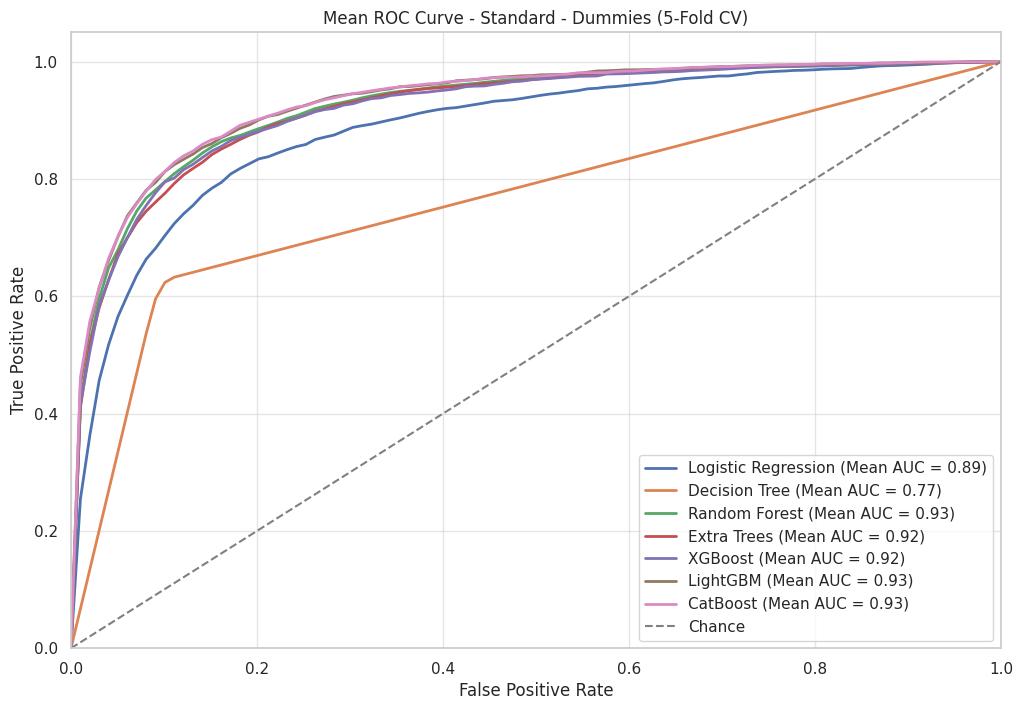



🔎 Evaluating Dataset Version: Standard - Binning

--- Evaluating Model: Logistic Regression ---

  Fold 1 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9363    0.7874    0.8554      2389
         1.0     0.4874    0.7905    0.6030       611

    accuracy                         0.7880      3000
   macro avg     0.7118    0.7889    0.7292      3000
weighted avg     0.8449    0.7880    0.8040      3000


  Fold 2 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9304    0.7664    0.8405      2389
         1.0     0.4593    0.7758    0.5770       611

    accuracy                         0.7683      3000
   macro avg     0.6948    0.7711    0.7087      3000
weighted avg     0.8344    0.7683    0.7868      3000


  Fold 3 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9415    0.7684    0.8462      2388
         1.0     0.4738    0.8137    0.5

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[14:01:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[14:01:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.





  Fold 2 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9099    0.9473    0.9282      2389
         1.0     0.7544    0.6334    0.6886       611

    accuracy                         0.8833      3000
   macro avg     0.8322    0.7903    0.8084      3000
weighted avg     0.8783    0.8833    0.8794      3000



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[14:01:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.





  Fold 3 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9233    0.9422    0.9326      2388
         1.0     0.7549    0.6944    0.7234       612

    accuracy                         0.8917      3000
   macro avg     0.8391    0.8183    0.8280      3000
weighted avg     0.8889    0.8917    0.8900      3000



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[14:01:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.





  Fold 4 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9033    0.9464    0.9243      2388
         1.0     0.7430    0.6046    0.6667       612

    accuracy                         0.8767      3000
   macro avg     0.8231    0.7755    0.7955      3000
weighted avg     0.8706    0.8767    0.8718      3000


  Fold 5 Classification Report:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[14:01:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



              precision    recall  f1-score   support

         0.0     0.9152    0.9447    0.9297      2388
         1.0     0.7533    0.6585    0.7027       612

    accuracy                         0.8863      3000
   macro avg     0.8342    0.8016    0.8162      3000
weighted avg     0.8822    0.8863    0.8834      3000


--- Evaluating Model: LightGBM ---
[LightGBM] [Info] Number of positive: 2447, number of negative: 9553
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000897 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 42
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203917 -> initscore=-1.361992
[LightGBM] [Info] Start training from score -1.361992


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.




  Fold 1 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9164    0.9447    0.9303      2389
         1.0     0.7542    0.6628    0.7056       611

    accuracy                         0.8873      3000
   macro avg     0.8353    0.8038    0.8180      3000
weighted avg     0.8833    0.8873    0.8846      3000

[LightGBM] [Info] Number of positive: 2447, number of negative: 9553
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000880 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 42
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203917 -> initscore=-1.361992
[LightGBM] [Info] Start training from score -1.361992


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.




  Fold 2 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9132    0.9514    0.9319      2389
         1.0     0.7730    0.6465    0.7041       611

    accuracy                         0.8893      3000
   macro avg     0.8431    0.7990    0.8180      3000
weighted avg     0.8847    0.8893    0.8855      3000

[LightGBM] [Info] Number of positive: 2446, number of negative: 9554
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000917 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 42
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203833 -> initscore=-1.362506
[LightGBM] [Info] Start training from score -1.362506


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.




  Fold 3 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9265    0.9497    0.9380      2388
         1.0     0.7826    0.7059    0.7423       612

    accuracy                         0.9000      3000
   macro avg     0.8545    0.8278    0.8401      3000
weighted avg     0.8971    0.9000    0.8980      3000

[LightGBM] [Info] Number of positive: 2446, number of negative: 9554
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001055 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 42
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203833 -> initscore=-1.362506
[LightGBM] [Info] Start training from score -1.362506


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.




  Fold 4 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9051    0.9464    0.9253      2388
         1.0     0.7455    0.6127    0.6726       612

    accuracy                         0.8783      3000
   macro avg     0.8253    0.7796    0.7990      3000
weighted avg     0.8725    0.8783    0.8737      3000

[LightGBM] [Info] Number of positive: 2446, number of negative: 9554
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000877 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 42
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203833 -> initscore=-1.362506
[LightGBM] [Info] Start training from score -1.362506


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.




  Fold 5 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9182    0.9497    0.9337      2388
         1.0     0.7736    0.6699    0.7180       612

    accuracy                         0.8927      3000
   macro avg     0.8459    0.8098    0.8259      3000
weighted avg     0.8887    0.8927    0.8897      3000


--- Evaluating Model: CatBoost ---

  Fold 1 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9168    0.9452    0.9308      2389
         1.0     0.7561    0.6645    0.7073       611

    accuracy                         0.8880      3000
   macro avg     0.8364    0.8048    0.8190      3000
weighted avg     0.8840    0.8880    0.8852      3000


  Fold 2 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9132    0.9510    0.9317      2389
         1.0     0.7715    0.6465    0.7035       611

    accuracy                         0.8890    

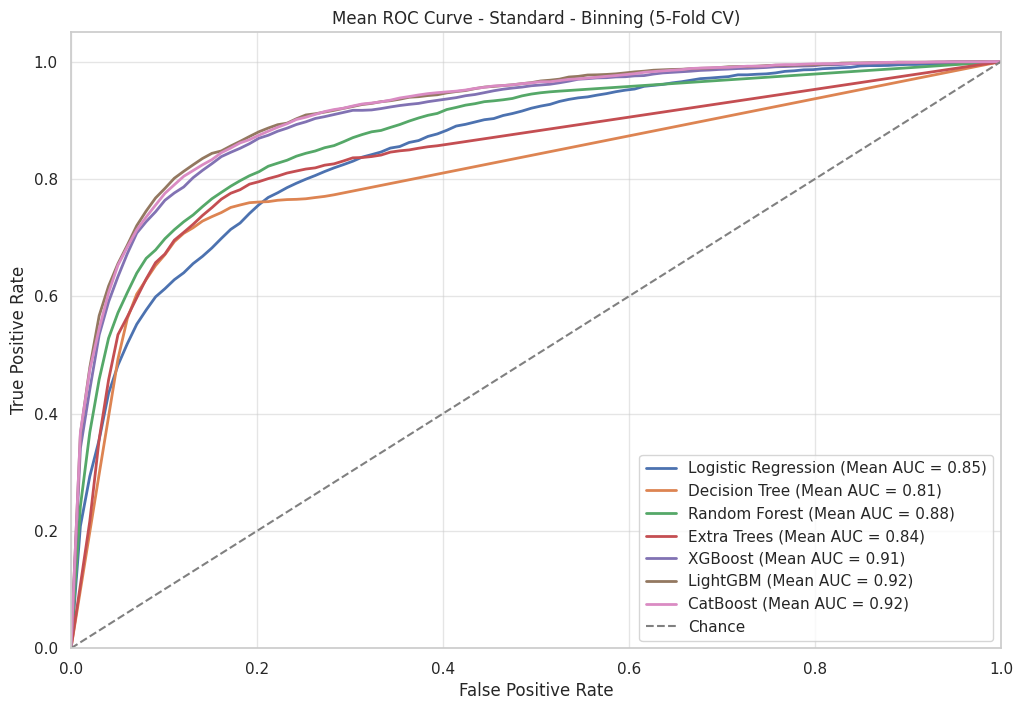



🔎 Evaluating Dataset Version: Standard - Catcode

--- Evaluating Model: Logistic Regression ---

  Fold 1 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9339    0.8338    0.8810      2389
         1.0     0.5421    0.7692    0.6360       611

    accuracy                         0.8207      3000
   macro avg     0.7380    0.8015    0.7585      3000
weighted avg     0.8541    0.8207    0.8311      3000


  Fold 2 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9412    0.8112    0.8714      2389
         1.0     0.5207    0.8020    0.6314       611

    accuracy                         0.8093      3000
   macro avg     0.7310    0.8066    0.7514      3000
weighted avg     0.8556    0.8093    0.8225      3000


  Fold 3 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9478    0.8128    0.8751      2388
         1.0     0.5305    0.8252    0.6

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[14:02:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.





  Fold 1 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9116    0.9502    0.9305      2389
         1.0     0.7667    0.6399    0.6976       611

    accuracy                         0.8870      3000
   macro avg     0.8392    0.7951    0.8141      3000
weighted avg     0.8821    0.8870    0.8831      3000



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[14:02:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.





  Fold 2 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9195    0.9514    0.9352      2389
         1.0     0.7803    0.6743    0.7234       611

    accuracy                         0.8950      3000
   macro avg     0.8499    0.8129    0.8293      3000
weighted avg     0.8911    0.8950    0.8921      3000



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[14:02:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.





  Fold 3 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9281    0.9518    0.9398      2388
         1.0     0.7913    0.7124    0.7498       612

    accuracy                         0.9030      3000
   macro avg     0.8597    0.8321    0.8448      3000
weighted avg     0.9002    0.9030    0.9011      3000



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[14:02:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.





  Fold 4 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9146    0.9594    0.9364      2388
         1.0     0.8040    0.6503    0.7191       612

    accuracy                         0.8963      3000
   macro avg     0.8593    0.8049    0.8278      3000
weighted avg     0.8920    0.8963    0.8921      3000



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[14:02:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.





  Fold 5 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9210    0.9422    0.9315      2388
         1.0     0.7522    0.6846    0.7169       612

    accuracy                         0.8897      3000
   macro avg     0.8366    0.8134    0.8242      3000
weighted avg     0.8866    0.8897    0.8877      3000


--- Evaluating Model: LightGBM ---
[LightGBM] [Info] Number of positive: 2447, number of negative: 9553
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000470 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 848
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203917 -> initscore=-1.361992
[LightGBM] [Info] Start training from score -1.361992


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.




  Fold 1 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9164    0.9544    0.9350      2389
         1.0     0.7871    0.6596    0.7177       611

    accuracy                         0.8943      3000
   macro avg     0.8518    0.8070    0.8264      3000
weighted avg     0.8901    0.8943    0.8907      3000

[LightGBM] [Info] Number of positive: 2447, number of negative: 9553
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000450 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 845
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203917 -> initscore=-1.361992
[LightGBM] [Info] Start training from score -1.361992


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.




  Fold 2 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9230    0.9581    0.9402      2389
         1.0     0.8077    0.6874    0.7427       611

    accuracy                         0.9030      3000
   macro avg     0.8653    0.8228    0.8415      3000
weighted avg     0.8995    0.9030    0.9000      3000

[LightGBM] [Info] Number of positive: 2446, number of negative: 9554
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000501 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 845
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203833 -> initscore=-1.362506
[LightGBM] [Info] Start training from score -1.362506


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.




  Fold 3 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9287    0.9539    0.9411      2388
         1.0     0.7989    0.7141    0.7541       612

    accuracy                         0.9050      3000
   macro avg     0.8638    0.8340    0.8476      3000
weighted avg     0.9022    0.9050    0.9030      3000

[LightGBM] [Info] Number of positive: 2446, number of negative: 9554
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000516 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 843
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203833 -> initscore=-1.362506
[LightGBM] [Info] Start training from score -1.362506


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.




  Fold 4 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9154    0.9560    0.9353      2388
         1.0     0.7925    0.6552    0.7174       612

    accuracy                         0.8947      3000
   macro avg     0.8539    0.8056    0.8263      3000
weighted avg     0.8903    0.8947    0.8908      3000

[LightGBM] [Info] Number of positive: 2446, number of negative: 9554
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000496 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 843
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203833 -> initscore=-1.362506
[LightGBM] [Info] Start training from score -1.362506


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.




  Fold 5 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9242    0.9497    0.9368      2388
         1.0     0.7802    0.6961    0.7358       612

    accuracy                         0.8980      3000
   macro avg     0.8522    0.8229    0.8363      3000
weighted avg     0.8948    0.8980    0.8958      3000


--- Evaluating Model: CatBoost ---

  Fold 1 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9130    0.9573    0.9346      2389
         1.0     0.7939    0.6432    0.7107       611

    accuracy                         0.8933      3000
   macro avg     0.8535    0.8003    0.8226      3000
weighted avg     0.8887    0.8933    0.8890      3000


  Fold 2 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9206    0.9615    0.9406      2389
         1.0     0.8178    0.6759    0.7401       611

    accuracy                         0.9033    

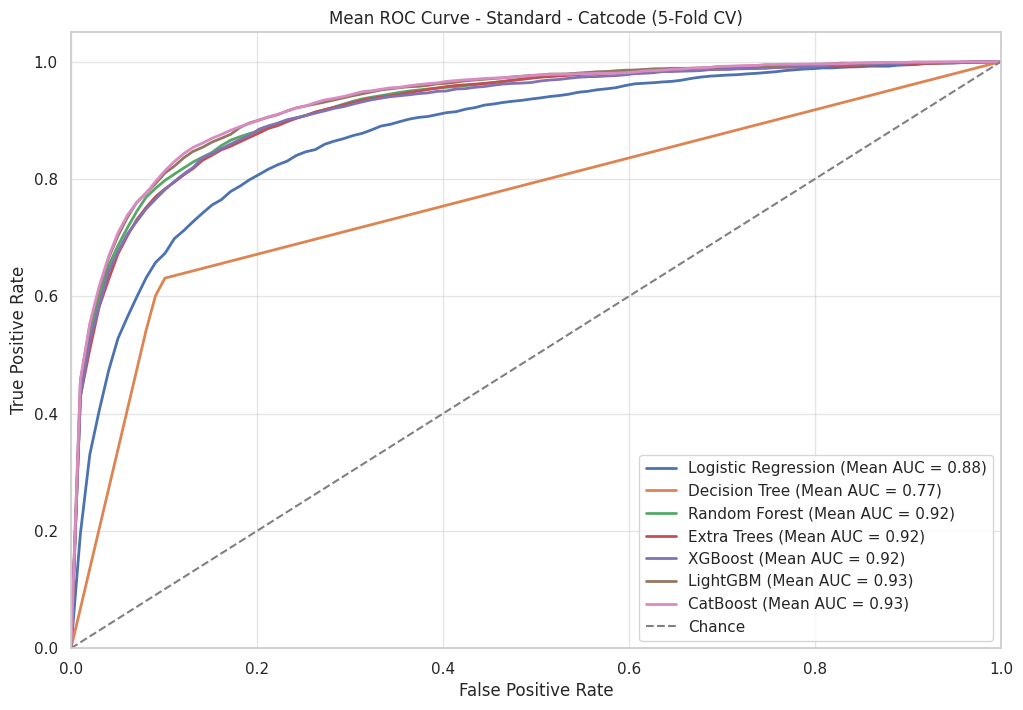



🔎 Evaluating Dataset Version: Standard - AddRemove

--- Evaluating Model: Logistic Regression ---

  Fold 1 Classification Report:
              precision    recall  f1-score   support

         0.0     0.8759    0.8209    0.8475      1195
         1.0     0.6880    0.7725    0.7278       611

    accuracy                         0.8045      1806
   macro avg     0.7820    0.7967    0.7877      1806
weighted avg     0.8123    0.8045    0.8070      1806


  Fold 2 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9103    0.8157    0.8604      1194
         1.0     0.7011    0.8431    0.7656       612

    accuracy                         0.8250      1806
   macro avg     0.8057    0.8294    0.8130      1806
weighted avg     0.8394    0.8250    0.8283      1806


  Fold 3 Classification Report:
              precision    recall  f1-score   support

         0.0     0.8801    0.8358    0.8574      1194
         1.0     0.7083    0.7778    0

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[14:03:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.





  Fold 1 Classification Report:
              precision    recall  f1-score   support

         0.0     0.8803    0.9172    0.8984      1195
         1.0     0.8235    0.7561    0.7884       611

    accuracy                         0.8627      1806
   macro avg     0.8519    0.8366    0.8434      1806
weighted avg     0.8611    0.8627    0.8612      1806



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[14:03:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.





  Fold 2 Classification Report:
              precision    recall  f1-score   support

         0.0     0.8891    0.9062    0.8976      1194
         1.0     0.8098    0.7794    0.7943       612

    accuracy                         0.8632      1806
   macro avg     0.8495    0.8428    0.8459      1806
weighted avg     0.8622    0.8632    0.8626      1806



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[14:03:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.





  Fold 3 Classification Report:
              precision    recall  f1-score   support

         0.0     0.8827    0.9204    0.9012      1194
         1.0     0.8307    0.7614    0.7945       612

    accuracy                         0.8666      1806
   macro avg     0.8567    0.8409    0.8479      1806
weighted avg     0.8651    0.8666    0.8651      1806


  Fold 4 Classification Report:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[14:03:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




              precision    recall  f1-score   support

         0.0     0.8886    0.9020    0.8953      1194
         1.0     0.8030    0.7794    0.7910       612

    accuracy                         0.8605      1806
   macro avg     0.8458    0.8407    0.8432      1806
weighted avg     0.8596    0.8605    0.8599      1806



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[14:03:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.





  Fold 5 Classification Report:
              precision    recall  f1-score   support

         0.0     0.8820    0.8953    0.8886      1194
         1.0     0.7892    0.7660    0.7774       611

    accuracy                         0.8515      1805
   macro avg     0.8356    0.8306    0.8330      1805
weighted avg     0.8506    0.8515    0.8510      1805


--- Evaluating Model: LightGBM ---
[LightGBM] [Info] Number of positive: 2447, number of negative: 4776
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000316 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 844
[LightGBM] [Info] Number of data points in the train set: 7223, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.338779 -> initscore=-0.668741
[LightGBM] [Info] Start training from score -0.668741

  Fold 1 Classification Report:


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



              precision    recall  f1-score   support

         0.0     0.8893    0.9280    0.9083      1195
         1.0     0.8462    0.7741    0.8085       611

    accuracy                         0.8760      1806
   macro avg     0.8677    0.8511    0.8584      1806
weighted avg     0.8747    0.8760    0.8745      1806

[LightGBM] [Info] Number of positive: 2446, number of negative: 4777
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000483 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 843
[LightGBM] [Info] Number of data points in the train set: 7223, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.338640 -> initscore=-0.669359
[LightGBM] [Info] Start training from score -0.669359


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.




  Fold 2 Classification Report:
              precision    recall  f1-score   support

         0.0     0.8984    0.9188    0.9085      1194
         1.0     0.8342    0.7974    0.8154       612

    accuracy                         0.8776      1806
   macro avg     0.8663    0.8581    0.8619      1806
weighted avg     0.8767    0.8776    0.8769      1806

[LightGBM] [Info] Number of positive: 2446, number of negative: 4777
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000289 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 842
[LightGBM] [Info] Number of data points in the train set: 7223, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.338640 -> initscore=-0.669359
[LightGBM] [Info] Start training from score -0.669359

  Fold 3 Classification Report:
              precision    recall  f1-score   support

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Info] Number of positive: 2447, number of negative: 4777
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000582 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 842
[LightGBM] [Info] Number of data points in the train set: 7224, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.338732 -> initscore=-0.668950
[LightGBM] [Info] Start training from score -0.668950

  Fold 5 Classification Report:
              precision    recall  f1-score   support

         0.0     0.8929    0.9003    0.8966      1194
         1.0     0.8020    0.7889    0.7954       611

    accuracy                         0.8626      1805
   macro avg     0.8474    0.8446    0.8460      1805
weighted avg     0.8621    0.8626    0.8623      1805


--- Evaluating Model: CatBoost ---


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.




  Fold 1 Classification Report:
              precision    recall  f1-score   support

         0.0     0.8848    0.9322    0.9079      1195
         1.0     0.8519    0.7627    0.8048       611

    accuracy                         0.8749      1806
   macro avg     0.8684    0.8475    0.8564      1806
weighted avg     0.8737    0.8749    0.8730      1806


  Fold 2 Classification Report:
              precision    recall  f1-score   support

         0.0     0.8925    0.9246    0.9083      1194
         1.0     0.8418    0.7827    0.8112       612

    accuracy                         0.8765      1806
   macro avg     0.8672    0.8537    0.8597      1806
weighted avg     0.8753    0.8765    0.8754      1806


  Fold 3 Classification Report:
              precision    recall  f1-score   support

         0.0     0.8856    0.9338    0.9091      1194
         1.0     0.8556    0.7647    0.8076       612

    accuracy                         0.8765      1806
   macro avg     0.8706    0.

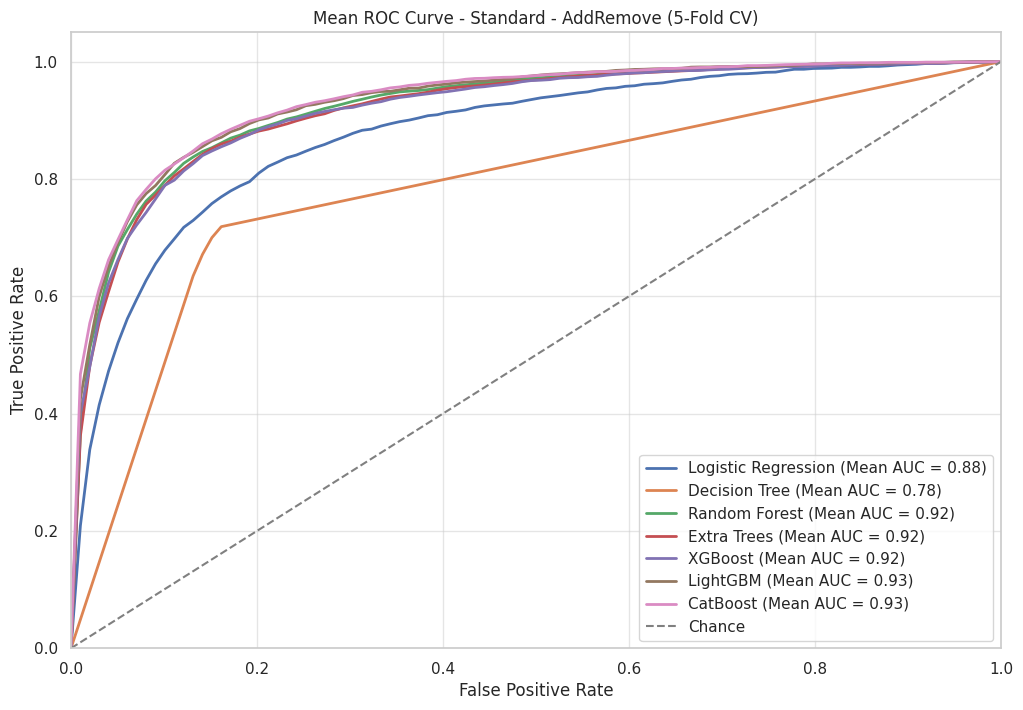

   Saved combined K-Fold results to all_model_results_combined_kfold.xlsx
   Saved K-Fold results by version to all_model_results_by_version_kfold.xlsx
   Saved best recall model to saved_models/best_recall_model_Logistic Regression_Standard_Dummies.pkl
   Saved best F1 model to saved_models/best_f1_model_CatBoost_MinMax_AddRemove.pkl
   Saved best F1 model for version MinMax - Dummies to saved_models/best_f1_model_per_version_LightGBM_MinMax_Dummies.pkl
   Saved best F1 model for version MinMax - Binning to saved_models/best_f1_model_per_version_LightGBM_MinMax_Binning.pkl
   Saved best F1 model for version MinMax - Catcode to saved_models/best_f1_model_per_version_CatBoost_MinMax_Catcode.pkl
   Saved best F1 model for version MinMax - AddRemove to saved_models/best_f1_model_per_version_CatBoost_MinMax_AddRemove.pkl
   Saved best F1 model for version Standard - Dummies to saved_models/best_f1_model_per_version_LightGBM_Standard_Dummies.pkl
   Saved best F1 model for version Standard -

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
import joblib
import os

# Define models
models = {
    "Logistic Regression": LogisticRegression(random_state=96, max_iter=1000, class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(random_state=96, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(random_state=96, n_estimators=100, class_weight='balanced'),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, random_state=96, class_weight='balanced'),
    "XGBoost": xgb.XGBClassifier(random_state=96, n_estimators=100, use_label_encoder=False, eval_metric='logloss', scale_pos_weight=1.0),
    "LightGBM": lgb.LGBMClassifier(random_state=96, n_estimators=100, scale_pos_weight=1.0),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=96, scale_pos_weight=1.0),
}

# Placeholder for datasets
all_versions = {
    "MinMax - Dummies": scaled_minmax_results["dummies"],
    "MinMax - Binning": scaled_minmax_results["binning"],
    "MinMax - Catcode": scaled_minmax_results["catcode"],
    "MinMax - AddRemove": scaled_minmax_results["add_remove"],
    "Standard - Dummies": scaled_std_results["dummies"],
    "Standard - Binning": scaled_std_results["binning"],
    "Standard - Catcode": scaled_std_results["catcode"],
    "Standard - AddRemove": scaled_std_results["add_remove"],
}

model_version_params = {}

results_excel = {}  # To store results for Excel export
best_recall = 0  # Track best Recall score for class 1
best_f1 = 0  # Track best F1-score for class 1
best_recall_model_info = None  # Info about the model with best recall
best_f1_model_info = None  # Info about the model with best F1
best_f1_model_per_version = {}  # Best F1 model for each data version
trained_models = {}  # Store trained models for saving

k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=96)

os.makedirs("saved_models", exist_ok=True)

# Main Loop for Cross-Validation
for version_name, (X, y, feature_names) in all_versions.items():
    print(f"\n\n==============================")
    print(f"  Evaluating Dataset Version: {version_name}")
    print(f"==============================")

    plt.figure(figsize=(12, 8))
    version_results = []
    trained_models[version_name] = {}

    for model_name, base_model in models.items():
        print(f"\n--- Evaluating Model: {model_name} ---")

        params = model_version_params.get(version_name, {}).get(model_name, {})
        model = base_model.__class__(**{**base_model.get_params(), **params})

        auc_scores = []
        recall_1_scores = []
        f1_1_scores = []
        accuracy_scores = []
        precision_0_scores = []
        recall_0_scores = []
        f1_0_scores = []
        precision_1_scores = []
        all_fpr = []
        all_tpr = []

        # Perform K-Fold Cross-Validation
        for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
            X_train, X_test = X[train_idx], X[test_idx]
            y_train, y_test = y.iloc[train_idx] if isinstance(y, pd.Series) else y[train_idx], \
                              y.iloc[test_idx] if isinstance(y, pd.Series) else y[test_idx]

            # Train the model
            model.fit(X_train, y_train)

            # Get probabilities or fallback to decision function
            try:
                y_proba = model.predict_proba(X_test)[:, 1]
            except AttributeError:
                try:
                    y_decision = model.decision_function(X_test)
                    y_proba = (y_decision - y_decision.min()) / (y_decision.max() - y_decision.min())
                except AttributeError:
                    print(f"Warning: Model {model_name} has neither predict_proba nor decision_function. Using predict() for classification report, AUC will be inaccurate.")
                    y_proba = model.predict(X_test)

            y_pred = (y_proba >= 0.5).astype(int)

            # Print classification report for this fold
            print(f"\n  Fold {fold+1} Classification Report:")
            print(classification_report(y_test, y_pred, digits=4, zero_division=0))

            # Calculate metrics
            report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
            try:
                auc_score = roc_auc_score(y_test, y_proba)
            except ValueError as e:
                print(f"Warning: Could not calculate AUC for fold {fold+1}, model {model_name}. Error: {e}. Assigning AUC=0.5.")
                auc_score = 0.5

            auc_scores.append(auc_score)
            accuracy_scores.append(report["accuracy"])
            precision_0_scores.append(report["0.0"]["precision"])
            recall_0_scores.append(report["0.0"]["recall"])
            f1_0_scores.append(report["0.0"]["f1-score"])
            precision_1_scores.append(report["1.0"]["precision"])
            recall_1_scores.append(report["1.0"]["recall"])
            f1_1_scores.append(report["1.0"]["f1-score"])

            # Calculate ROC curve points for this fold
            fpr, tpr, _ = roc_curve(y_test, y_proba)
            all_fpr.append(fpr)
            all_tpr.append(tpr)

        # Calculate mean metrics across all folds
        mean_auc = np.mean(auc_scores)
        mean_accuracy = np.mean(accuracy_scores)
        mean_precision_0 = np.mean(precision_0_scores)
        mean_recall_0 = np.mean(recall_0_scores)
        mean_f1_0 = np.mean(f1_0_scores)
        mean_precision_1 = np.mean(precision_1_scores)
        mean_recall_1 = np.mean(recall_1_scores)
        mean_f1_1 = np.mean(f1_1_scores)

        # Store the trained model (trained on the last fold)
        trained_models[version_name][model_name] = model

        # Append the averaged results for this model/version combination
        version_results.append({
            "Model": model_name,
            "Accuracy": mean_accuracy,
            "Precision (0)": mean_precision_0,
            "Recall (0)": mean_recall_0,
            "F1-score (0)": mean_f1_0,
            "Precision (1)": mean_precision_1,
            "Recall (1)": mean_recall_1,
            "F1-score (1)": mean_f1_1,
            "AUC": mean_auc,
            "Preprocessing": version_name.split(" - ")[1],
            "Scaler": version_name.split(" - ")[0]
        })

        # Update overall best model based on Recall (Class 1)
        if mean_recall_1 > best_recall:
            best_recall = mean_recall_1
            best_recall_model_info = {
                "model_name": model_name,
                "version_name": version_name,
                "scaler": version_name.split(" - ")[0],
                "preprocessing": version_name.split(" - ")[1],
                "model_class": model.__class__,
                "recall_score": mean_recall_1,
                "f1_score": mean_f1_1,
                "auc_score": mean_auc,
                "trained_model": model
            }

        # Update overall best model based on F1-score (Class 1)
        if mean_f1_1 > best_f1:
            best_f1 = mean_f1_1
            best_f1_model_info = {
                "model_name": model_name,
                "version_name": version_name,
                "scaler": version_name.split(" - ")[0],
                "preprocessing": version_name.split(" - ")[1],
                "model_class": model.__class__,
                "recall_score": mean_recall_1,
                "f1_score": mean_f1_1,
                "auc_score": mean_auc,
                "trained_model": model
            }

        # Update the best F1 model specifically for this data version
        if version_name not in best_f1_model_per_version or mean_f1_1 > best_f1_model_per_version[version_name]["f1"]:
            best_f1_model_per_version[version_name] = {
                "model_name": model_name,
                "f1": mean_f1_1,
                "scaler": version_name.split(" - ")[0],
                "preprocessing": version_name.split(" - ")[1],
                "model_class": model.__class__,
                "trained_model": model
            }

        # Calculate mean ROC curve
        mean_fpr = np.linspace(0, 1, 100)
        interp_tprs = []
        for i in range(k_folds):
            interp_tpr = np.interp(mean_fpr, all_fpr[i], all_tpr[i])
            interp_tpr[0] = 0.0
            interp_tprs.append(interp_tpr)
        mean_tpr = np.mean(interp_tprs, axis=0)
        mean_tpr[-1] = 1.0

        plt.plot(mean_fpr, mean_tpr, lw=2, label=f"{model_name} (Mean AUC = {mean_auc:.2f})")

    results_excel[version_name] = pd.DataFrame(version_results)

    # Finalize and show the ROC plot for the current data version
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Chance')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title(f"Mean ROC Curve - {version_name} ({k_folds}-Fold CV)")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid(alpha=0.5)
    plt.show()

# Export Results to Excel
try:
    combined_df = pd.concat(results_excel.values(), ignore_index=True)
    combined_df = combined_df.sort_values(by="F1-score (1)", ascending=False)
    combined_df.to_excel("all_model_results_combined_kfold.xlsx", sheet_name="All KFold Results", index=False)
    print("   Saved combined K-Fold results to all_model_results_combined_kfold.xlsx")

    with pd.ExcelWriter("all_model_results_by_version_kfold.xlsx") as writer:
        for version, df in results_excel.items():
            df_sorted = df.sort_values(by="F1-score (1)", ascending=False)
            sheet_name = version.replace(" ", "_").replace("-", "")[:31]
            df_sorted.to_excel(writer, sheet_name=sheet_name, index=False)
    print("   Saved K-Fold results by version to all_model_results_by_version_kfold.xlsx")

except Exception as e:
    print(f"Error exporting results to Excel: {e}")

# Save Best Models as .pkl Files
try:
    # Save the overall best model based on Recall (Class 1)
    if best_recall_model_info:
        recall_model_filename = f"saved_models/best_recall_model_{best_recall_model_info['model_name']}_{best_recall_model_info['version_name'].replace(' - ', '_')}.pkl"
        joblib.dump(best_recall_model_info['trained_model'], recall_model_filename)
        print(f"   Saved best recall model to {recall_model_filename}")

    # Save the overall best model based on F1-score (Class 1)
    if best_f1_model_info:
        f1_model_filename = f"saved_models/best_f1_model_{best_f1_model_info['model_name']}_{best_f1_model_info['version_name'].replace(' - ', '_')}.pkl"
        joblib.dump(best_f1_model_info['trained_model'], f1_model_filename)
        print(f"   Saved best F1 model to {f1_model_filename}")

    # Save the best F1 model for each data version
    for version, info in best_f1_model_per_version.items():
        version_model_filename = f"saved_models/best_f1_model_per_version_{info['model_name']}_{version.replace(' - ', '_')}.pkl"
        joblib.dump(info['trained_model'], version_model_filename)
        print(f"   Saved best F1 model for version {version} to {version_model_filename}")

except Exception as e:
    print(f"Error saving models to .pkl files: {e}")

# Print Summary of Best Models
print("\n   Best Overall Model based on Mean Recall (1) across K-Folds:")
if best_recall_model_info:
    print(f"  Score: {best_recall:.4f}")
    print({k: v for k, v in best_recall_model_info.items() if k != 'trained_model'})
else:
    print("  No best recall model information available.")

print("\n   Best Overall Model based on Mean F1-score (1) across K-Folds:")
if best_f1_model_info:
    print(f"  Score: {best_f1:.4f}")
    print({k: v for k, v in best_f1_model_info.items() if k != 'trained_model'})
else:
    print("  No best F1 model information available.")

print("\n   Best Model (by F1-score) per Data Version (from K-Fold CV):")
if best_f1_model_per_version:
    for version, info in best_f1_model_per_version.items():
        print(f"- {version}: {info['model_name']} (Mean F1 = {info['f1']:.4f})")
else:
    print("  No per-version best model information available.")

# **5) Evaluation**

# Re-train Final Models, Save Components & Feature Importance

--- Re-training best models on full training data and saving components ---

--- Processing final components for Version: MinMax - Dummies ---
  Fitting final MinMaxScaler on full X_train (Shape: (15000, 11))...
  Saved final scaler to: saved_final_scalers/final_scaler_minmaxscaler_dummies.pkl
  Training final model (LightGBM) for MinMax - Dummies...
[LightGBM] [Info] Number of positive: 3058, number of negative: 11942
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001783 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 838
[LightGBM] [Info] Number of data points in the train set: 15000, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203867 -> initscore=-1.362300
[LightGBM] [Info] Start training from score -1.362300


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



  Final model (LightGBM) training complete.
  Saved final model to: saved_final_models/final_model_LightGBM_MinMax_Dummies.pkl

  Top 10 Feature Importances for FINAL LightGBM (MinMax - Dummies):
             Feature  Importance
0        CreditScore         578
1    EstimatedSalary         526
2                Age         518
3            Balance         494
4      NumOfProducts         217
5             Tenure         205
6        Gender_Male         139
7     IsActiveMember         138
8  Geography_Germany          97
9          HasCrCard          56


<ipython-input-180-057e795e4d4e>:163: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




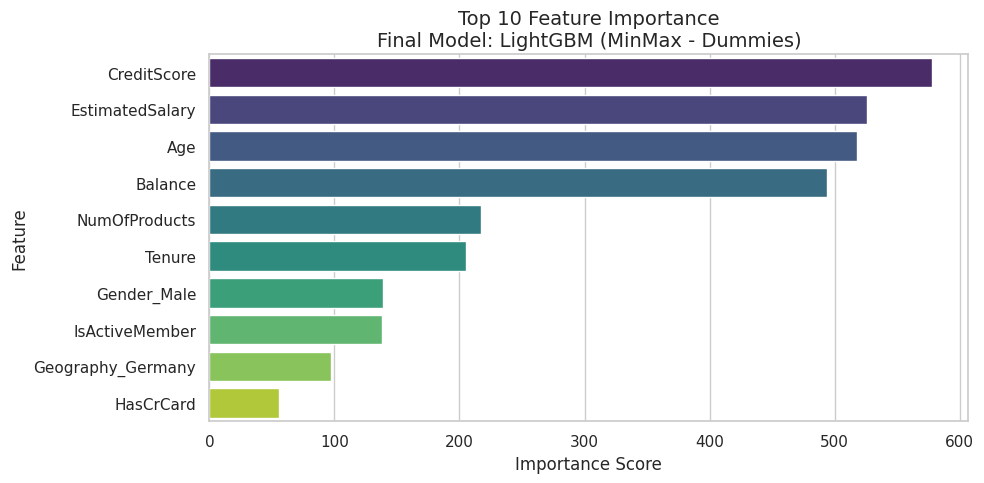


--- Processing final components for Version: MinMax - Binning ---
  Fitting final MinMaxScaler on full X_train (Shape: (15000, 10))...
  Saved final scaler to: saved_final_scalers/final_scaler_minmaxscaler_binning.pkl
  Training final model (LightGBM) for MinMax - Binning...
[LightGBM] [Info] Number of positive: 3058, number of negative: 11942
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002381 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 32
[LightGBM] [Info] Number of data points in the train set: 15000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203867 -> initscore=-1.362300
[LightGBM] [Info] Start training from score -1.362300


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



  Final model (LightGBM) training complete.
  Saved final model to: saved_final_models/final_model_LightGBM_MinMax_Binning.pkl

  Top 10 Feature Importances for FINAL LightGBM (MinMax - Binning):
             Feature  Importance
0       Tenure_Group         450
1          Geography         391
2      Balance_Group         359
3          Age_Group         357
4  CreditScore_Group         352
5     IsActiveMember         257
6      NumOfProducts         237
7             Gender         231
8       Salary_Group         193
9          HasCrCard         173


<ipython-input-180-057e795e4d4e>:163: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




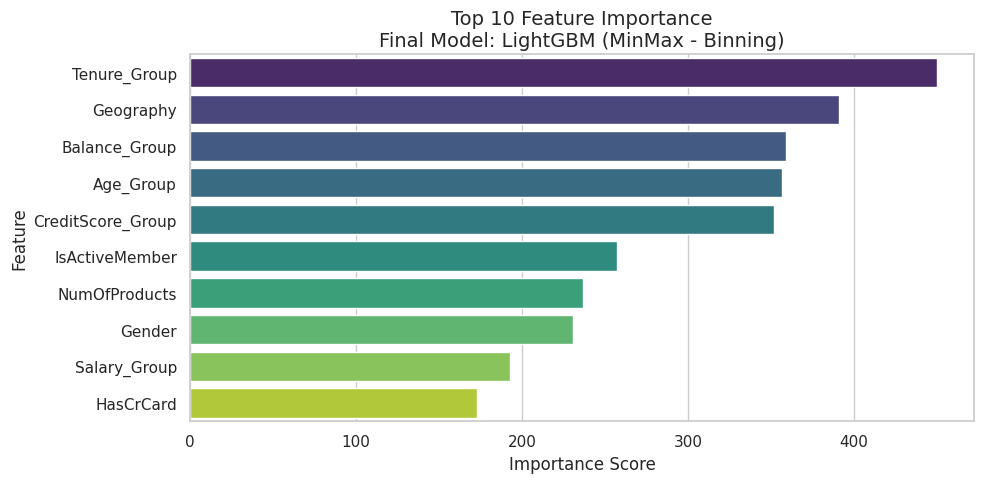


--- Processing final components for Version: MinMax - Catcode ---
  Fitting final MinMaxScaler on full X_train (Shape: (15000, 10))...
  Saved final scaler to: saved_final_scalers/final_scaler_minmaxscaler_catcode.pkl
  Training final model (CatBoost) for MinMax - Catcode...
  Final model (CatBoost) training complete.
  Saved final model to: saved_final_models/final_model_CatBoost_MinMax_Catcode.pkl

  Top 10 Feature Importances for FINAL CatBoost (MinMax - Catcode):
           Feature  Importance
0    NumOfProducts   25.543984
1              Age   21.726999
2          Balance   10.115091
3      CreditScore    9.734742
4  EstimatedSalary    8.419599
5        Geography    7.334657
6   IsActiveMember    6.466539
7           Tenure    4.470485
8           Gender    4.318603
9        HasCrCard    1.869301


<ipython-input-180-057e795e4d4e>:163: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




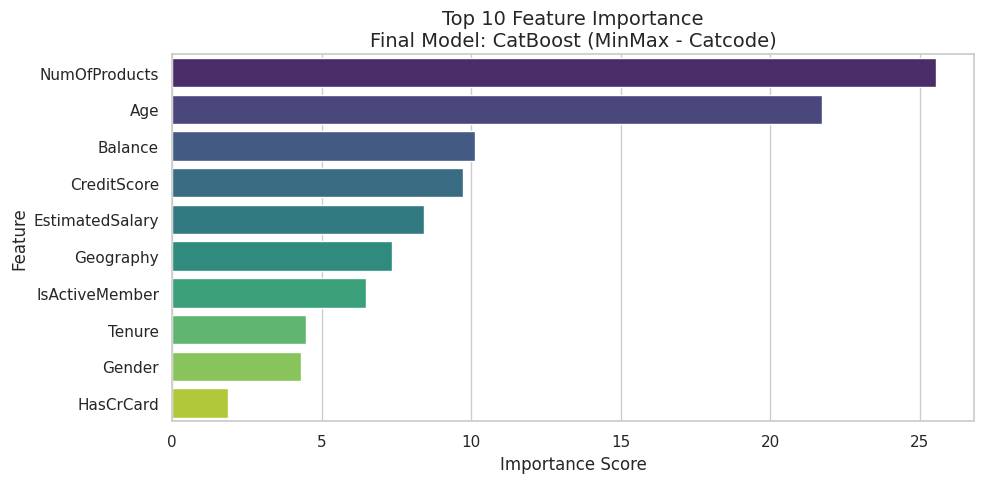


--- Processing final components for Version: MinMax - AddRemove ---
  Fitting final MinMaxScaler on full X_train (Shape: (9029, 10))...
  Saved final scaler to: saved_final_scalers/final_scaler_minmaxscaler_addremove.pkl
  Training final model (CatBoost) for MinMax - AddRemove...
  Final model (CatBoost) training complete.
  Saved final model to: saved_final_models/final_model_CatBoost_MinMax_AddRemove.pkl

  Top 10 Feature Importances for FINAL CatBoost (MinMax - AddRemove):
           Feature  Importance
0    NumOfProducts   26.091001
1              Age   22.327166
2          Balance    9.706627
3      CreditScore    9.341419
4  EstimatedSalary    8.644564
5        Geography    7.212472
6   IsActiveMember    6.470640
7           Tenure    4.563597
8           Gender    3.771283
9        HasCrCard    1.871232


<ipython-input-180-057e795e4d4e>:163: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




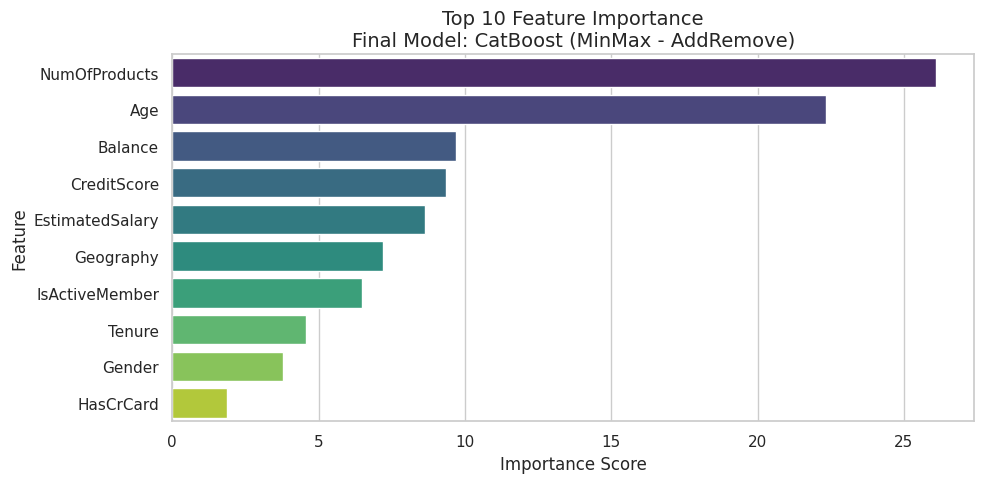


--- Processing final components for Version: Standard - Dummies ---
  Fitting final StandardScaler on full X_train (Shape: (15000, 11))...
  Saved final scaler to: saved_final_scalers/final_scaler_standardscaler_dummies.pkl
  Training final model (LightGBM) for Standard - Dummies...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Info] Number of positive: 3058, number of negative: 11942
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013907 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 848
[LightGBM] [Info] Number of data points in the train set: 15000, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203867 -> initscore=-1.362300
[LightGBM] [Info] Start training from score -1.362300
  Final model (LightGBM) training complete.
  Saved final model to: saved_final_models/final_model_LightGBM_Standard_Dummies.pkl

  Top 10 Feature Importances for FINAL LightGBM (Standard - Dummies):
             Feature  Importance
0        CreditScore         584
1    EstimatedSalary         528
2                Age         500
3            Balance         492
4             Tenure         223
5      NumOfProducts         215
6     IsActiv

<ipython-input-180-057e795e4d4e>:163: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




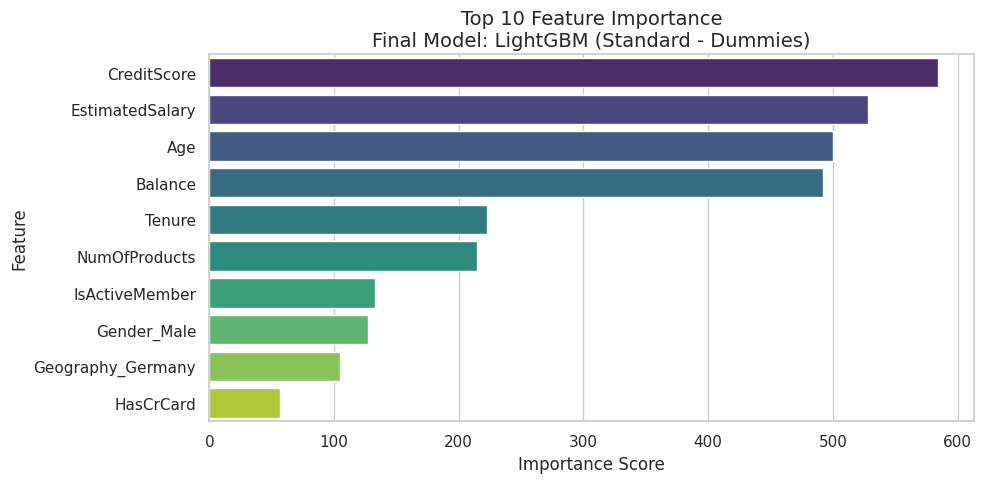


--- Processing final components for Version: Standard - Binning ---
  Fitting final StandardScaler on full X_train (Shape: (15000, 10))...
  Saved final scaler to: saved_final_scalers/final_scaler_standardscaler_binning.pkl
  Training final model (LightGBM) for Standard - Binning...
[LightGBM] [Info] Number of positive: 3058, number of negative: 11942
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011686 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 42
[LightGBM] [Info] Number of data points in the train set: 15000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203867 -> initscore=-1.362300
[LightGBM] [Info] Start training from score -1.362300


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



  Final model (LightGBM) training complete.
  Saved final model to: saved_final_models/final_model_LightGBM_Standard_Binning.pkl

  Top 10 Feature Importances for FINAL LightGBM (Standard - Binning):
             Feature  Importance
0       Tenure_Group         450
1          Geography         391
2      Balance_Group         359
3          Age_Group         357
4  CreditScore_Group         352
5     IsActiveMember         257
6      NumOfProducts         237
7             Gender         231
8       Salary_Group         193
9          HasCrCard         173


<ipython-input-180-057e795e4d4e>:163: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




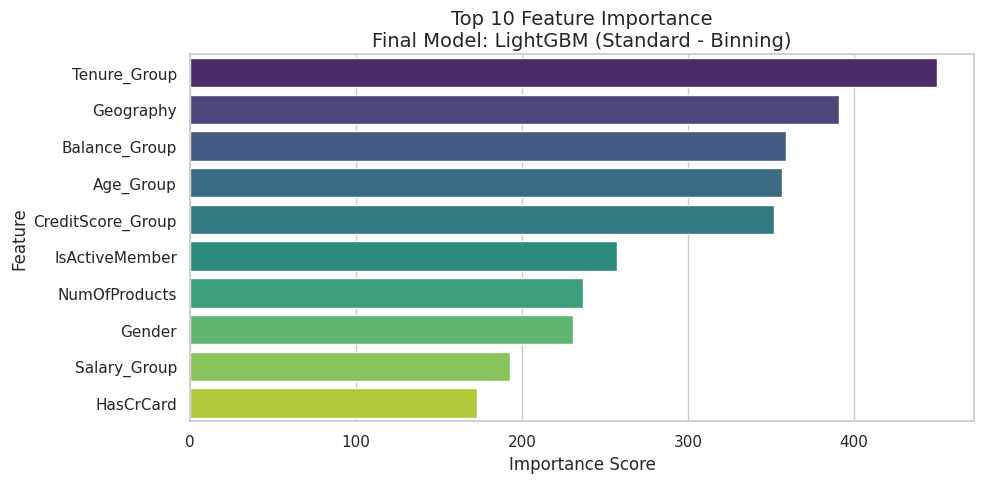


--- Processing final components for Version: Standard - Catcode ---
  Fitting final StandardScaler on full X_train (Shape: (15000, 10))...
  Saved final scaler to: saved_final_scalers/final_scaler_standardscaler_catcode.pkl
  Training final model (LightGBM) for Standard - Catcode...
[LightGBM] [Info] Number of positive: 3058, number of negative: 11942
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 846
[LightGBM] [Info] Number of data points in the train set: 15000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203867 -> initscore=-1.362300
[LightGBM] [Info] Start training from score -1.362300


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



  Final model (LightGBM) training complete.
  Saved final model to: saved_final_models/final_model_LightGBM_Standard_Catcode.pkl

  Top 10 Feature Importances for FINAL LightGBM (Standard - Catcode):
           Feature  Importance
0      CreditScore         570
1  EstimatedSalary         508
2              Age         498
3          Balance         493
4           Tenure         223
5    NumOfProducts         215
6        Geography         194
7   IsActiveMember         123
8           Gender         117
9        HasCrCard          59


<ipython-input-180-057e795e4d4e>:163: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




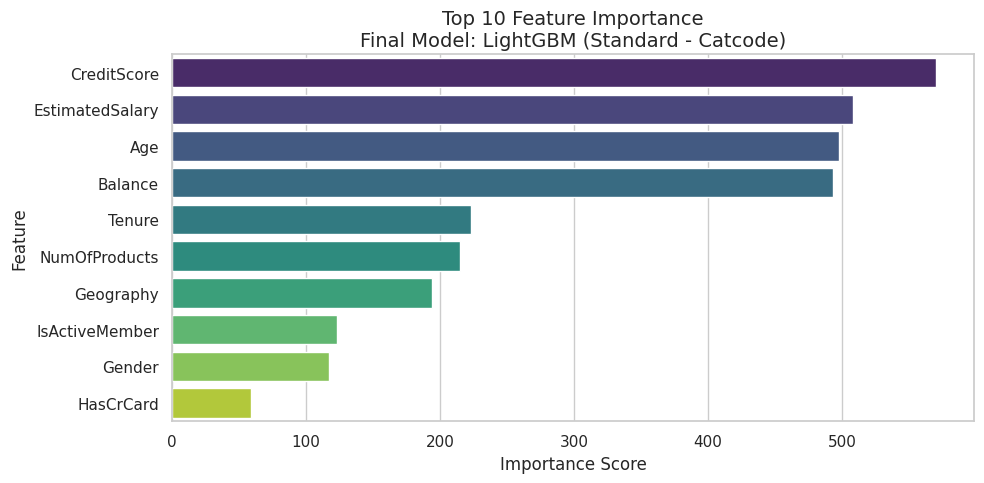


--- Processing final components for Version: Standard - AddRemove ---
  Fitting final StandardScaler on full X_train (Shape: (9029, 10))...
  Saved final scaler to: saved_final_scalers/final_scaler_standardscaler_addremove.pkl
  Training final model (CatBoost) for Standard - AddRemove...
  Final model (CatBoost) training complete.
  Saved final model to: saved_final_models/final_model_CatBoost_Standard_AddRemove.pkl

  Top 10 Feature Importances for FINAL CatBoost (Standard - AddRemove):
           Feature  Importance
0    NumOfProducts   26.092065
1              Age   22.215589
2      CreditScore    9.588411
3          Balance    9.587421
4  EstimatedSalary    8.669659
5        Geography    7.301562
6   IsActiveMember    6.451032
7           Tenure    4.496421
8           Gender    3.796342
9        HasCrCard    1.801498


<ipython-input-180-057e795e4d4e>:163: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




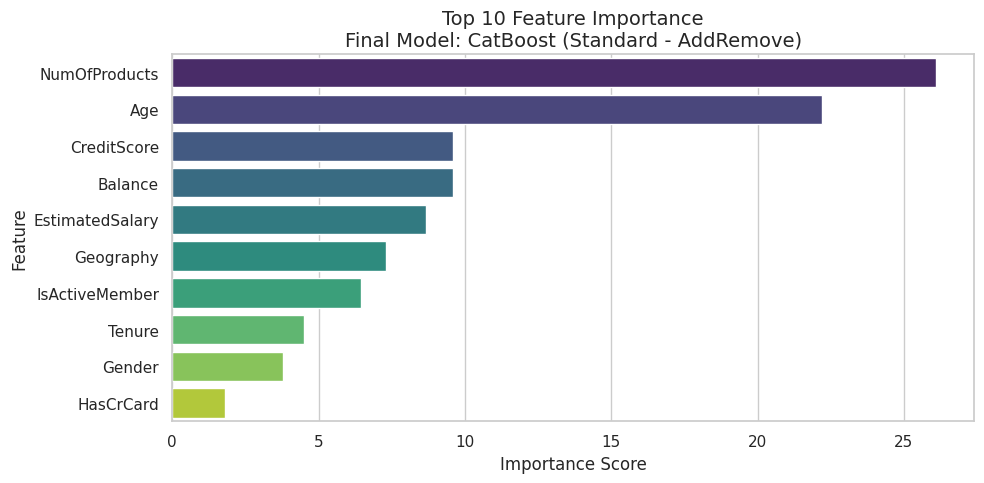


--- Finished re-training, saving components, and analyzing feature importance. ---


In [ ]:
print("# Re-train Final Models, Save Components & Feature Importance")
import pandas as pd
import numpy as np
import joblib
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

# Configuration
FINAL_MODEL_SAVE_DIR = "saved_final_models"
FINAL_SCALER_SAVE_DIR = "saved_final_scalers"
os.makedirs(FINAL_MODEL_SAVE_DIR, exist_ok=True)
os.makedirs(FINAL_SCALER_SAVE_DIR, exist_ok=True)

# Models dictionary
models = {
    "Logistic Regression": LogisticRegression(random_state=96, max_iter=1000, class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(random_state=96, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(random_state=96, n_estimators=100, class_weight='balanced'),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, random_state=96, class_weight='balanced'),
    "XGBoost": xgb.XGBClassifier(random_state=96, n_estimators=100, use_label_encoder=False, eval_metric='logloss', scale_pos_weight=1.0), # Example params, adjust if needed
    "LightGBM": lgb.LGBMClassifier(random_state=96, n_estimators=100, scale_pos_weight=1.0),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=96, scale_pos_weight=1.0),
}

# Version to Dataset Mapping
version_to_dataset_map = {
    "MinMax - Dummies": {"train": "dataset_train_dummies", "test": "dataset_test_dummies", "scaler": "MinMaxScaler"},
    "MinMax - Binning": {"train": "dataset_train_binning", "test": "dataset_test_binning", "scaler": "MinMaxScaler"},
    "MinMax - Catcode": {"train": "dataset_train_catcode", "test": "dataset_test_catcode", "scaler": "MinMaxScaler"},
    "MinMax - AddRemove": {"train": "dataset_train_add_remove", "test": "dataset_test_add_remove", "scaler": "MinMaxScaler"},
    "Standard - Dummies": {"train": "dataset_train_dummies", "test": "dataset_test_dummies", "scaler": "StandardScaler"},
    "Standard - Binning": {"train": "dataset_train_binning", "test": "dataset_test_binning", "scaler": "StandardScaler"},
    "Standard - Catcode": {"train": "dataset_train_catcode", "test": "dataset_test_catcode", "scaler": "StandardScaler"},
    "Standard - AddRemove": {"train": "dataset_train_add_remove", "test": "dataset_test_add_remove", "scaler": "StandardScaler"}
}

# Check if the results dictionary from K-Fold exists and is populated
if 'best_f1_model_per_version' not in locals() or not best_f1_model_per_version:
     raise NameError("'best_f1_model_per_version' dictionary not found or empty. "
                     "Make sure the K-Fold Modeling block has been executed successfully.")

print("\n--- Re-training best models on full training data and saving components ---")

selected_versions = list(best_f1_model_per_version.keys())

for version in selected_versions:
    print(f"\n--- Processing final components for Version: {version} ---")

    # Get mapping information for datasets and scaler type
    if version not in version_to_dataset_map:
        print(f"Warning: Mapping for version '{version}' not found. Skipping.")
        continue
    train_var_name = version_to_dataset_map[version]["train"]
    scaler_type = version_to_dataset_map[version]["scaler"]
    preprocessing_type = version.split(' - ')[1].lower() # e.g., 'dummies', 'binning'

    # Load the appropriate TRAINING dataset dynamically
    train_df = locals().get(train_var_name, globals().get(train_var_name))
    if train_df is None:
         print(f"Error: Could not find Training DataFrame '{train_var_name}'. Skipping version '{version}'.")
         continue
    train_df_copy = train_df.copy()

    # Separate features (X) and target (y)
    if 'Exited' not in train_df_copy.columns:
        print(f"Error: Target column 'Exited' not found in '{train_var_name}'. Skipping version '{version}'.")
        continue
    X_train = train_df_copy.drop("Exited", axis=1)
    y_train = train_df_copy["Exited"]
    feature_names = X_train.columns.tolist()

    # Initialize and FIT the final scaler on the full training data
    print(f"  Fitting final {scaler_type} on full X_train (Shape: {X_train.shape})...")
    try:
        final_scaler = MinMaxScaler() if scaler_type == "MinMaxScaler" else StandardScaler()
        # Fit the scaler to the features ONLY
        final_scaler.fit(X_train)
        # Transform the training data (needed for model training)
        X_train_scaled = final_scaler.transform(X_train)
    except Exception as e:
        print(f"  Error fitting final {scaler_type}: {e}. Skipping version '{version}'.")
        continue

    # Save the fitted final scaler
    try:
        scaler_save_filename = os.path.join(FINAL_SCALER_SAVE_DIR, f"final_scaler_{scaler_type.lower()}_{preprocessing_type}.pkl")
        joblib.dump(final_scaler, scaler_save_filename)
        print(f"  Saved final scaler to: {scaler_save_filename}")
    except Exception as e:
        print(f"  Error saving final scaler for version '{version}': {e}")
        continue

    # Get the best model details identified from the K-Fold evaluation
    if version not in best_f1_model_per_version:
         # This check might be redundant if selected_versions is used, but good for robustness
         print(f"Warning: Best model info for version '{version}' not found in results dictionary. Skipping.")
         continue
    best_model_info = best_f1_model_per_version[version]
    best_model_name = best_model_info["model_name"]
    model_class = best_model_info.get("model_class", models.get(best_model_name).__class__)


    if not model_class or best_model_name not in models:
        print(f"Warning: Invalid model name ('{best_model_name}') or could not determine model class for version '{version}'. Skipping.")
        continue

    # Re-initialize the best model with its base parameters
    base_model_params = models[best_model_name].get_params()
    final_model = model_class(**base_model_params)

    # TRAIN the final model on the FULL SCALED training data
    print(f"  Training final model ({best_model_name}) for {version}...")
    try:
        final_model.fit(X_train_scaled, y_train)
        print(f"  Final model ({best_model_name}) training complete.")
    except Exception as e:
        print(f"  Error training final model {best_model_name} for version '{version}': {e}. Skipping saving this model.")
        continue

    # Save the trained final model
    try:
        # Construct a descriptive filename
        model_save_filename = os.path.join(FINAL_MODEL_SAVE_DIR, f"final_model_{best_model_name.replace(' ', '')}_{version.replace(' - ', '_')}.pkl")
        joblib.dump(final_model, model_save_filename)
        print(f"  Saved final model to: {model_save_filename}")
    except Exception as e:
        print(f"  Error saving final model {best_model_name} for version '{version}': {e}")
        continue

    # --- Feature Importance Analysis (for the newly trained final model) ---
    N_FEATURES_TO_SHOW = 10
    importances = None

    # Extract feature importances based on model type
    if hasattr(final_model, 'feature_importances_'):
        importances = final_model.feature_importances_
    elif hasattr(final_model, 'coef_'):
        # For linear models, use absolute coefficient values
        # Handle multi-class coefficients if necessary (taking coef_[0] for binary/first class)
        importances = np.abs(final_model.coef_[0]) if final_model.coef_.ndim > 1 else np.abs(final_model.coef_)

    if importances is not None:
        if len(feature_names) == len(importances):
            feature_importance_df = pd.DataFrame({
                'Feature': feature_names,
                'Importance': importances
            }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

            print(f"\n  Top {N_FEATURES_TO_SHOW} Feature Importances for FINAL {best_model_name} ({version}):")
            print(feature_importance_df.head(N_FEATURES_TO_SHOW).to_string())

            # Plot the top N features
            try:
                plt.figure(figsize=(10, max(4, N_FEATURES_TO_SHOW * 0.5)))
                sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(N_FEATURES_TO_SHOW), palette='viridis')
                plt.title(f'Top {N_FEATURES_TO_SHOW} Feature Importance\nFinal Model: {best_model_name} ({version})', fontsize=14)
                plt.xlabel('Importance Score', fontsize=12)
                plt.ylabel('Feature', fontsize=12)
                plt.tight_layout()
                plt.show()
                plt.close()
            except Exception as plot_err:
                print(f"  Error generating feature importance plot: {plot_err}")

        else:
             # Handle cases where lengths don't match (should investigate if this happens)
             print(f"  Warning: Mismatch in feature count and importance score count for {best_model_name} ({version}).")
             print(f"    Features: {len(feature_names)}, Importances: {len(importances)}")
    else:
         # Handle models where importance cannot be directly extracted
         print(f"  Info: Feature importance not directly available for model type {type(final_model).__name__}.")
    # --- End Feature Importance Analysis ---

print("\n--- Finished re-training, saving components, and analyzing feature importance. ---")

In [ ]:
print("\n# Prediction & Submission Generation (using FINAL models)")
import pandas as pd
import numpy as np
import joblib
import os

# --- Configuration ---
FINAL_MODEL_SAVE_DIR = "saved_final_models"
FINAL_SCALER_SAVE_DIR = "saved_final_scalers"

# Version to Dataset Mapping
version_to_dataset_map = {
    "MinMax - Dummies": {"test": "dataset_test_dummies", "scaler": "MinMaxScaler"},
    "MinMax - Binning": {"test": "dataset_test_binning", "scaler": "MinMaxScaler"},
    "MinMax - Catcode": {"test": "dataset_test_catcode", "scaler": "MinMaxScaler"},
    "MinMax - AddRemove": {"test": "dataset_test_add_remove", "scaler": "MinMaxScaler"},
    "Standard - Dummies": {"test": "dataset_test_dummies", "scaler": "StandardScaler"},
    "Standard - Binning": {"test": "dataset_test_binning", "scaler": "StandardScaler"},
    "Standard - Catcode": {"test": "dataset_test_catcode", "scaler": "StandardScaler"},
    "Standard - AddRemove": {"test": "dataset_test_add_remove", "scaler": "StandardScaler"}
}

# --- Define Expected Feature Lists ---
EXPECTED_FEATURES_DUMMIES = [
    'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
    'IsActiveMember', 'EstimatedSalary', 'Geography_Germany', 'Geography_Spain',
    'Gender_Male'
]
EXPECTED_FEATURES_BINNING = [
    'Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
    'Age_Group', 'Balance_Group', 'Salary_Group', 'CreditScore_Group', 'Tenure_Group'
]
EXPECTED_FEATURES_CATCODE = [
    'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
    'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'
]
EXPECTED_FEATURES_ADDREMOVE = EXPECTED_FEATURES_CATCODE

# --- Mapping Version Name to Expected Feature List ---
version_to_expected_features = {
    "MinMax - Dummies": EXPECTED_FEATURES_DUMMIES,
    "MinMax - Binning": EXPECTED_FEATURES_BINNING,
    "MinMax - Catcode": EXPECTED_FEATURES_CATCODE,
    "MinMax - AddRemove": EXPECTED_FEATURES_ADDREMOVE,
    "Standard - Dummies": EXPECTED_FEATURES_DUMMIES,
    "Standard - Binning": EXPECTED_FEATURES_BINNING,
    "Standard - Catcode": EXPECTED_FEATURES_CATCODE,
    "Standard - AddRemove": EXPECTED_FEATURES_ADDREMOVE
}

# --- Load sample submission file ---
SAMPLE_SUBMISSION_PATH = '/content/sample_submission.csv'
try:
    sample_submission = pd.read_csv(SAMPLE_SUBMISSION_PATH)
except FileNotFoundError:
    print(f"ERROR: Sample submission file not found at '{SAMPLE_SUBMISSION_PATH}'. Cannot create submission files.")
    sample_submission = None
except Exception as e:
    print(f"Error loading sample submission: {e}")
    sample_submission = None


# --- Loop through selected versions, load FINAL components, predict, and save submission ---
if 'best_f1_model_per_version' not in locals() or not best_f1_model_per_version:
     print("\nERROR: 'best_f1_model_per_version' dictionary not found or empty. Cannot proceed.")
else:
    selected_versions = list(best_f1_model_per_version.keys())

    for version in selected_versions:
        # Get mapping info
        if version not in version_to_dataset_map:
            print(f"Warning: Config mapping missing for version '{version}'. Skipping.")
            continue
        test_var_name = version_to_dataset_map[version]["test"]
        scaler_type = version_to_dataset_map[version]["scaler"]
        preprocessing_type = version.split(' - ')[1].lower()
        try:
            best_model_info = best_f1_model_per_version[version]
            best_model_name = best_model_info["model_name"]
        except KeyError:
            print(f"Warning: Model info missing for version '{version}' in results. Skipping.")
            continue


        # Construct filenames
        final_scaler_filename = os.path.join(FINAL_SCALER_SAVE_DIR, f"final_scaler_{scaler_type.lower()}_{preprocessing_type}.pkl")
        final_model_filename = os.path.join(FINAL_MODEL_SAVE_DIR, f"final_model_{best_model_name.replace(' ', '')}_{version.replace(' - ', '_')}.pkl")

        # Load scaler
        try:
            final_scaler = joblib.load(final_scaler_filename)
        except Exception as e:
            print(f"ERROR loading final scaler for {version}: {e}. Skipping.")
            continue

        # Load model
        try:
            final_model = joblib.load(final_model_filename)
        except Exception as e:
            print(f"ERROR loading final model for {version}: {e}. Skipping.")
            continue

        # Load and Prepare Test Data
        test_df = locals().get(test_var_name, globals().get(test_var_name))
        if test_df is None:
            print(f"ERROR: Preprocessed Test DataFrame '{test_var_name}' not found for {version}. Skipping.")
            continue
        test_df_copy = test_df.copy()

        expected_cols = version_to_expected_features.get(version)
        if expected_cols is None:
            print(f"ERROR: Expected features list not defined for '{version}'. Skipping.")
            continue

        try:
            X_test = test_df_copy.reindex(columns=expected_cols, fill_value=0)
        except Exception as e:
             print(f"ERROR reindexing test data for {version}: {e}. Skipping.")
             continue

        # Scale Test Data
        try:
            X_test_scaled = final_scaler.transform(X_test)
        except Exception as e:
            print(f"ERROR scaling test data for {version}: {e}. Check feature consistency. Skipping.")
            continue

        # Predict Probabilities
        try:
            y_test_proba = final_model.predict_proba(X_test_scaled)[:, 1]
        except Exception as e:
            print(f"ERROR predicting with final model for {version}: {e}. Skipping.")
            continue

        # Create and Save Submission File
        if sample_submission is not None:
            try:
                # Get submission IDs
                if 'id' in test_df_copy.columns:
                     submission_ids = test_df_copy['id'].iloc[:len(y_test_proba)]
                else:
                     # Fallback to original test file for IDs
                     ORIGINAL_TEST_PATH = '/content/test.csv'
                     original_test_df_ids = pd.read_csv(ORIGINAL_TEST_PATH)
                     submission_ids = original_test_df_ids['id'].iloc[:len(y_test_proba)]

                # Create submission DataFrame if lengths match
                if len(submission_ids) == len(y_test_proba):
                    submission_df = pd.DataFrame({'id': submission_ids, 'Exited': y_test_proba})
                    model_clean_name = best_model_name.replace(" ", "")
                    version_clean_name = version.replace(" ", "_").replace("-", "")
                    submission_filename = f"submission_{model_clean_name}_{version_clean_name}_FINAL.csv"
                    submission_df.to_csv(submission_filename, index=False)
                    print(f"Saved: {submission_filename}")
                else:
                    print(f"ERROR: Length mismatch creating submission for {version}. IDs: {len(submission_ids)}, Preds: {len(y_test_proba)}. Not saved.")

            except FileNotFoundError:
                 print(f"ERROR: Original test file ('{ORIGINAL_TEST_PATH}') needed for 'id' not found. Submission for {version} not saved.")
            except KeyError:
                 print(f"ERROR: 'id' column not found. Submission for {version} not saved.")
            except Exception as e:
                print(f"ERROR creating submission file for {version}: {e}")

print("\n--- Prediction and submission generation attempt complete. ---")


# Prediction & Submission Generation (using FINAL models)
Saved: submission_LightGBM_MinMax__Dummies_FINAL.csv


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



Saved: submission_LightGBM_MinMax__Binning_FINAL.csv
Saved: submission_CatBoost_MinMax__Catcode_FINAL.csv
Saved: submission_CatBoost_MinMax__AddRemove_FINAL.csv


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



Saved: submission_LightGBM_Standard__Dummies_FINAL.csv
Saved: submission_LightGBM_Standard__Binning_FINAL.csv
Saved: submission_LightGBM_Standard__Catcode_FINAL.csv
Saved: submission_CatBoost_Standard__AddRemove_FINAL.csv

--- Prediction and submission generation attempt complete. ---


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



In [ ]:
temp = pd.read_csv('/content/submission_LightGBM_Standard__Dummies_FINAL.csv')


In [ ]:
temp

id    Exited
0     15000  0.046253
1     15001  0.169988
2     15002  0.006541
3     15003  0.826374
4     15004  0.005732
...     ...       ...
9995  24995  0.012159
9996  24996  0.106373
9997  24997  0.496923
9998  24998  0.133591
9999  24999  0.202178

[10000 rows x 2 columns]

# **6) Deployment**